# Clustering

In [122]:
library(readxl)
library(tidyverse) #data Manipulation
library(magrittr)
library(cluster) #Clustering algorithms
#install.packages('cluster.datasets')
library(cluster.datasets)
library(cowplot)
#install.packages('clValid')
library(clValid)
#install.packages('ggfortify')
library(ggfortify)
#install.packages('clustree')
library(clustree)
library(factoextra)#Clustering Algorithms & Visualization
library(FactoMineR)
library(gridExtra)
library(corrplot)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)
#install.packages('writexl')
library(writexl)
library(GGally)
#install.packages('ggiraphExtra')
library(ggiraphExtra)
library(knitr)
library(kableExtra)

In [123]:
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
dfsimple[is.na(dfsimple)] <- 0
head(dfsimple)
count(dfsimple)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3


n
<int>
73


In [124]:
df.wa.country <- dfsimple[,c('Country','phom','pipy','ptap','bore','pwel','pspr','rain', 
                             'uwel','uspr','truc', 'ctan','bott','othw',  'surw',
                             'tles','tmor','watp')]
df.wa.country[is.na(df.wa.country)] <- 0
head(df.wa.country)
sapply(df.wa.country, class)

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


Country        phom        pipy        ptap        bore        pwel 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       pspr        rain        uwel        uspr        truc        ctan 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       bott        othw        surw        tles        tmor        watp 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

To apply clustering, we want to only use water accessibility variables

In [125]:
write_xlsx(df.wa.country , '../../results/df-water-access.xlsx')

In [126]:
df.explore <- dfsimple[,c('Country','bicy','cart','mcyc',
                         'pcar',
                         'boat',
                         'wigc')]
head(df.explore,7)

Country,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1
Albania,26.4,3.2,9.6,37.0,0.7,0.1
Angola,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3
Benin,19.4,3.2,56.1,4.2,0.2,0.3


In [127]:
write_xlsx(df.explore , '../../results/df-water-explore.xlsx')

linkage: single or average or complete and Different Methods

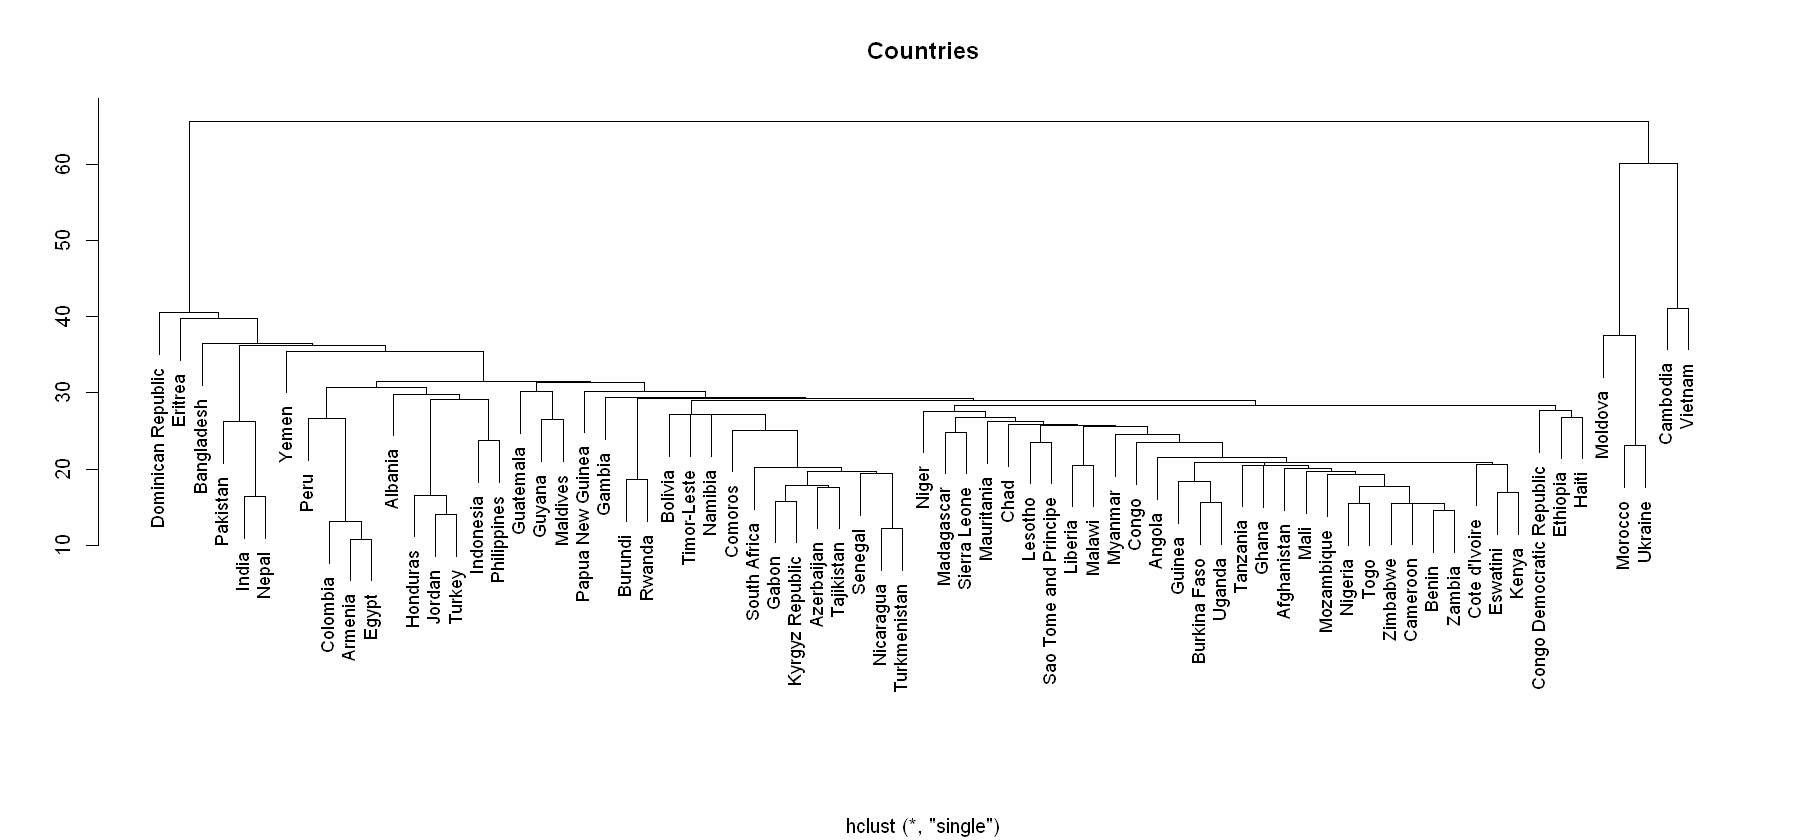

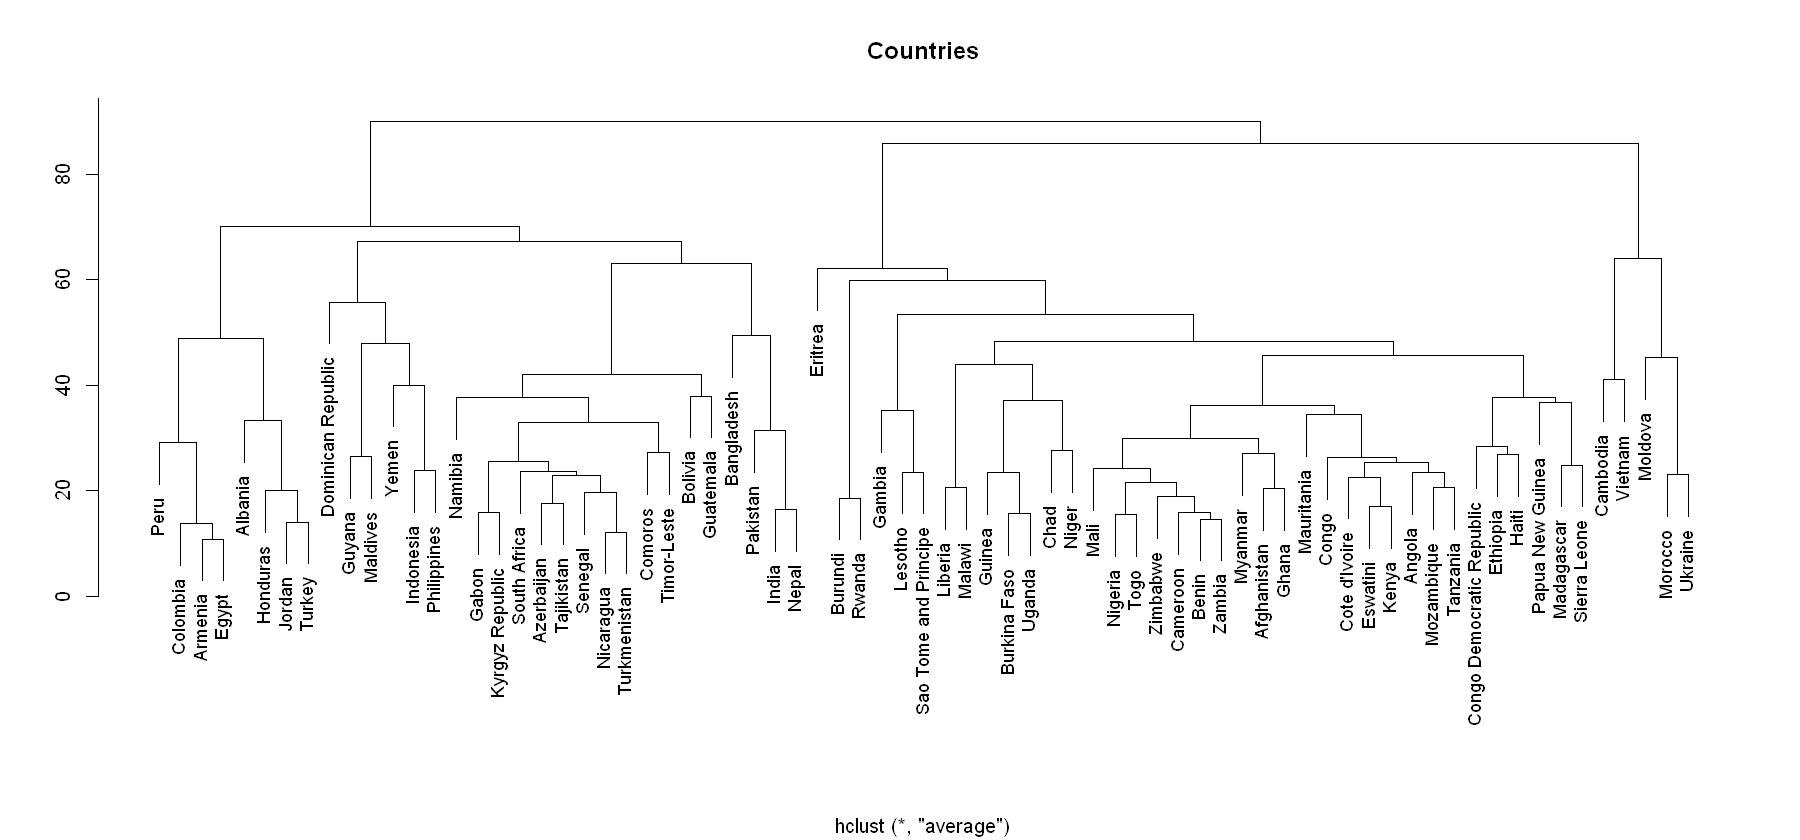

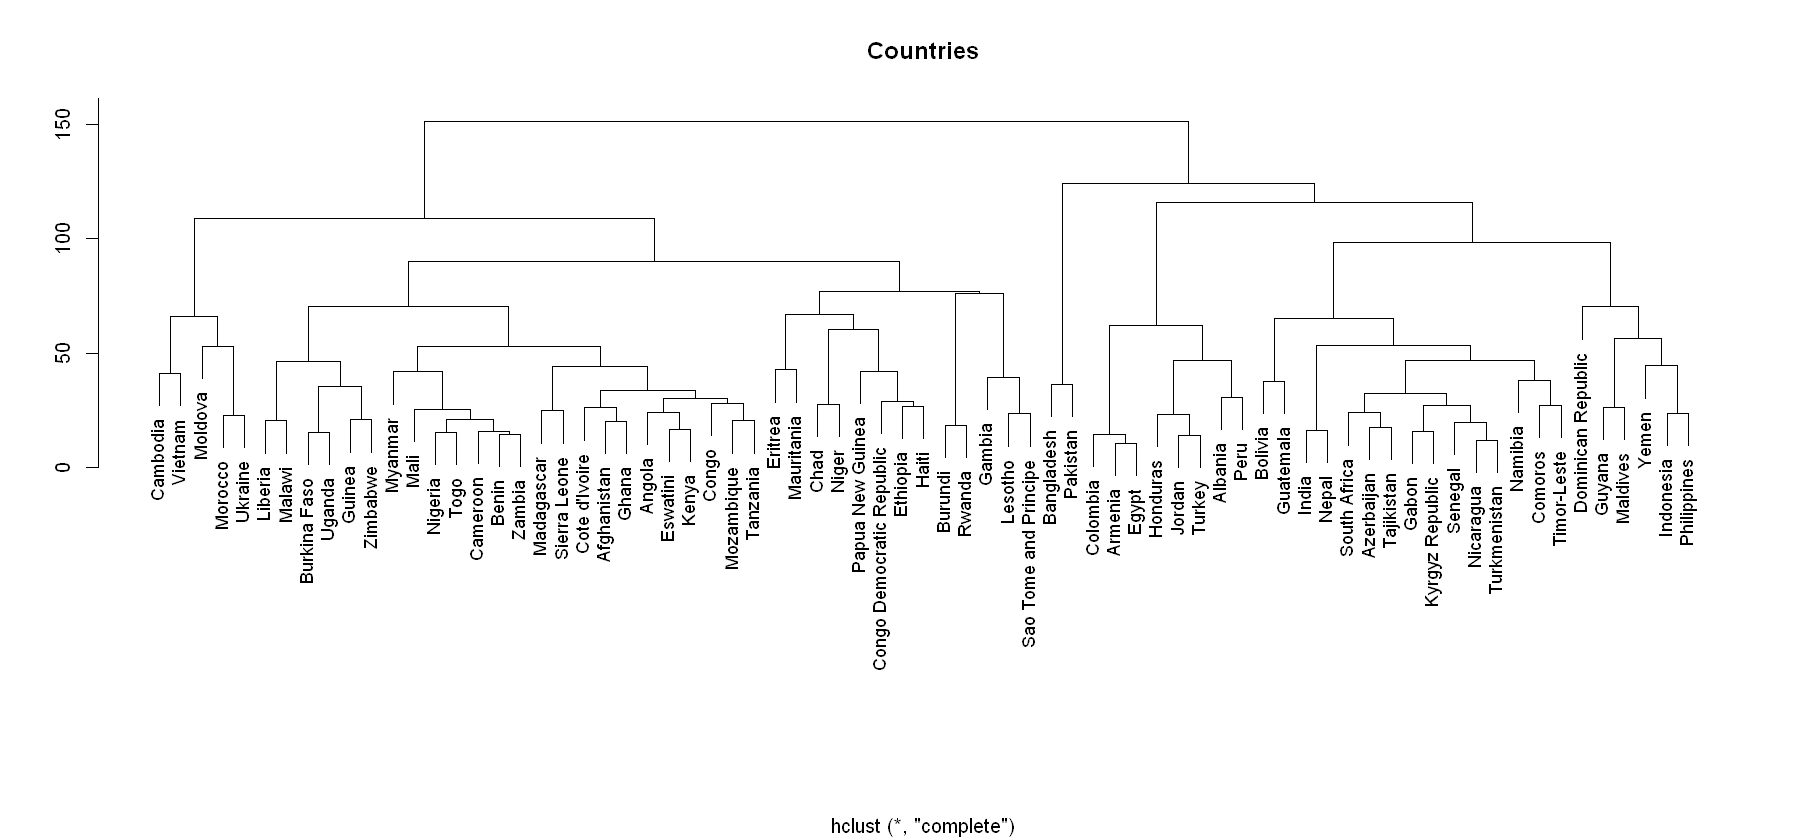

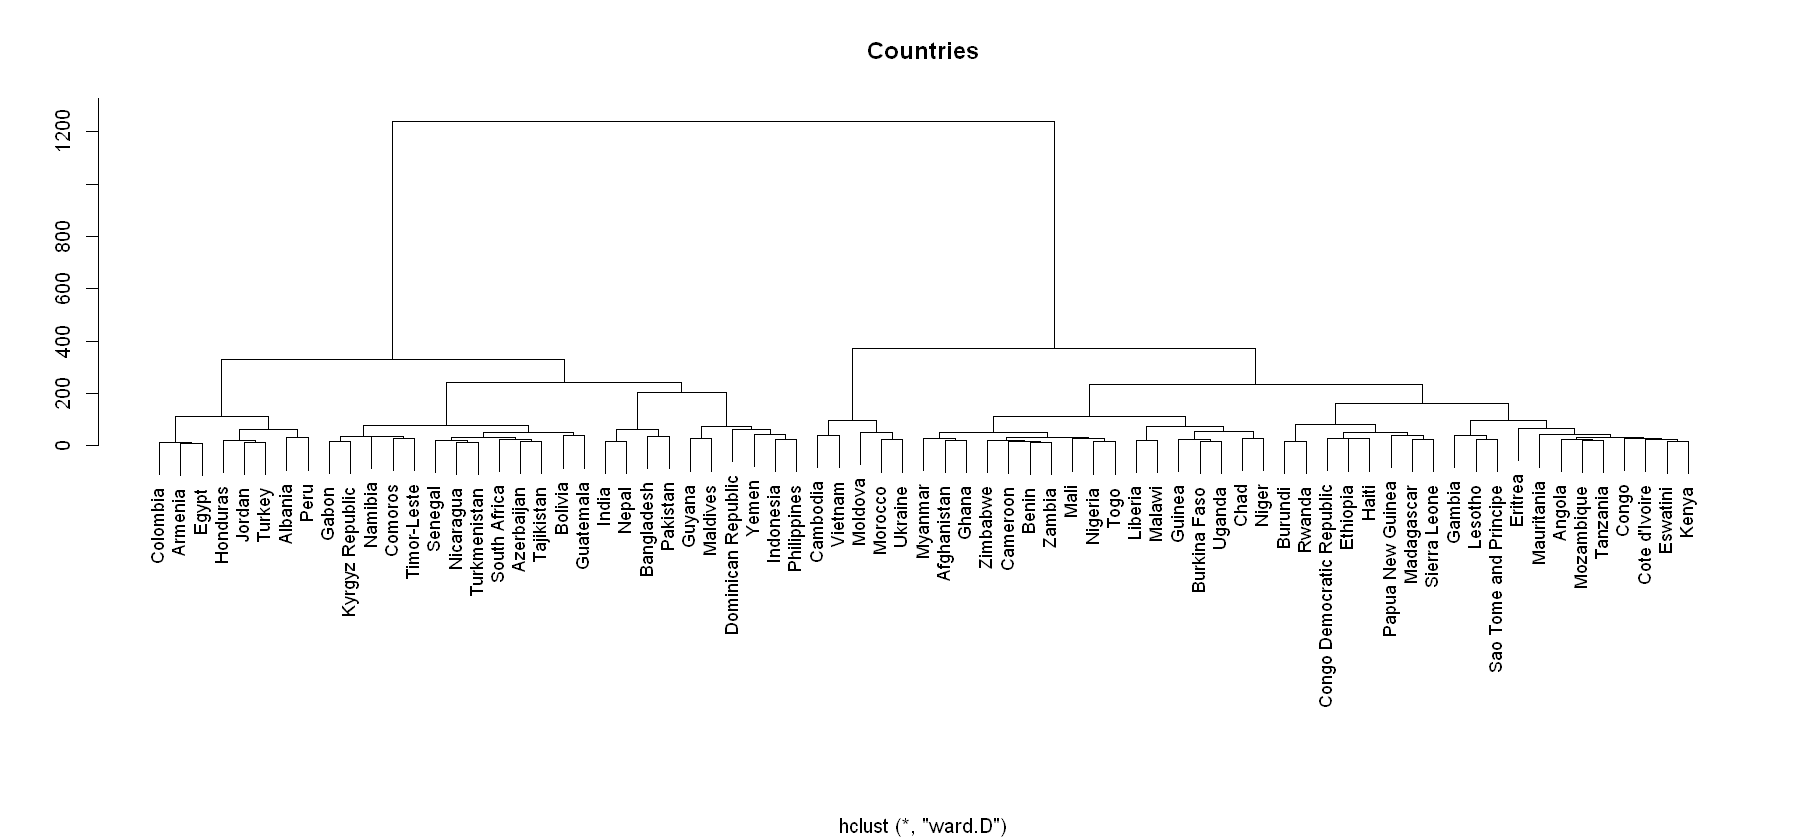

In [128]:
df.wa <- df.wa.country[,c(2:18)]

hc=hclust(dist(df.wa), method ="single")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc=hclust(dist(df.wa), method ="average")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.complete =hclust(dist(df.wa), method ="complete")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.complete, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward=hclust(dist(df.wa), method ="ward.D")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)



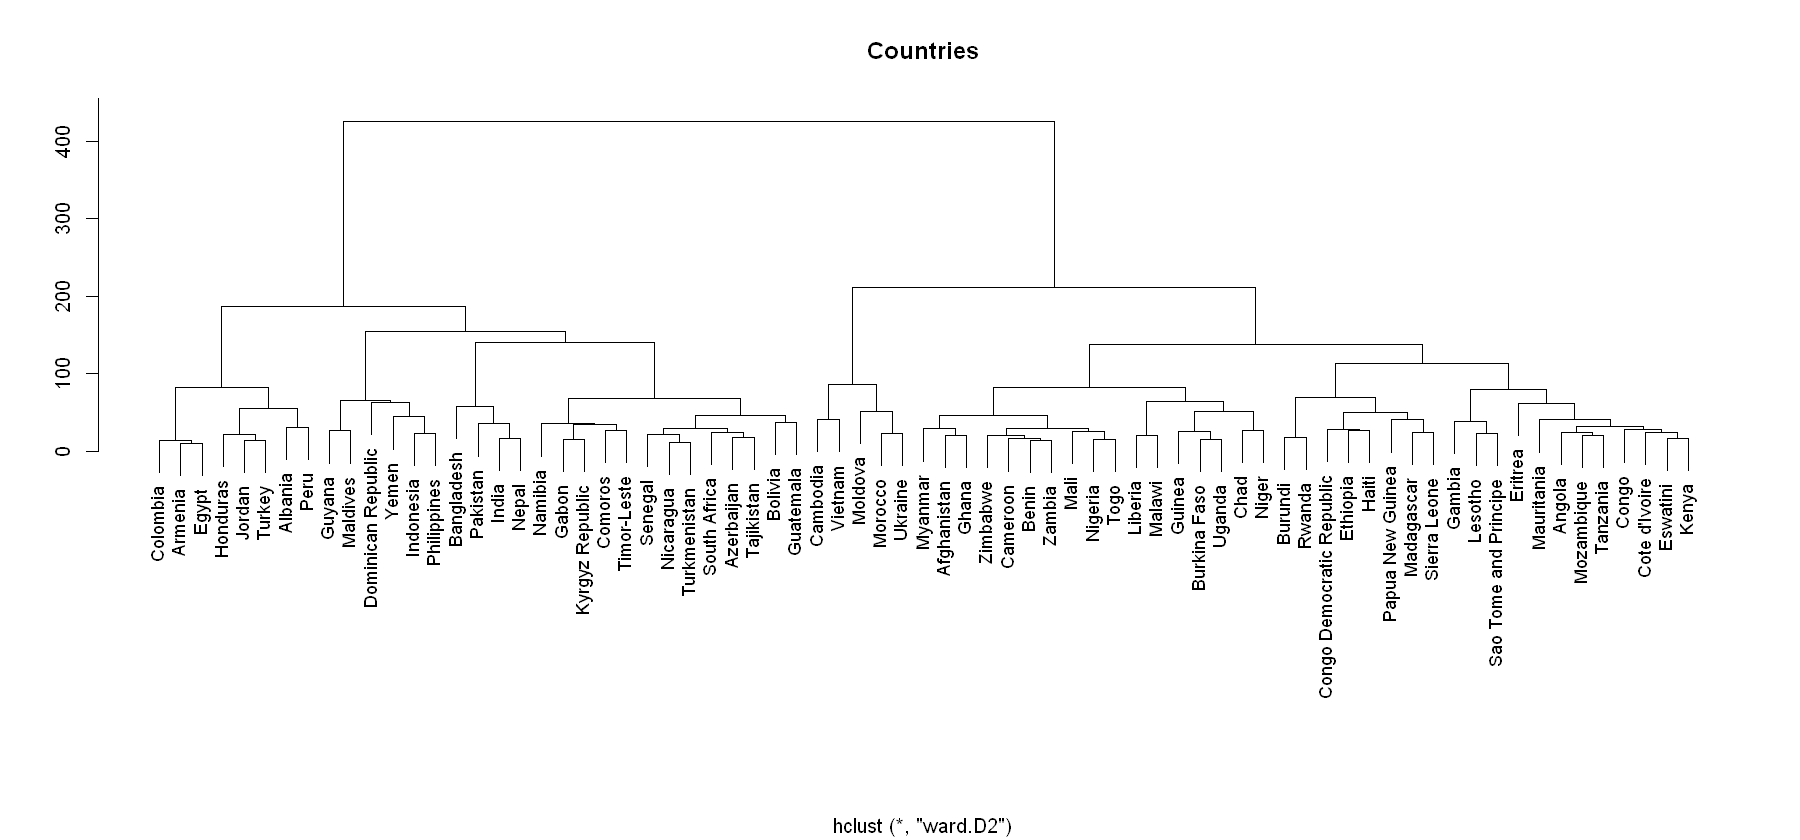

In [129]:
hc.ward2=hclust(dist(df.wa), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

# Determining the Best Cut for different methods

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


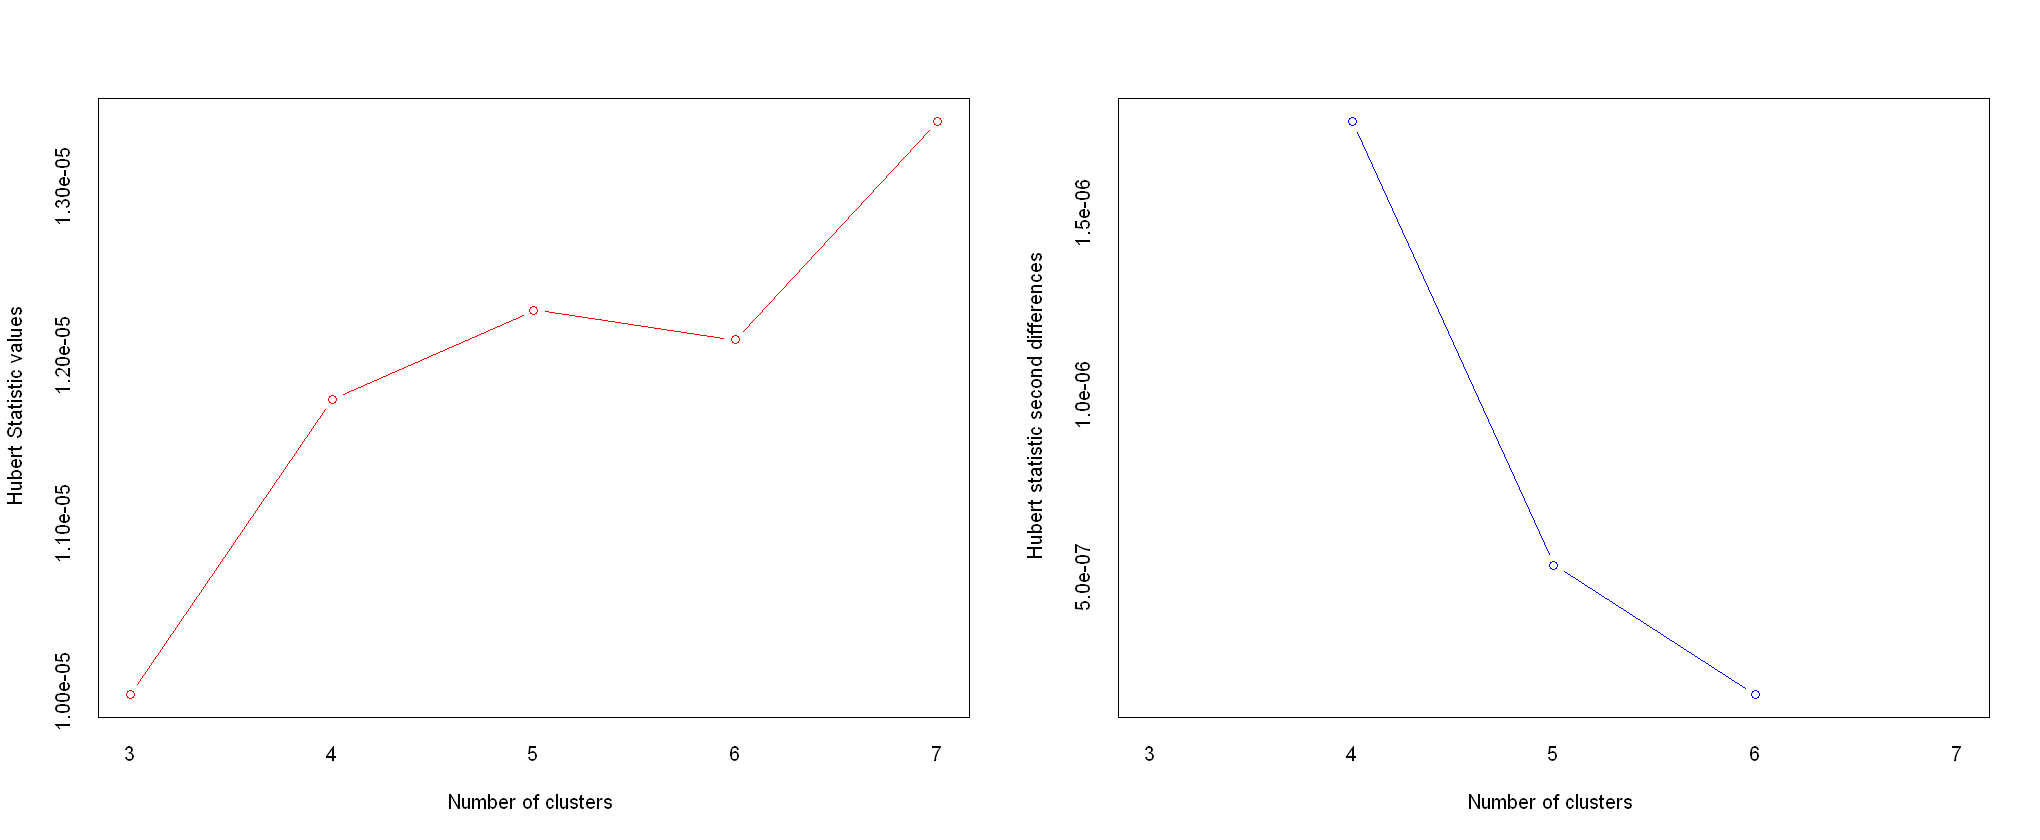

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 3 as the best number of clusters 
* 8 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 5 proposed 6 as the best number of clusters 
* 4 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


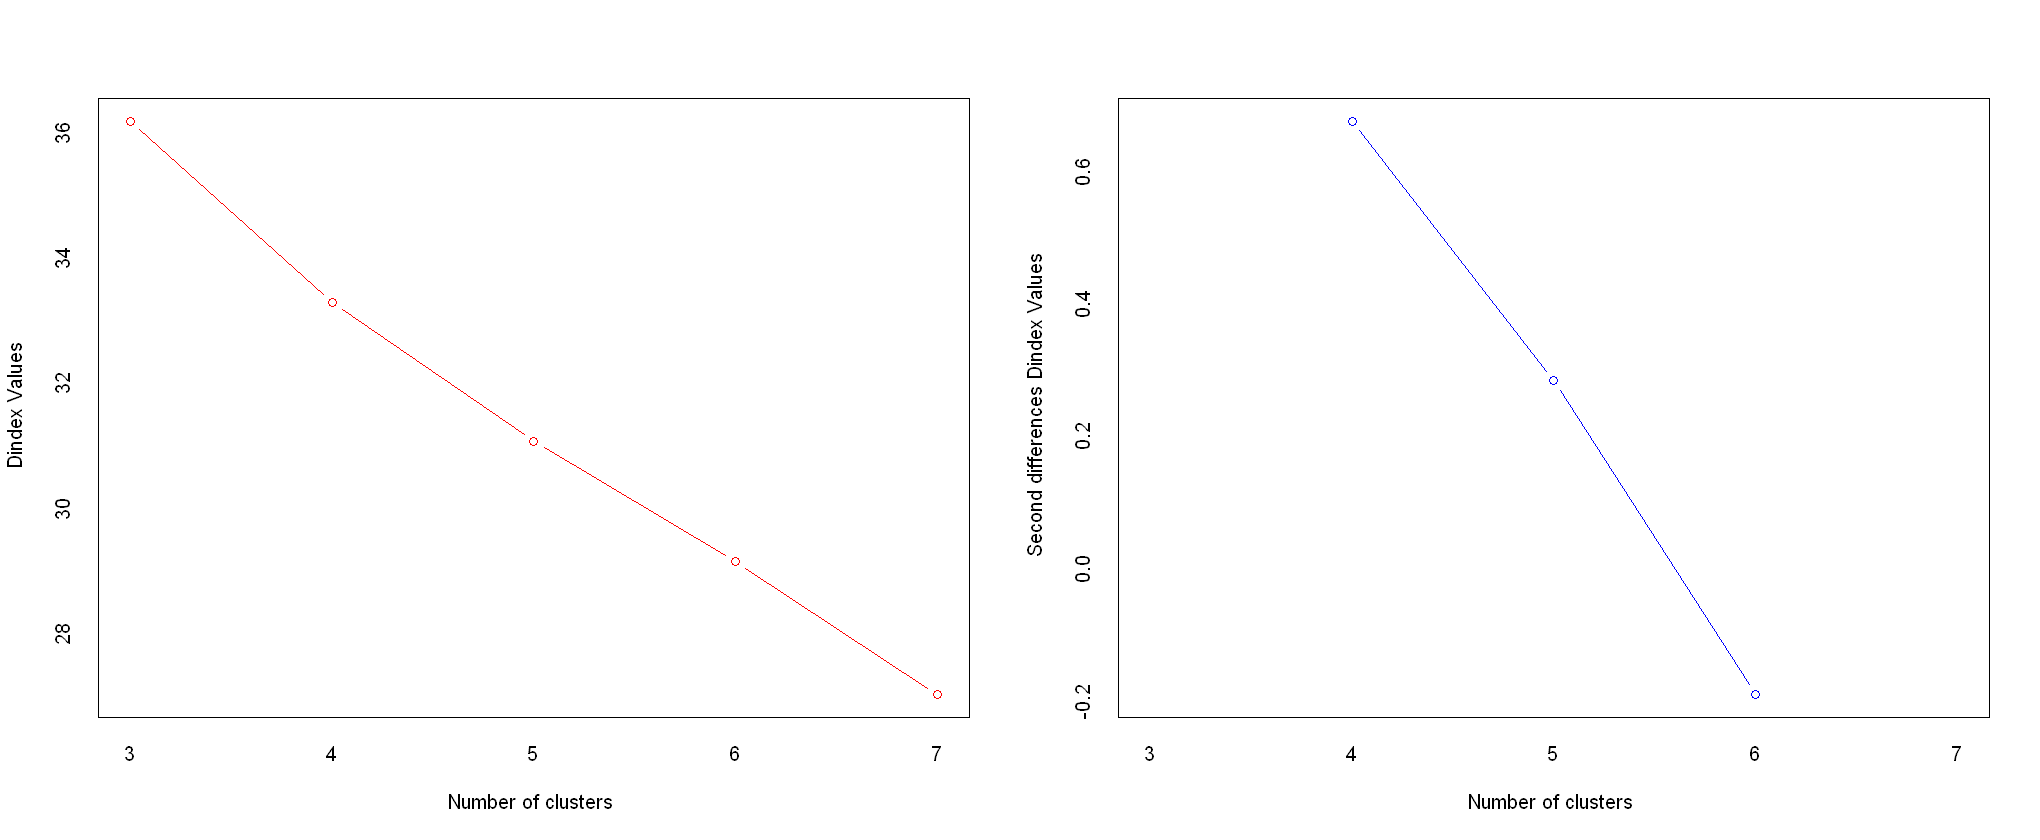

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


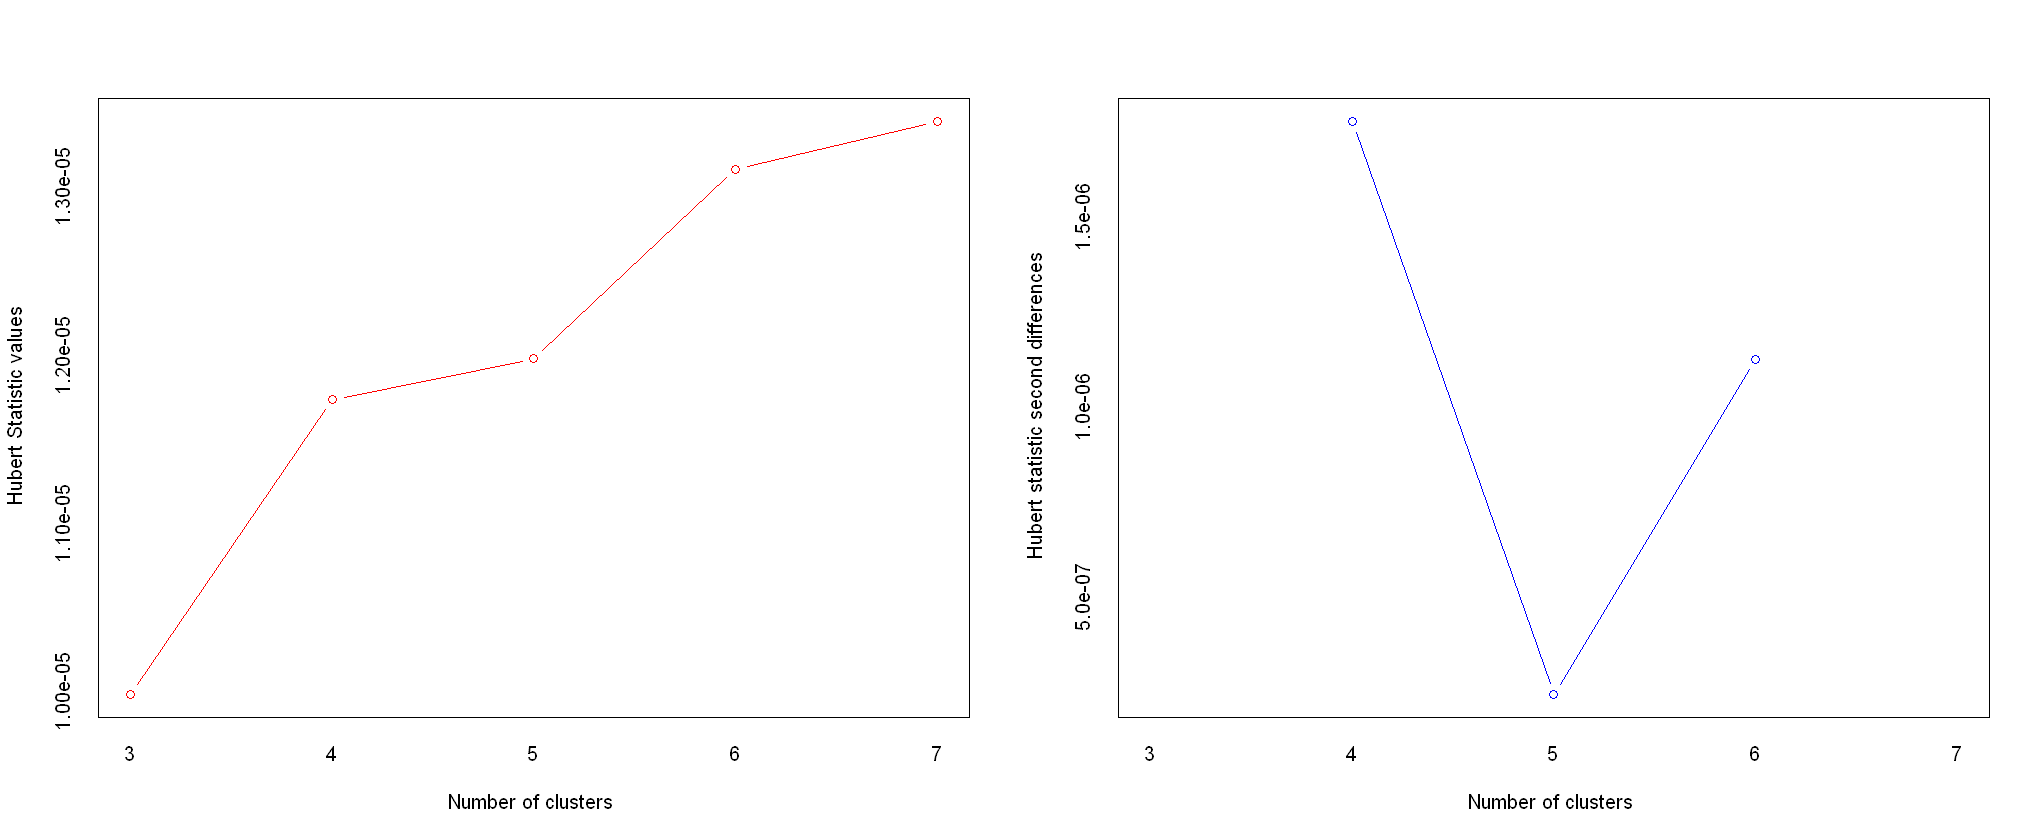

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 7 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


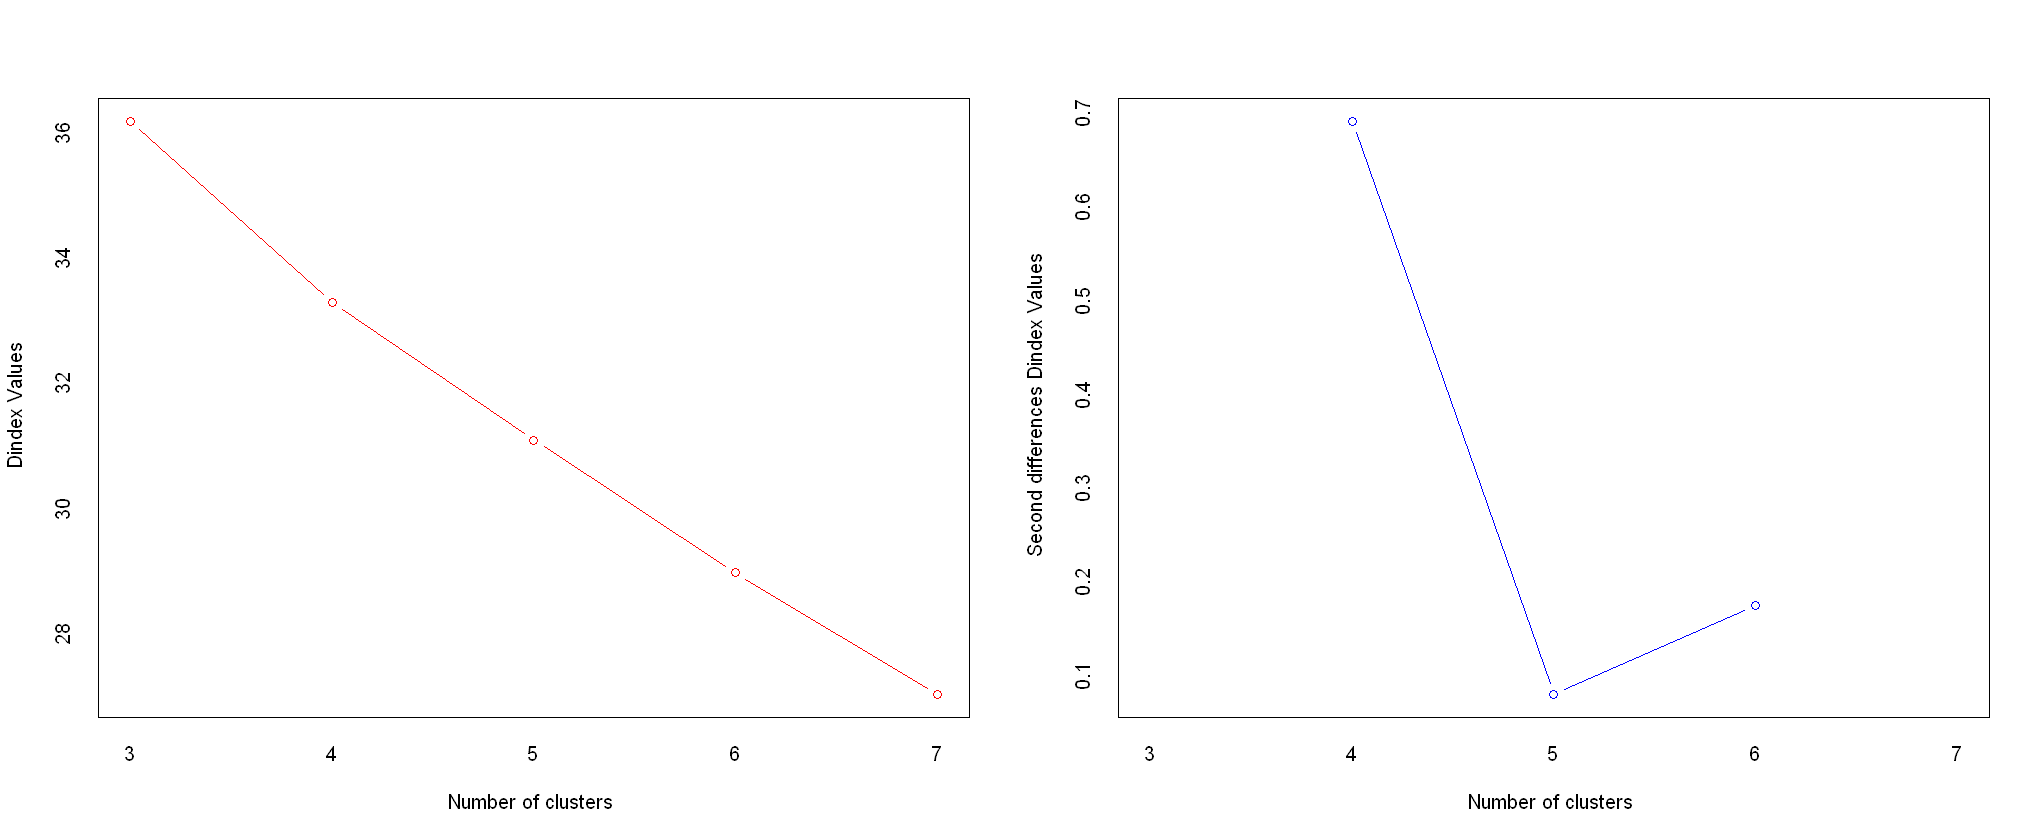

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


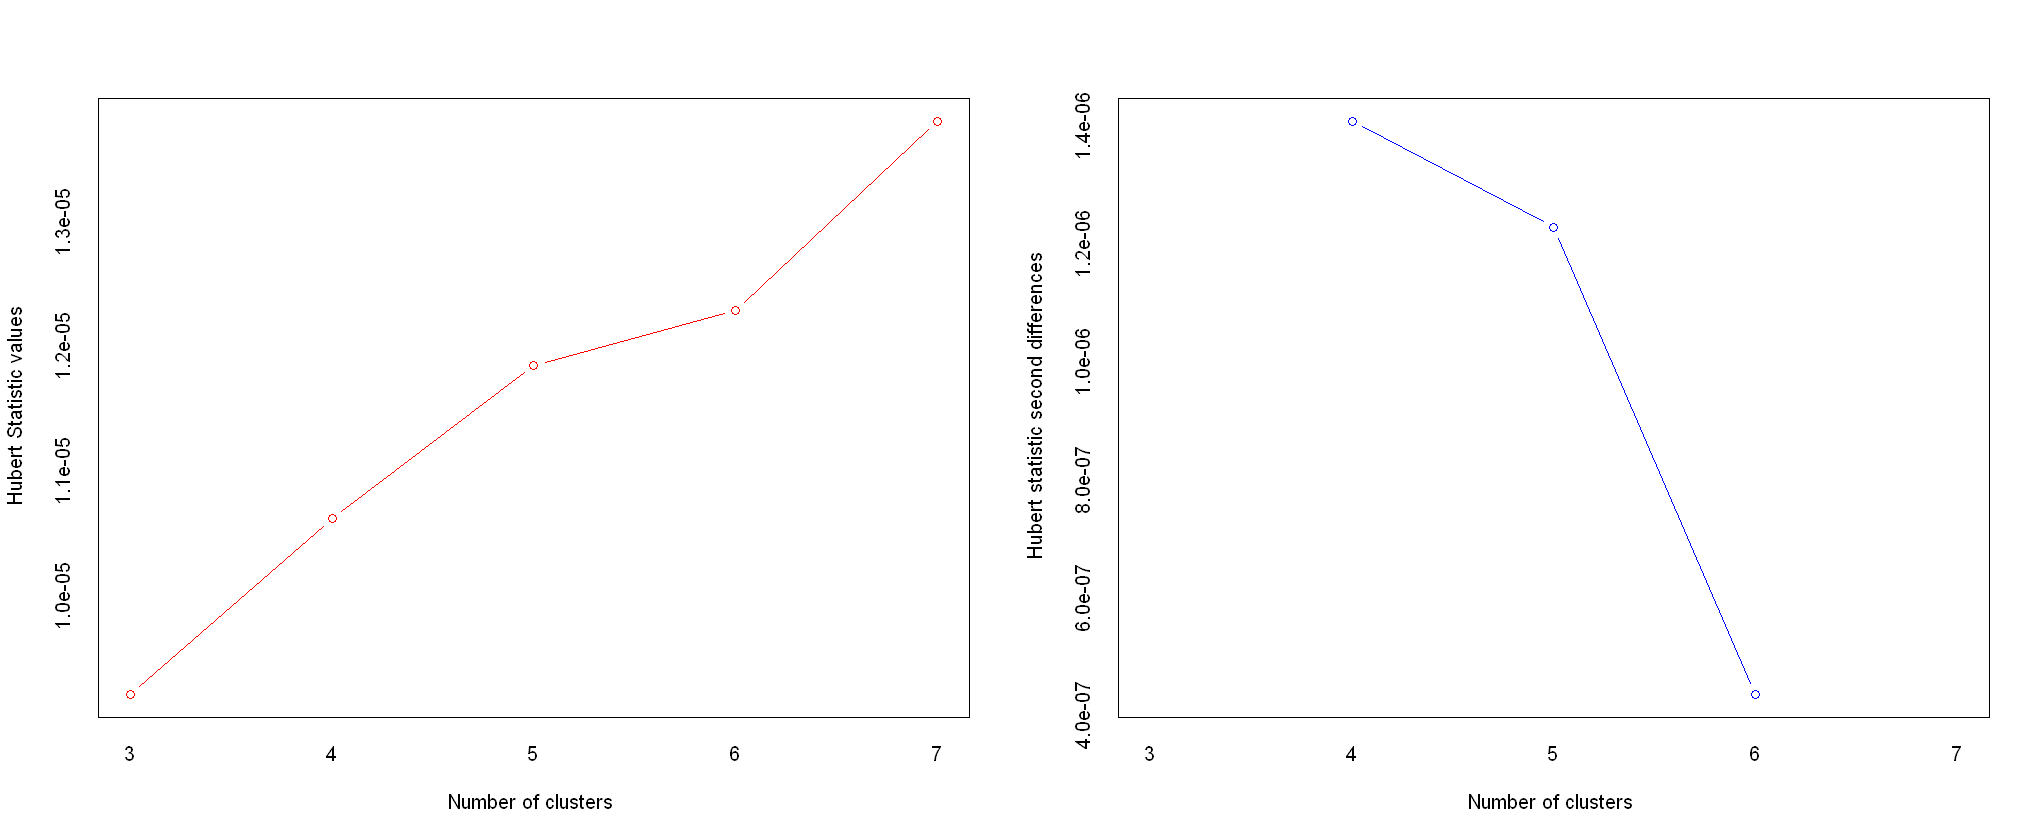

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 8 proposed 5 as the best number of clusters 
* 6 proposed 6 as the best number of clusters 
* 4 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


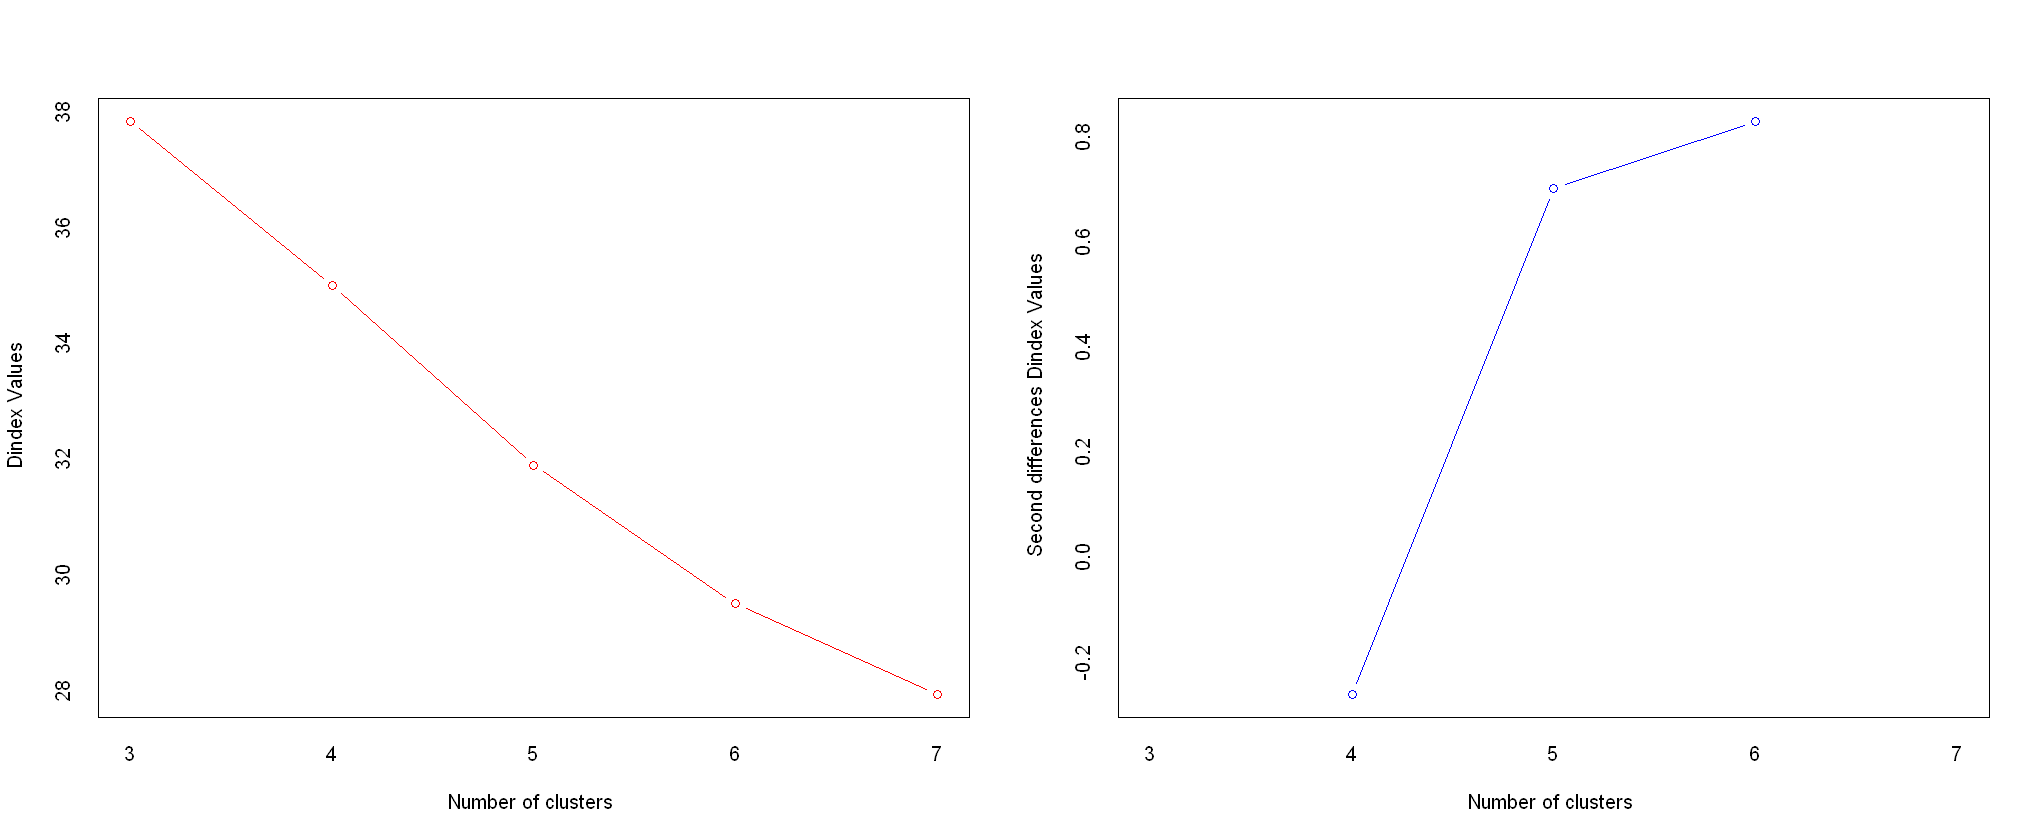

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


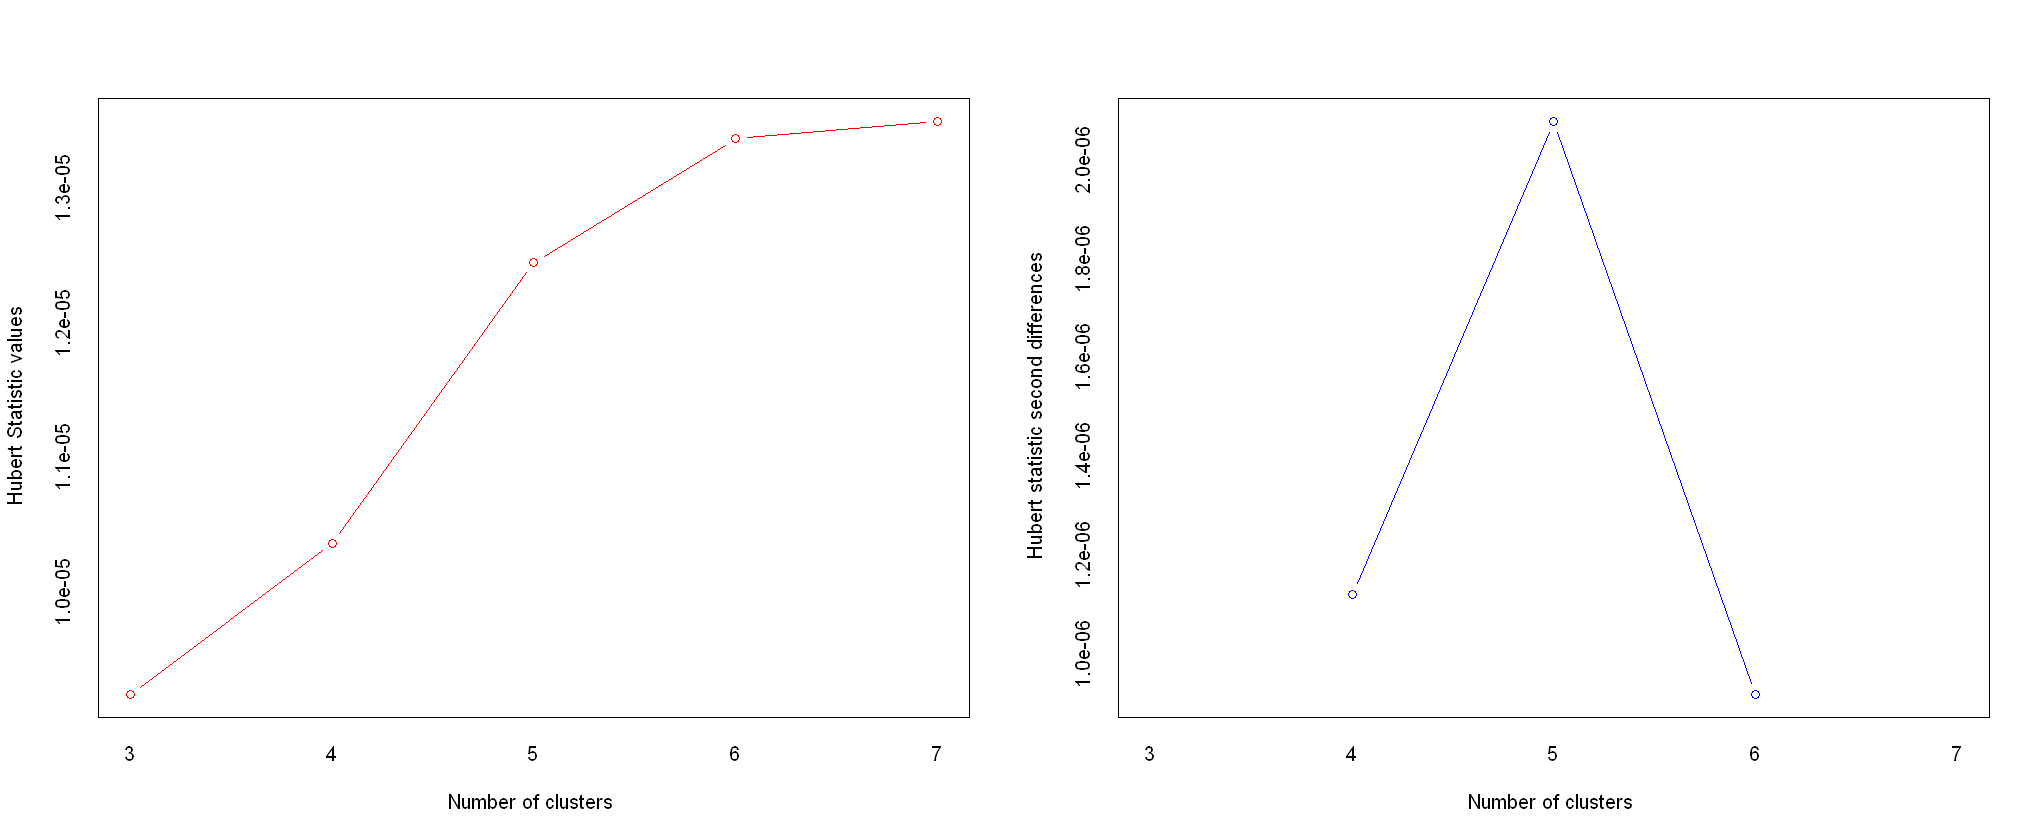

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 3 as the best number of clusters 
* 10 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 10 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


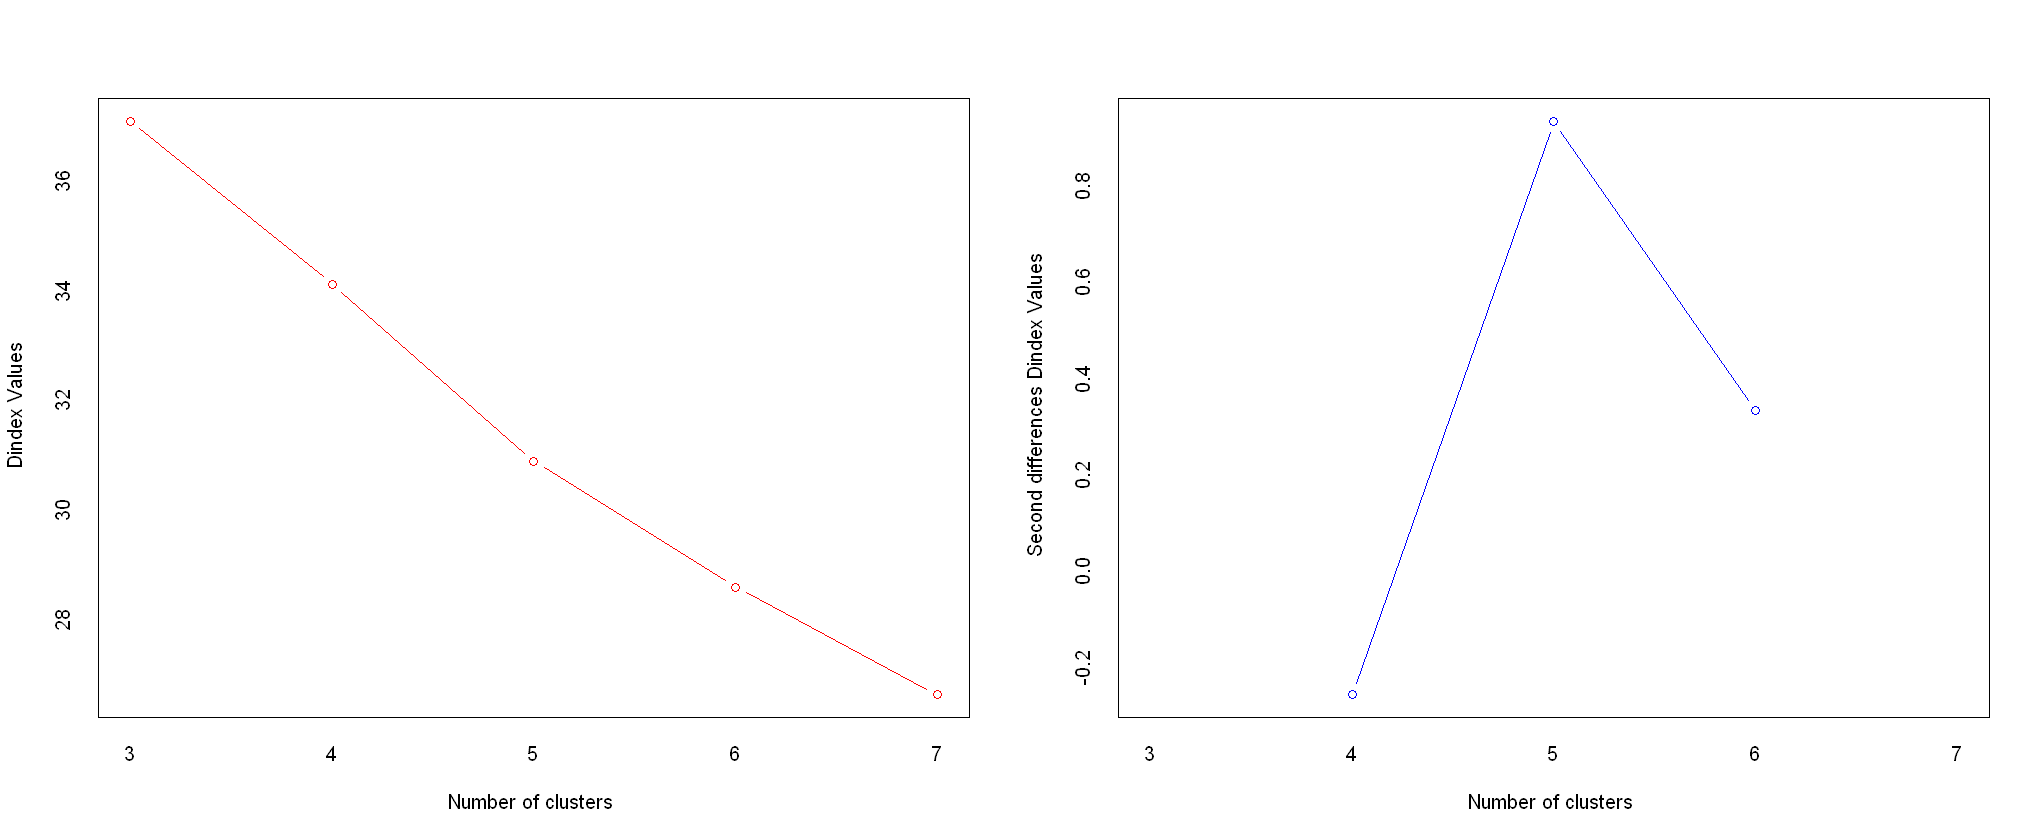

In [145]:
optimald2 = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = "alllong" ,alphaBeale = 0.1)
optimald = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'alllong',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'alllong',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "kmeans", index = 'alllong',alphaBeale = 0.1)



Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") {:
"the condition has length > 1 and only the first element will be used"


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 1 proposed  2 as the best number of clusters
* 6 proposed  3 as the best number of clusters
* 8 proposed  4 as the best number of clusters
* 1 proposed  5 as the best number of clusters
* 5 proposed  6 as the best number of clusters
* 4 proposed  7 as the best number of clusters
* 3 proposed  NA's as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  4 .



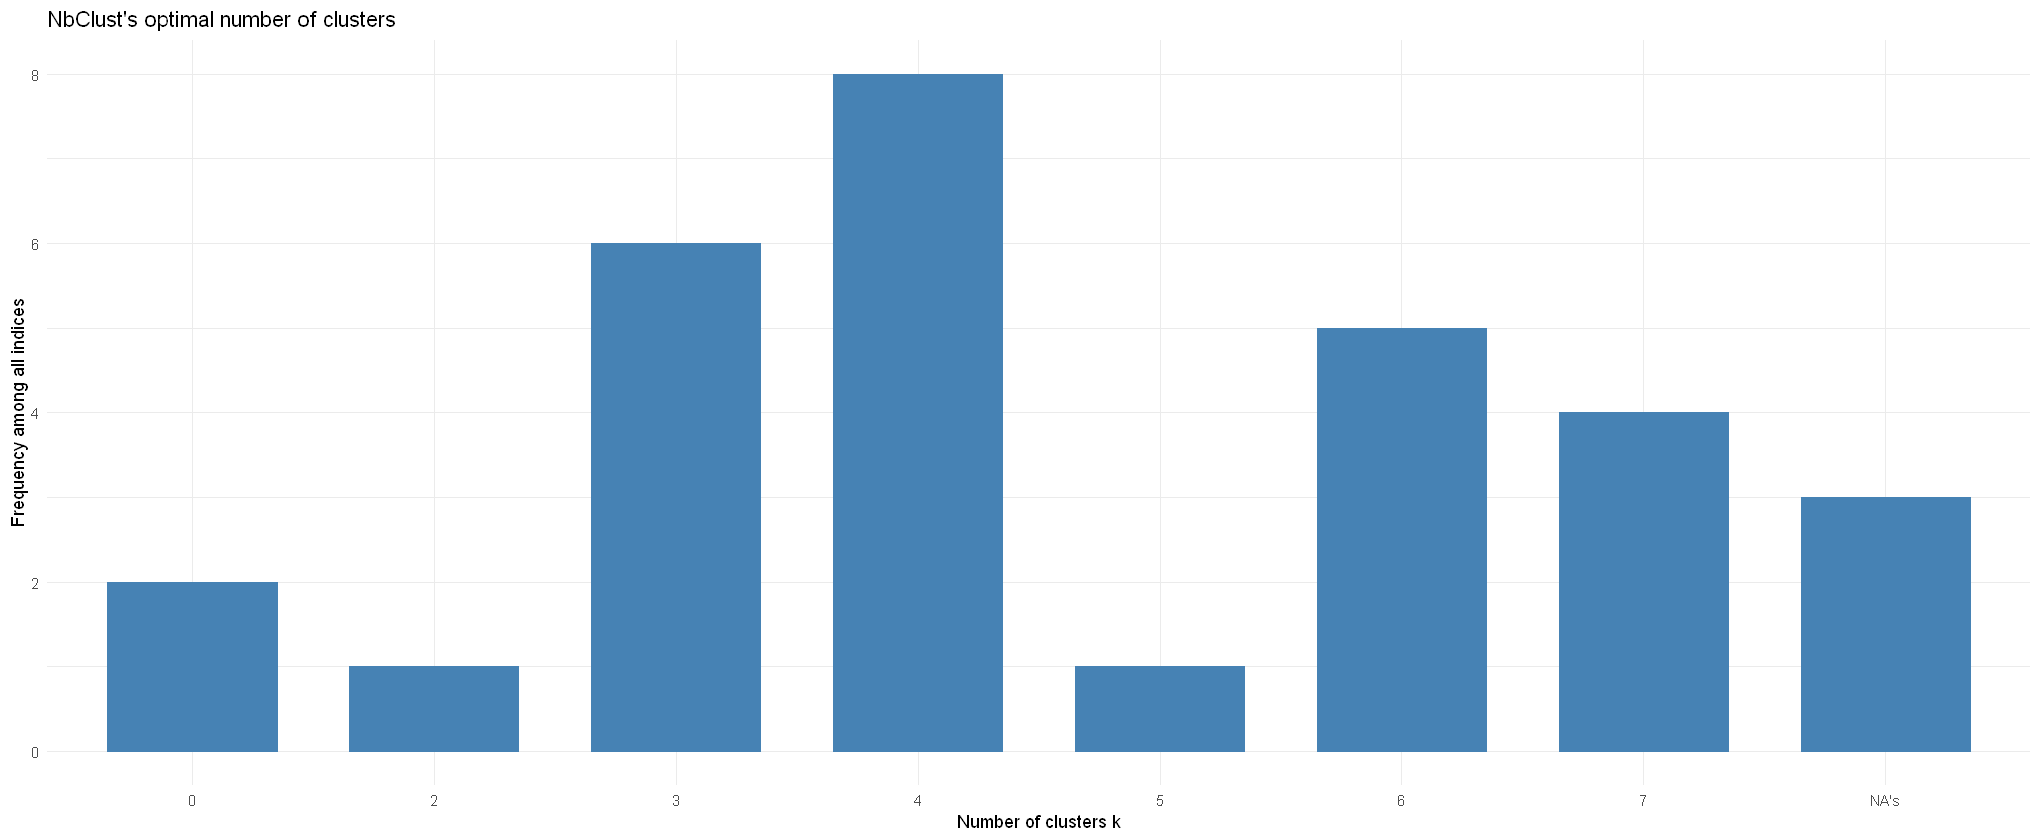

In [146]:
factoextra::fviz_nbclust(optimald2) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a 

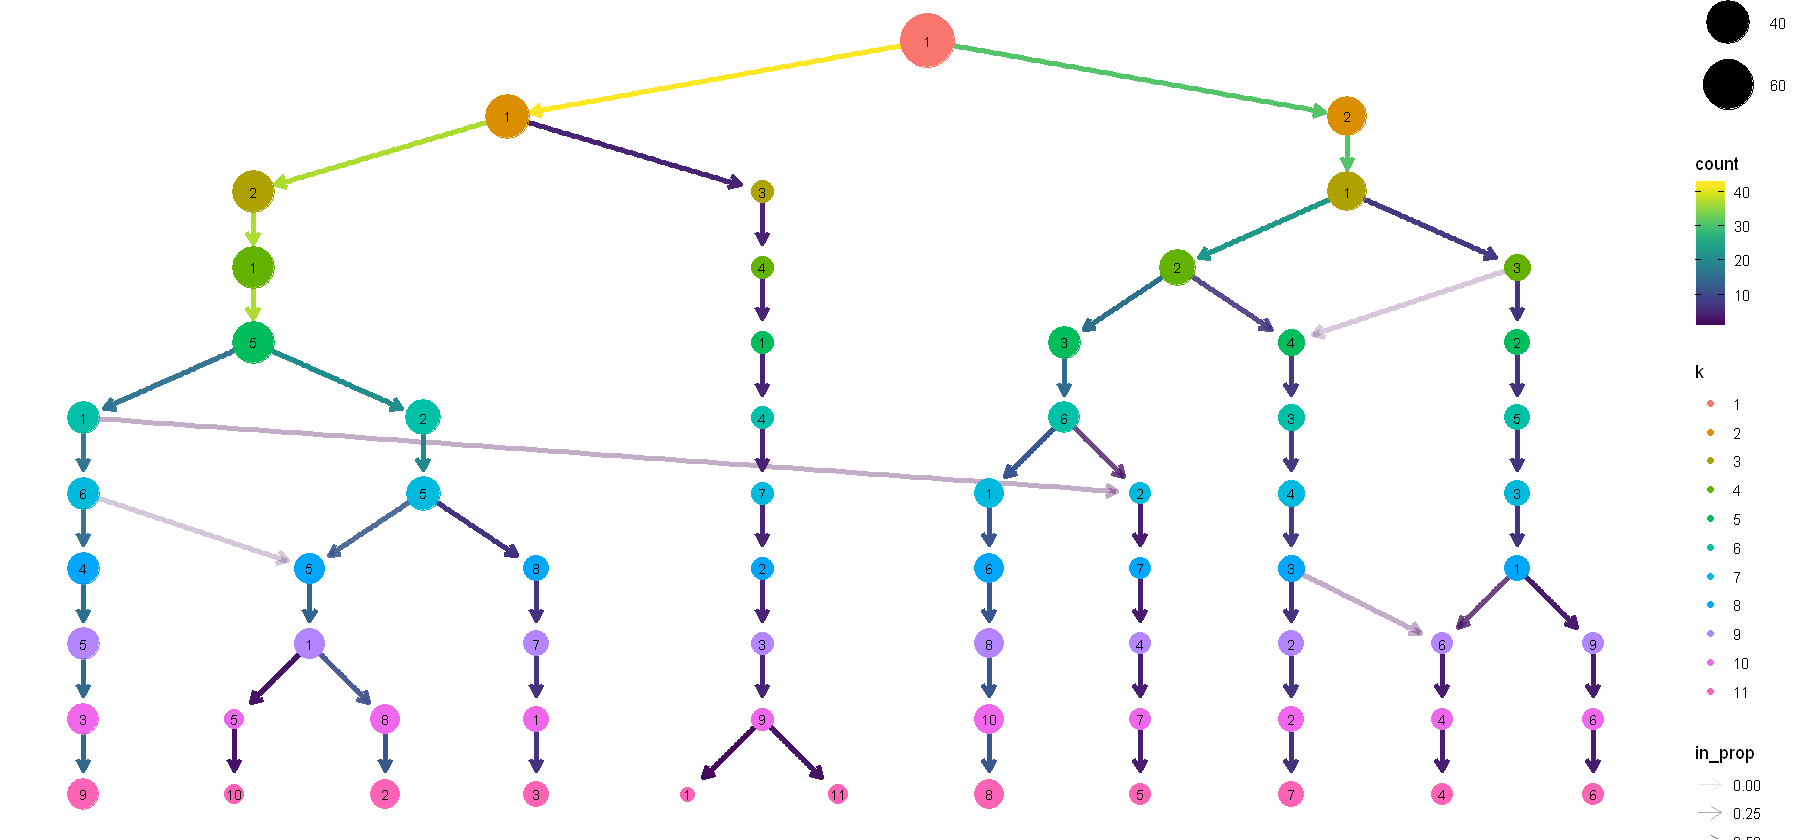

In [133]:
tmp <- NULL
# Comparing from 1 to 7 clusters
for (k in 1:11){
  tmp[k] <- kmeans(df.wa, k, nstart = 30)
}
df <- data.frame(tmp)
# add a prefix to the column names
colnames(df) <- seq(1:11)
colnames(df) <- paste0("k",colnames(df))
# get individual PCA
df.pca <- prcomp(df, center = TRUE, scale. = FALSE)
ind.coord <- df.pca$x
ind.coord <- ind.coord[,1:2]
df <- bind_cols(as.data.frame(df), as.data.frame(ind.coord))
clustree(df, prefix = "k")

In this figure the size of each node corresponds to the number of samples in each cluster, and the arrows are coloured according to the number of samples each cluster receives. A separate set of arrows, the transparent ones, called the incoming node proportion, are also coloured and shows how samples from one group end up in another group — an indicator of cluster instability.
In this graph we see that as we move from k=2 to k=3 a number of species from the lookers-left cluster are reasigned to the third cluster on the right. As we move from k=4 to k=4, 4 to 9, 5 to 10 we see one node with multiple incoming edges an indicator that we over-clustered the data.
It can also be useful to overlay this dimension on other dimensions in the data, particularly those that come from dimensionality reduction techniques. We can do this using the clustree_overlay() function:

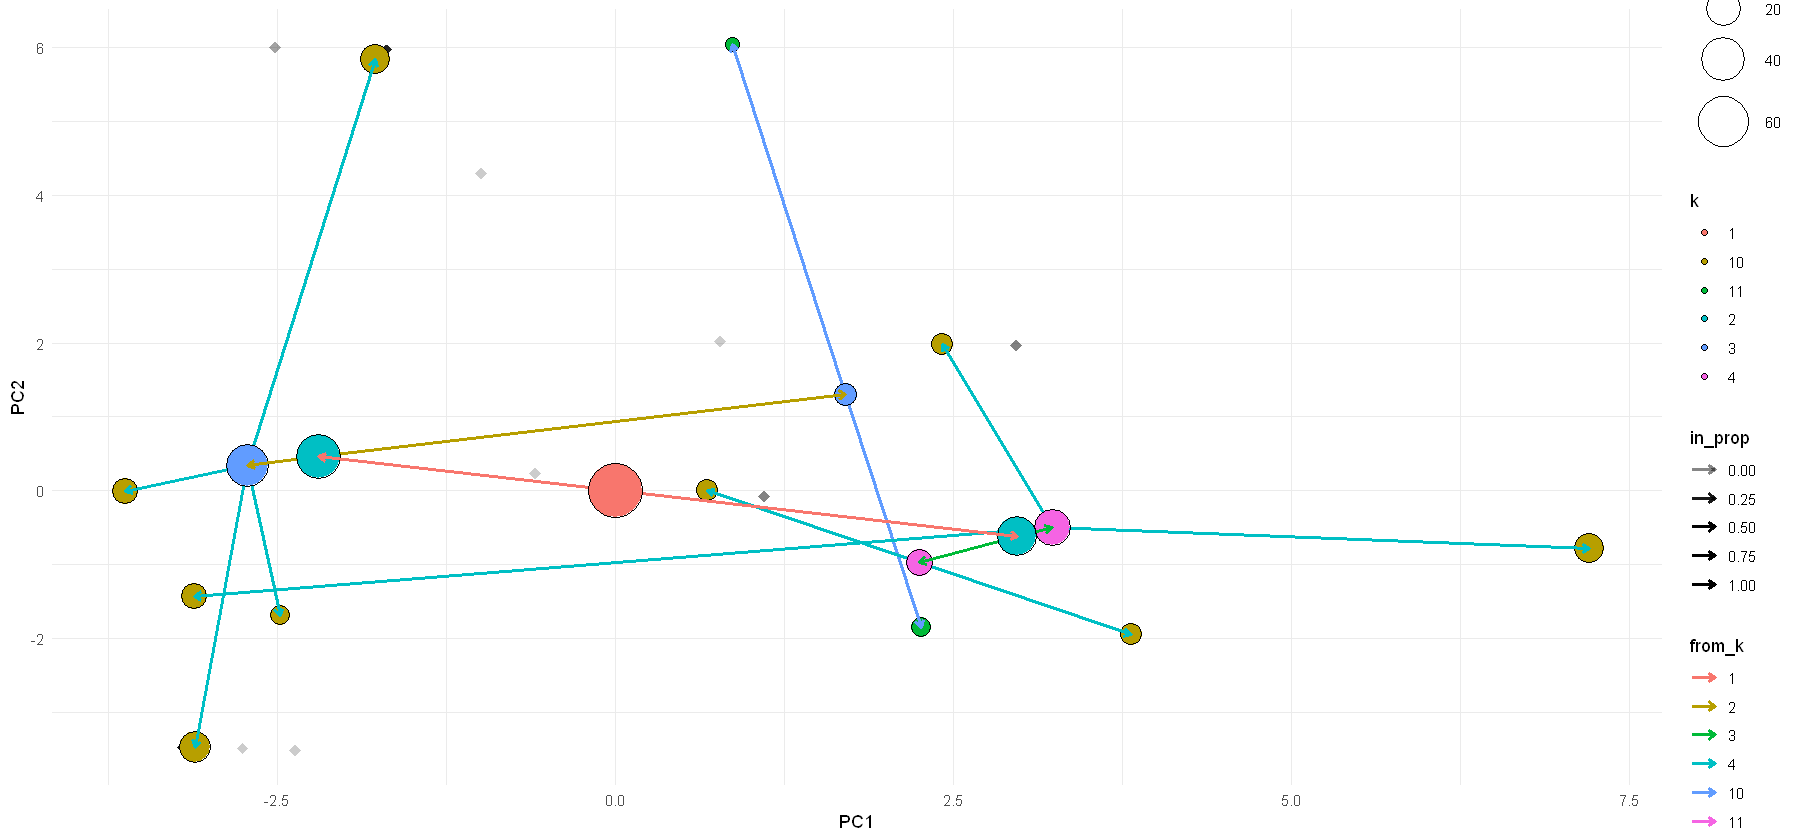

In [134]:
df_subset <- df %>% select(1:4,10:13)
clustree_overlay(df_subset, prefix = "k", x_value = "PC1", y_value = "PC2")

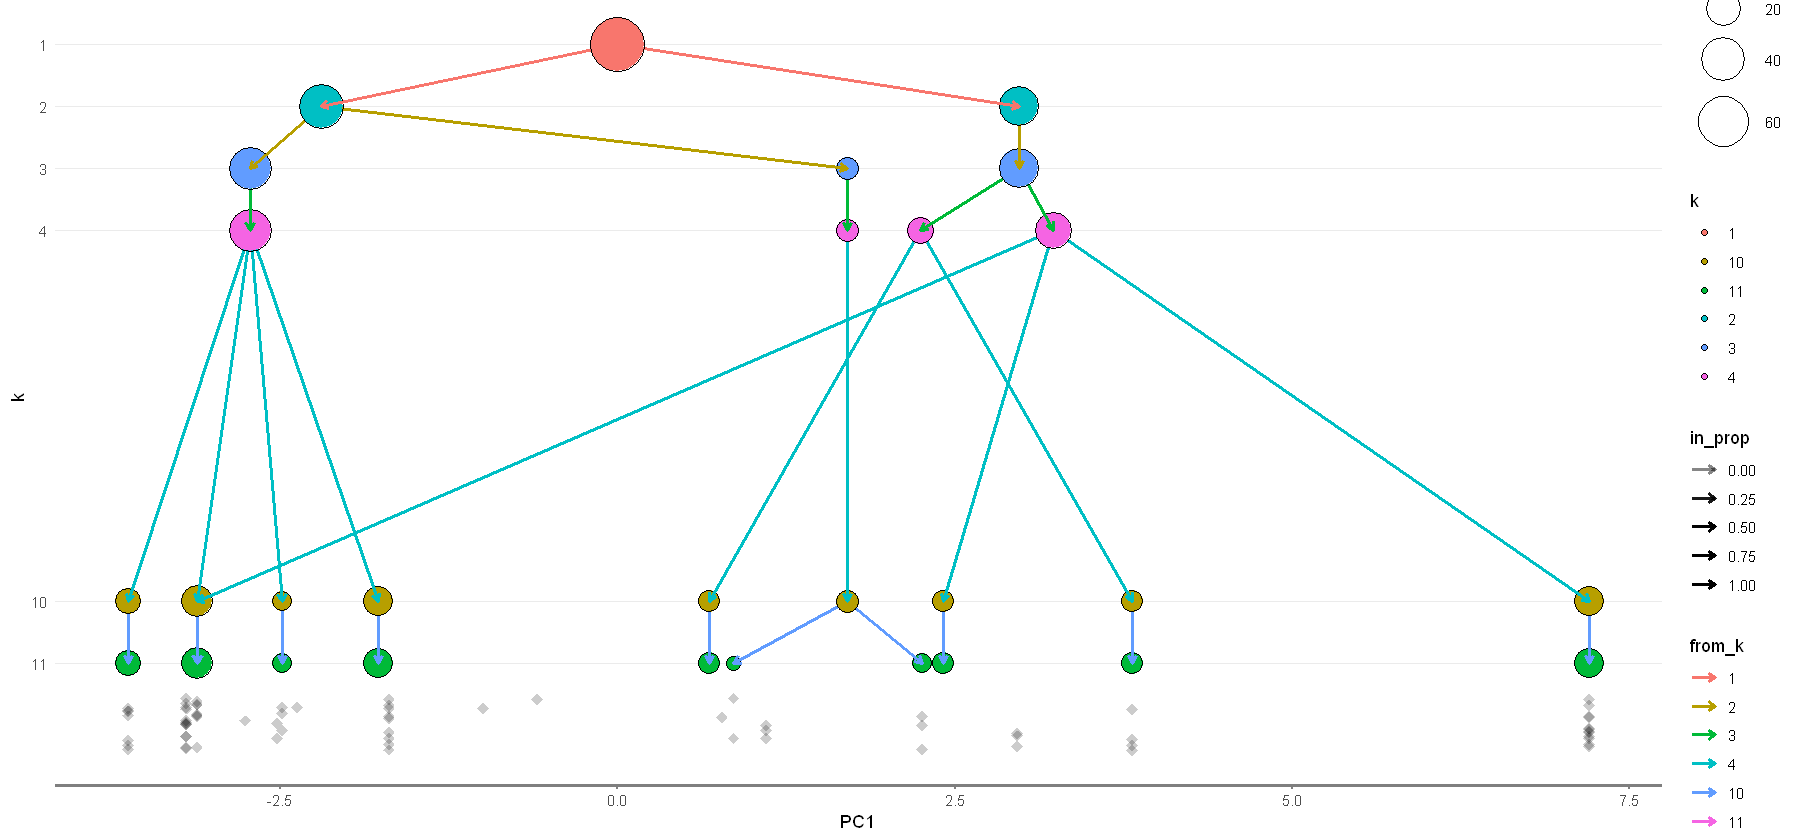

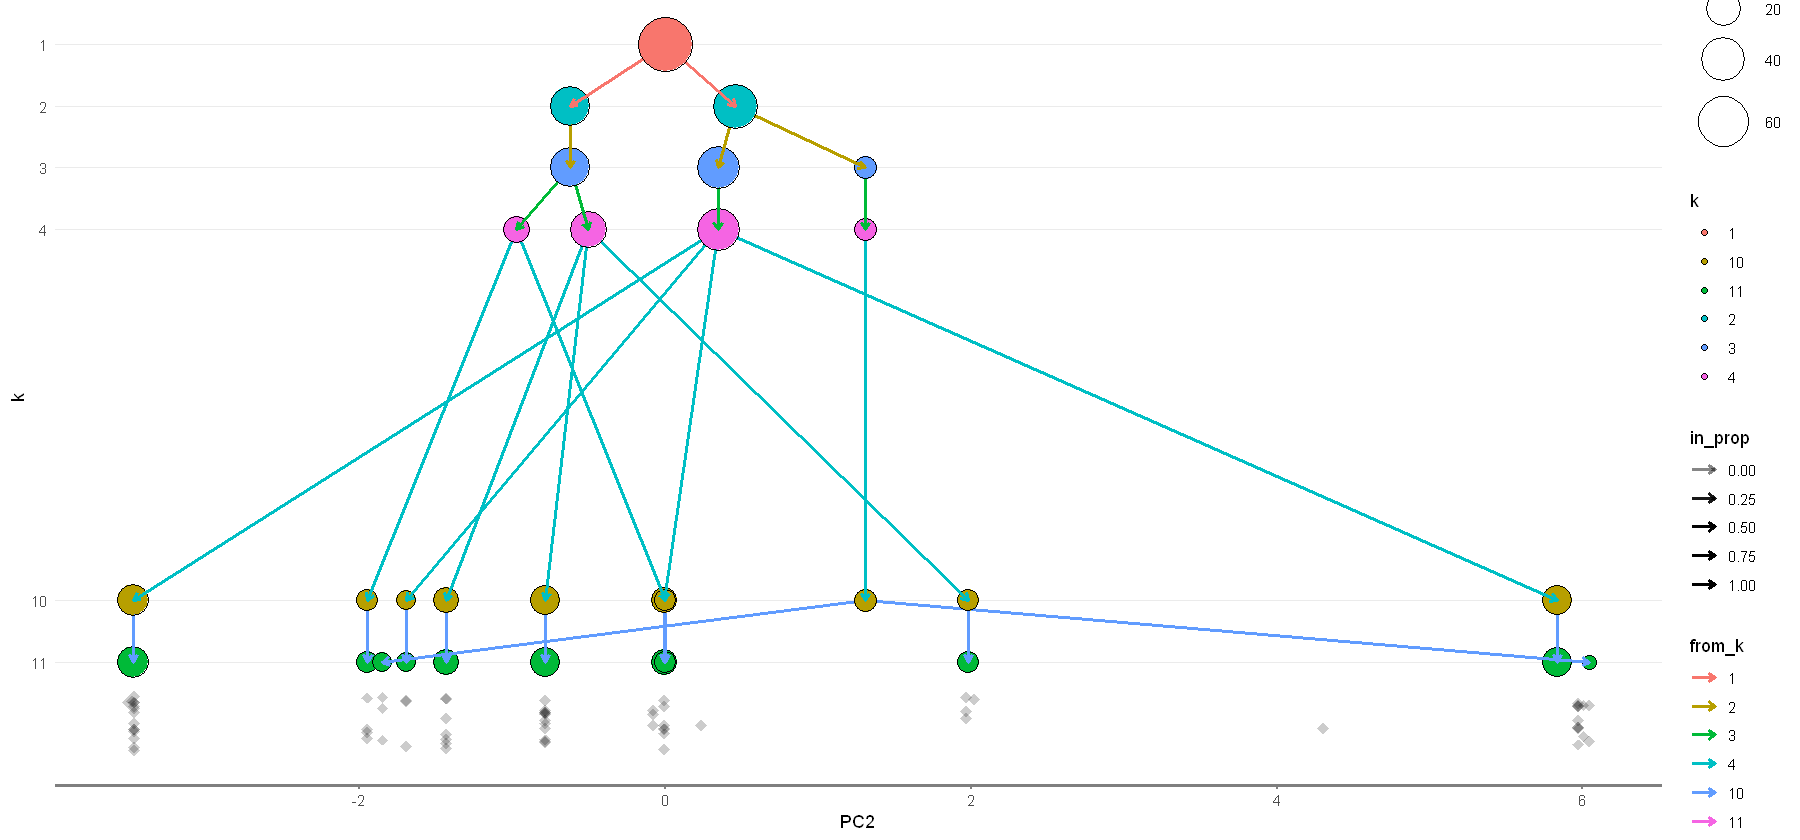

In [135]:
overlay_list <- clustree_overlay(df_subset, prefix = "k", x_value = "PC1",
                                 y_value = "PC2", plot_sides = TRUE)
overlay_list$x_side
overlay_list$y_side

This shows that we can an indication of the correct clustering resolution by examining the edges and we can overly information to assess the quality of the clustering.

List of the optimal index values of the NBClust function

In [162]:
list(optimald2$Best.nc)
list(optimald2$Best.nc[,c(3,5:8,10:11,18)])
#list(optimald$Best.nc)
#list(optimalcomplete$Best.nc)
#list(optimal.kmeans$Best.nc)
list(optimald2$All.index[,c(3,5:8,10:11,18)])
index.d2 <- optimald2$All.index[,c(3,10,11)]

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Frey,McClain,Gamma,Gplus,Tau,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,7.0000,3.0000,4.0000,7.0000,4.0000,4.000000e+00,4,4.00,6.0000,4.0000,...,2,3.0000,6.0000,7.0000,3.0000,6.0000,0,6.0000,0,7.0000
Value_Index,1.5038,36.6492,2.9579,12.2279,94.8379,2.597468e+55,39640250,5434.16,148.4083,-0.0571,...,NA,0.7474,0.8631,31.7013,512.7916,0.3229,0,0.0489,0,0.3285


,Hartigan,Scott,Marriot,TrCovW,TraceW,Rubin,Cindex,Ball
Number_clusters,4.0000,4.0000,4.000000e+00,4,4.00,4.0000,4.0000,4.00
Value_Index,2.9579,94.8379,2.597468e+55,39640250,5434.16,-0.0571,0.3487,13324.24


,Hartigan,Scott,Marriot,TrCovW,TraceW,Rubin,Cindex,Ball
3,13.4174,920.9659,9.850115e+55,120393501,107849.23,5.1757,0.3569,35949.743
4,10.4595,1015.8038,4.776452e+55,80753251,90502.01,6.1677,0.3487,22625.503
5,9.7489,1101.7222,2.300256e+55,61137249,78588.95,7.1027,0.3713,15717.791
6,10.8341,1166.4581,1.364614e+55,38878446,68734.72,8.1209,0.4224,11455.787
7,7.9719,1260.6436,5.111766e+54,26879005,59167.24,9.4341,0.4343,8452.462


Dev of bar plot determing the best clustering result is 4 cuts.

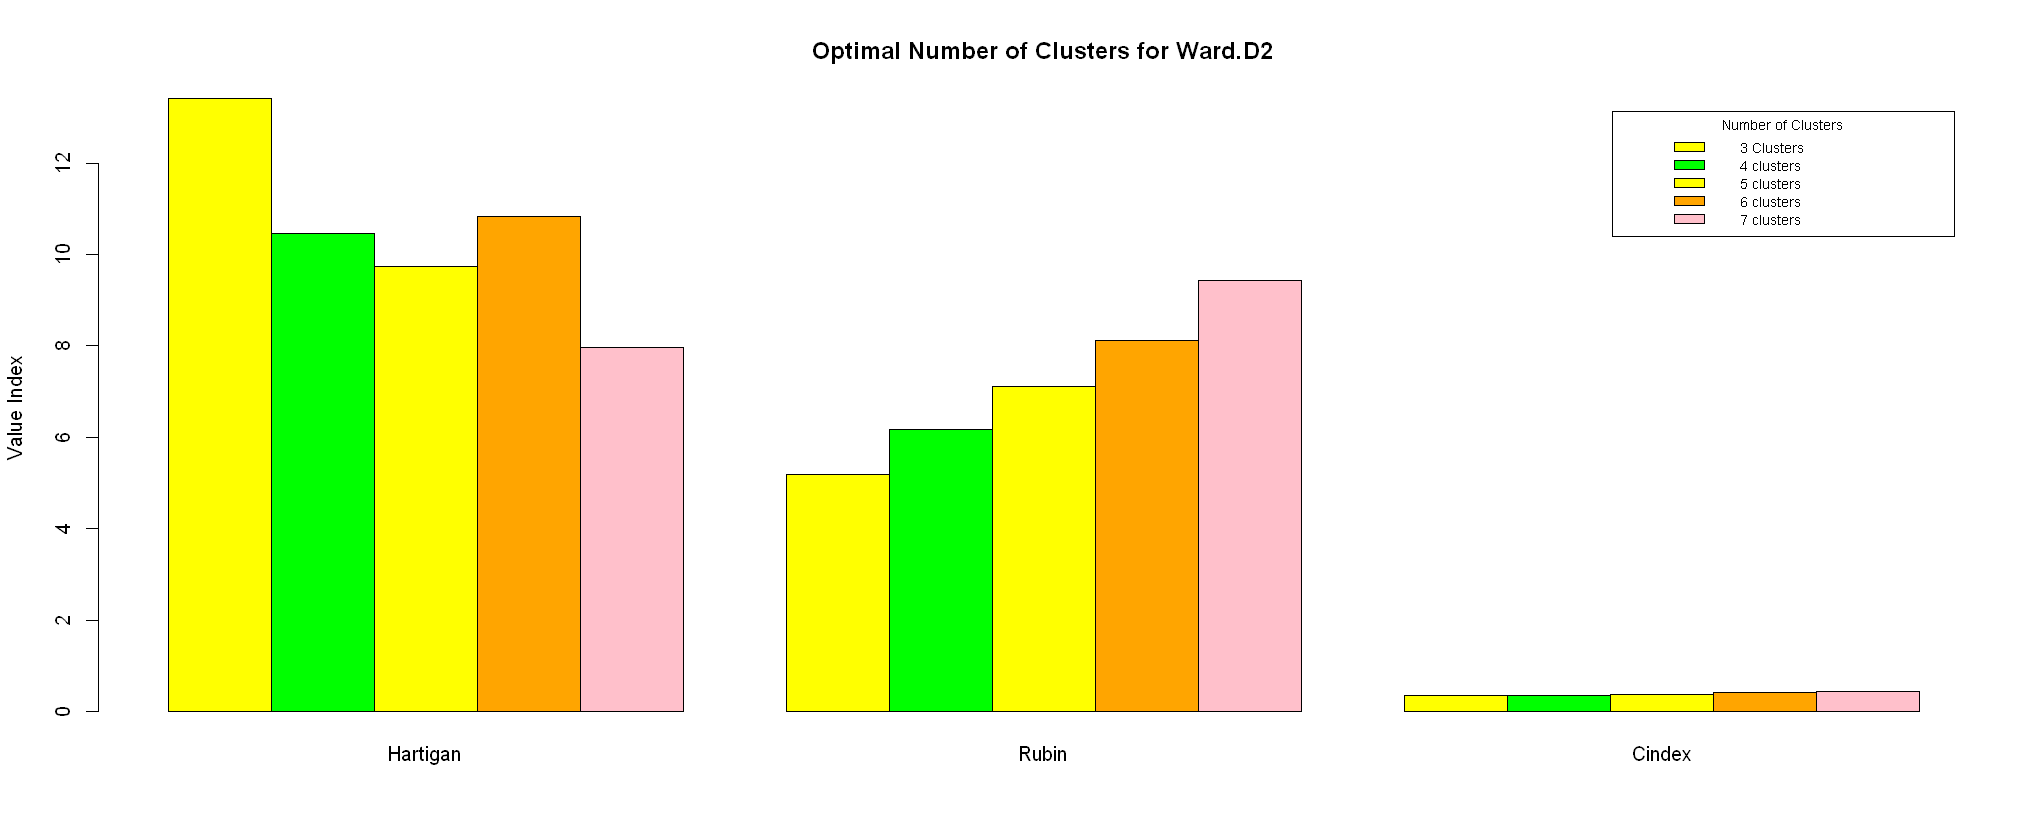

In [182]:
barplot(index.d2, beside = TRUE, main = "Optimal Number of Clusters for Ward.D2",
        col = c("yellow","green", "yellow", "orange","pink"),
        ylab = "Value Index", legend = c("3 Clusters", "4 clusters", "5 clusters","6 clusters","7 clusters"), 
        args.legend = list(title = "Number of Clusters", cex = .7))

Cutting at different tree levels 4 which is the optimal for Ward.D2

In [165]:
clusters_wa <- cutree(hc.ward2,4)     
dfsimple$clusters <- cutree(hc.ward2,4)
head(dfsimple,7)
write_xlsx(dfsimple , '../../results/dfsimple.xlsx')

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,3
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,3
Benin,2018,DHS,71.7,5.1,4.2,13.0,28.9,4.4,0.3,...,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3,1


# Fancy Clustering Graph Majority 

,cluster,n
,<int>,<int>
1,1,37
2,2,8
3,3,23
4,4,5


[[1]]
 [1] "Afghanistan"               "Angola"                   
 [3] "Benin"                     "Burkina Faso"             
 [5] "Burundi"                   "Cameroon"                 
 [7] "Chad"                      "Congo"                    
 [9] "Congo Democratic Republic" "Cote d'Ivoire"            
[11] "Eritrea"                   "Eswatini"                 
[13] "Ethiopia"                  "Gambia"                   
[15] "Ghana"                     "Guinea"                   
[17] "Haiti"                     "Kenya"                    
[19] "Lesotho"                   "Liberia"                  
[21] "Madagascar"                "Malawi"                   
[23] "Mali"                      "Mauritania"               
[25] "Mozambique"                "Myanmar"                  
[27] "Niger"                     "Nigeria"                  
[29] "Papua New Guinea"          "Rwanda"                   
[31] "Sao Tome and Principe"     "Sierra Leone"             
[33] "Tanzania"                  "Togo"                     
[35] "Uganda"                    "Zambia"                   
[37] "Zimbabwe"                 

[[2]]
[1] "Albania"  "Armenia"  "Colombia" "Egypt"    "Honduras" "Jordan"   "Peru"    
[8] "Turkey"  

[[3]]
 [1] "Azerbaijan"         "Bangladesh"         "Bolivia"           
 [4] "Comoros"            "Dominican Republic" "Gabon"             
 [7] "Guatemala"          "Guyana"             "India"             
[10] "Indonesia"          "Kyrgyz Republic"    "Maldives"          
[13] "Namibia"            "Nepal"              "Nicaragua"         
[16] "Pakistan"           "Philippines"        "Senegal"           
[19] "South Africa"       "Tajikistan"         "Timor-Leste"       
[22] "Turkmenistan"       "Yemen"             

[[4]]
[1] "Cambodia" "Moldova"  "Morocco"  "Ukraine"  "Vietnam"

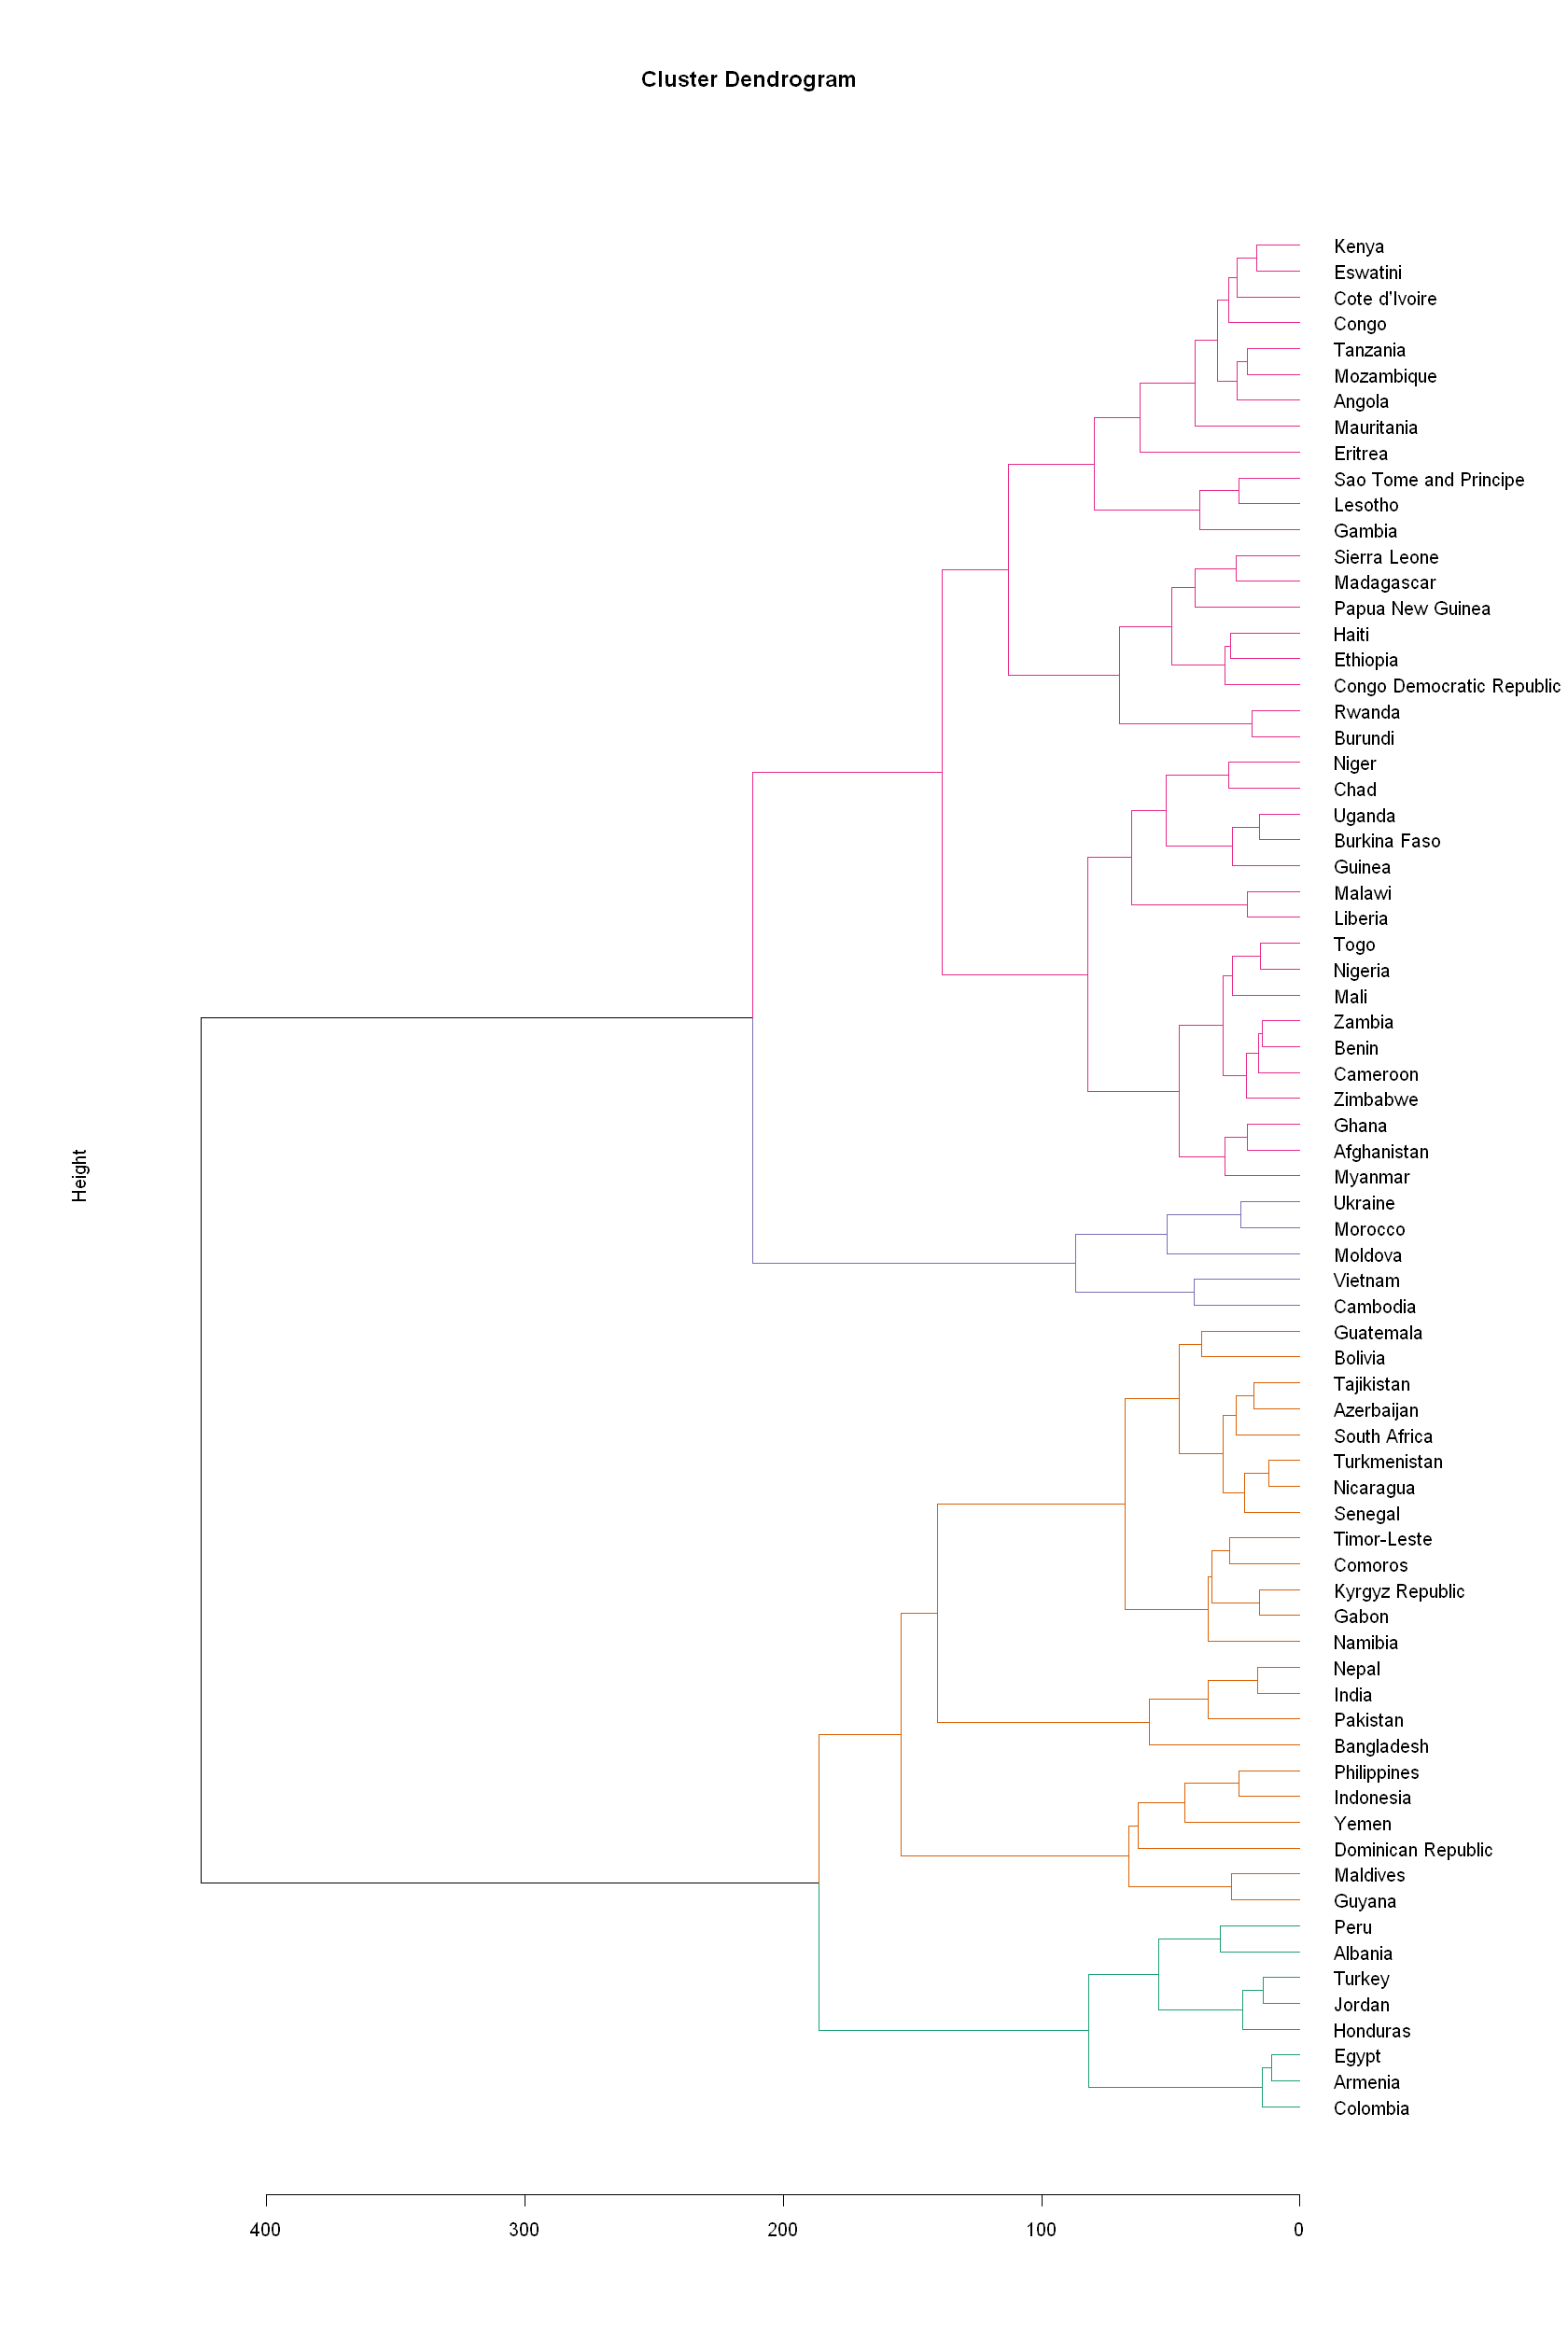

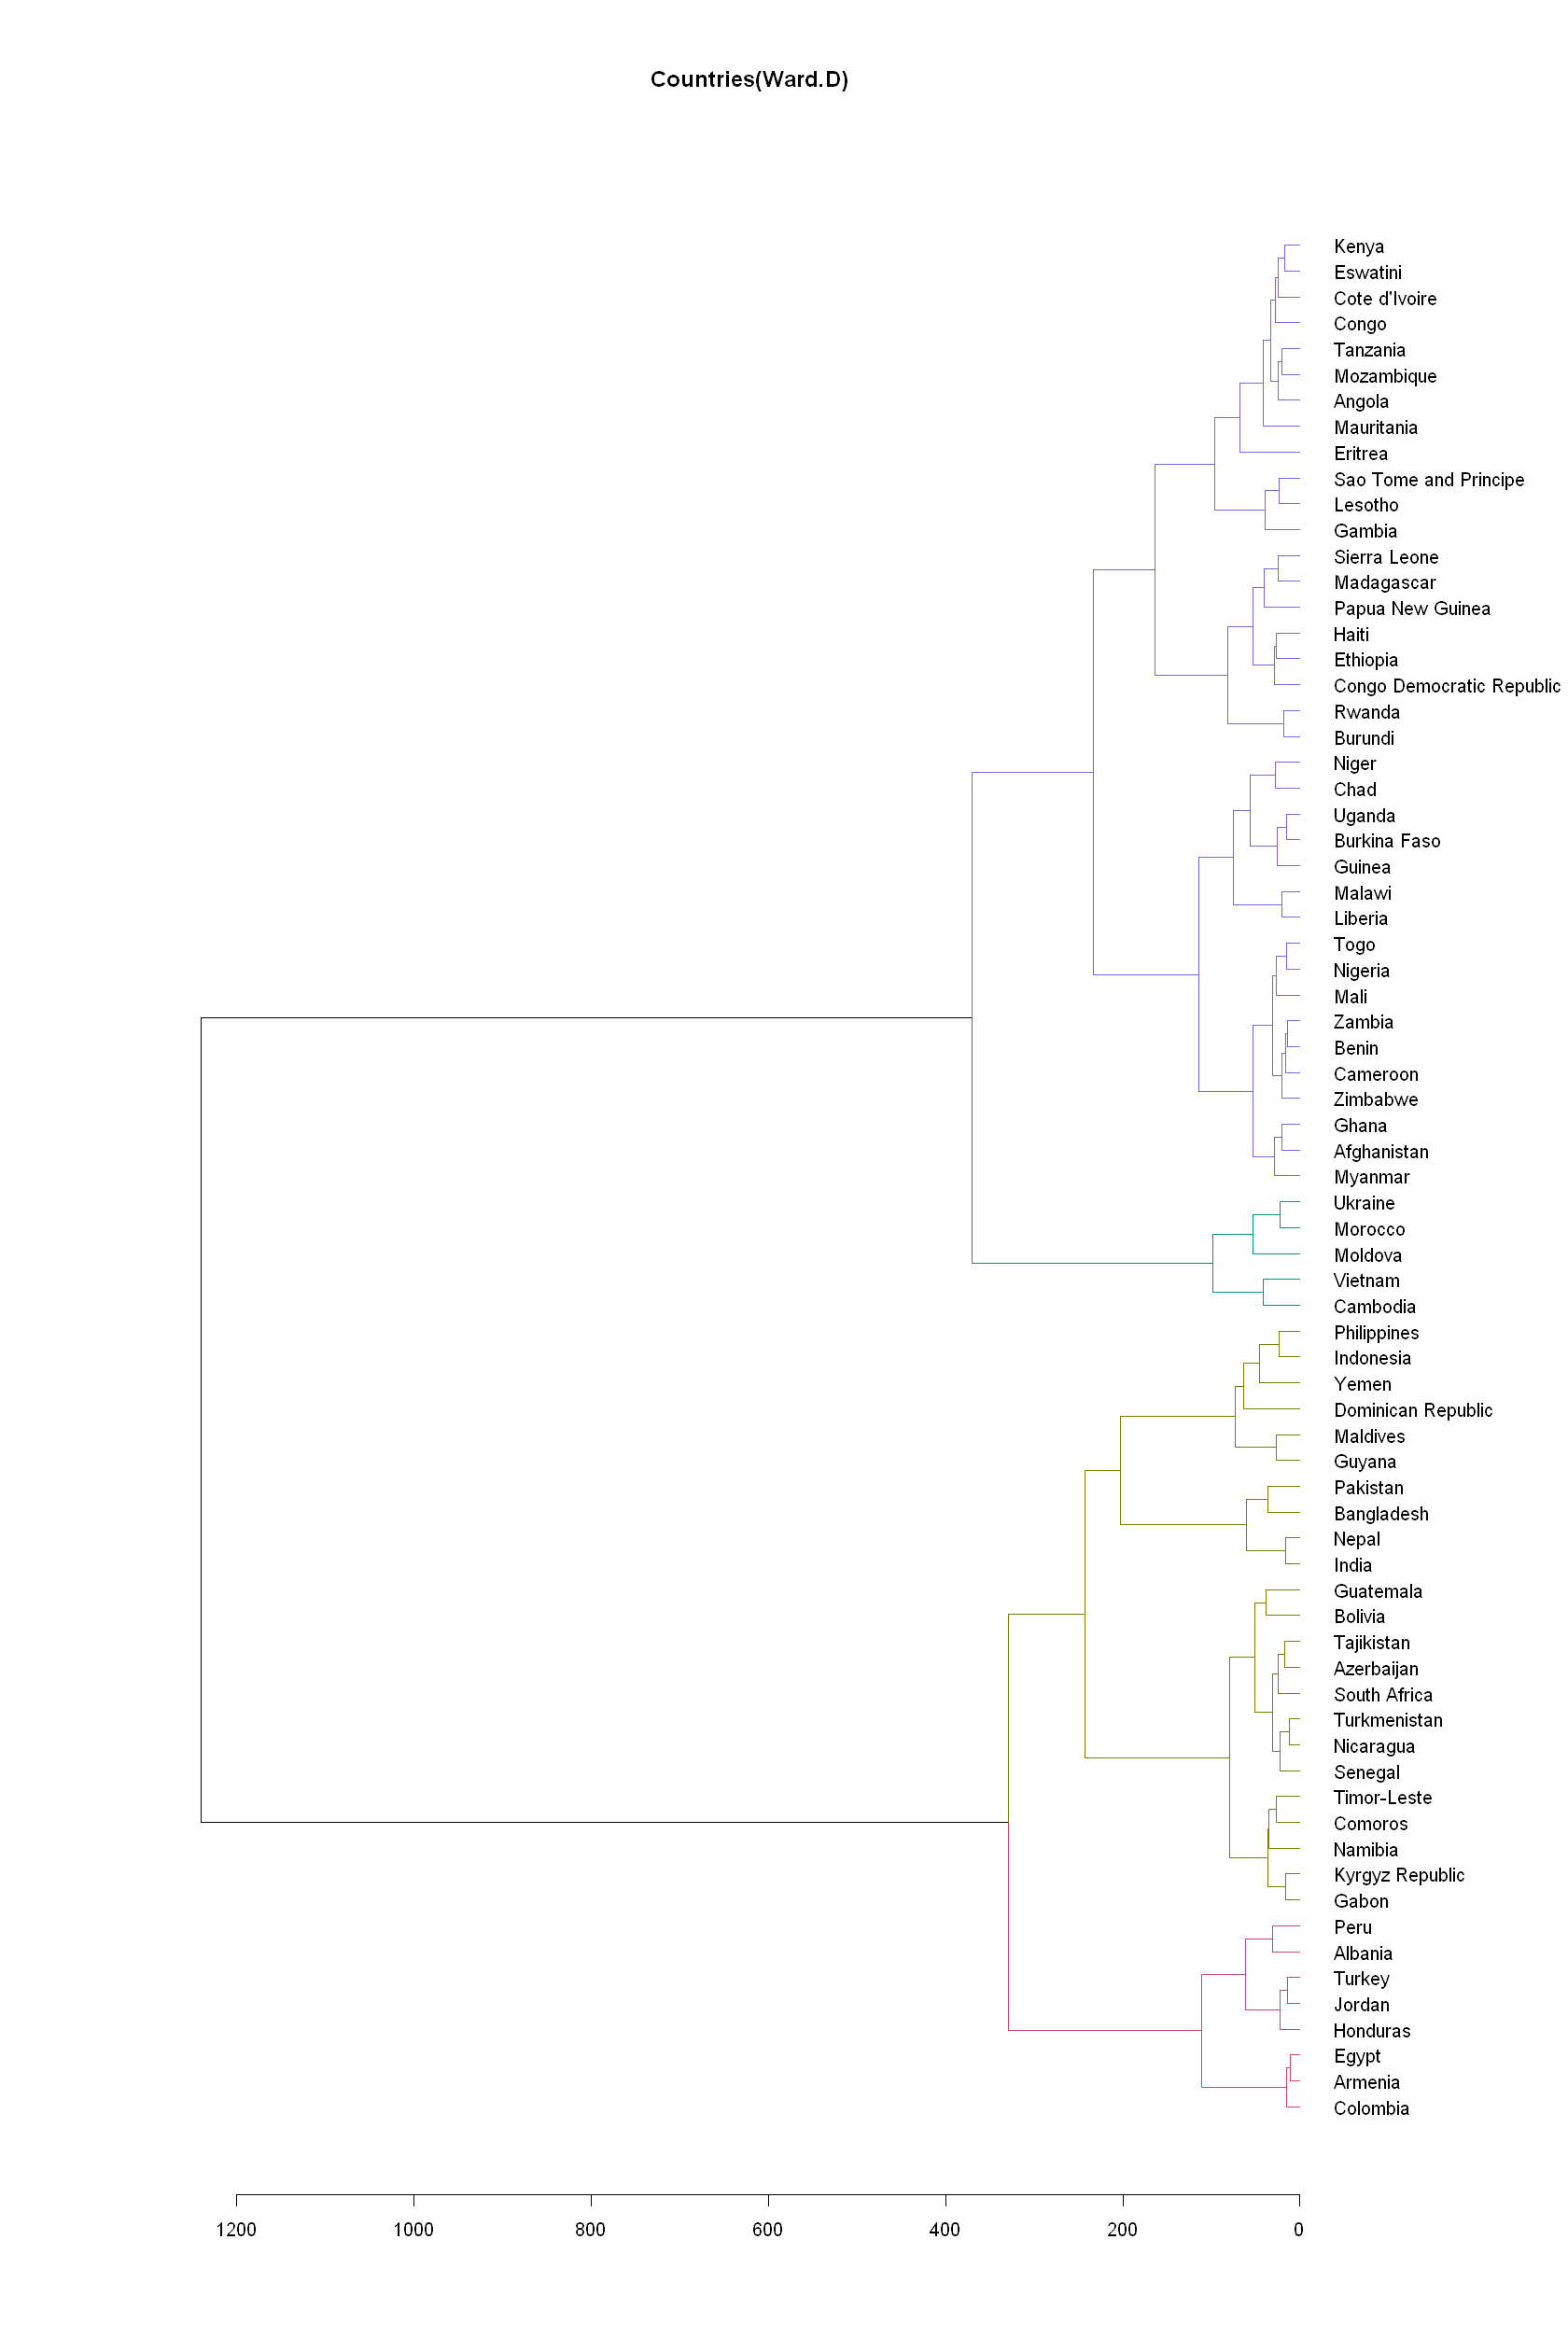

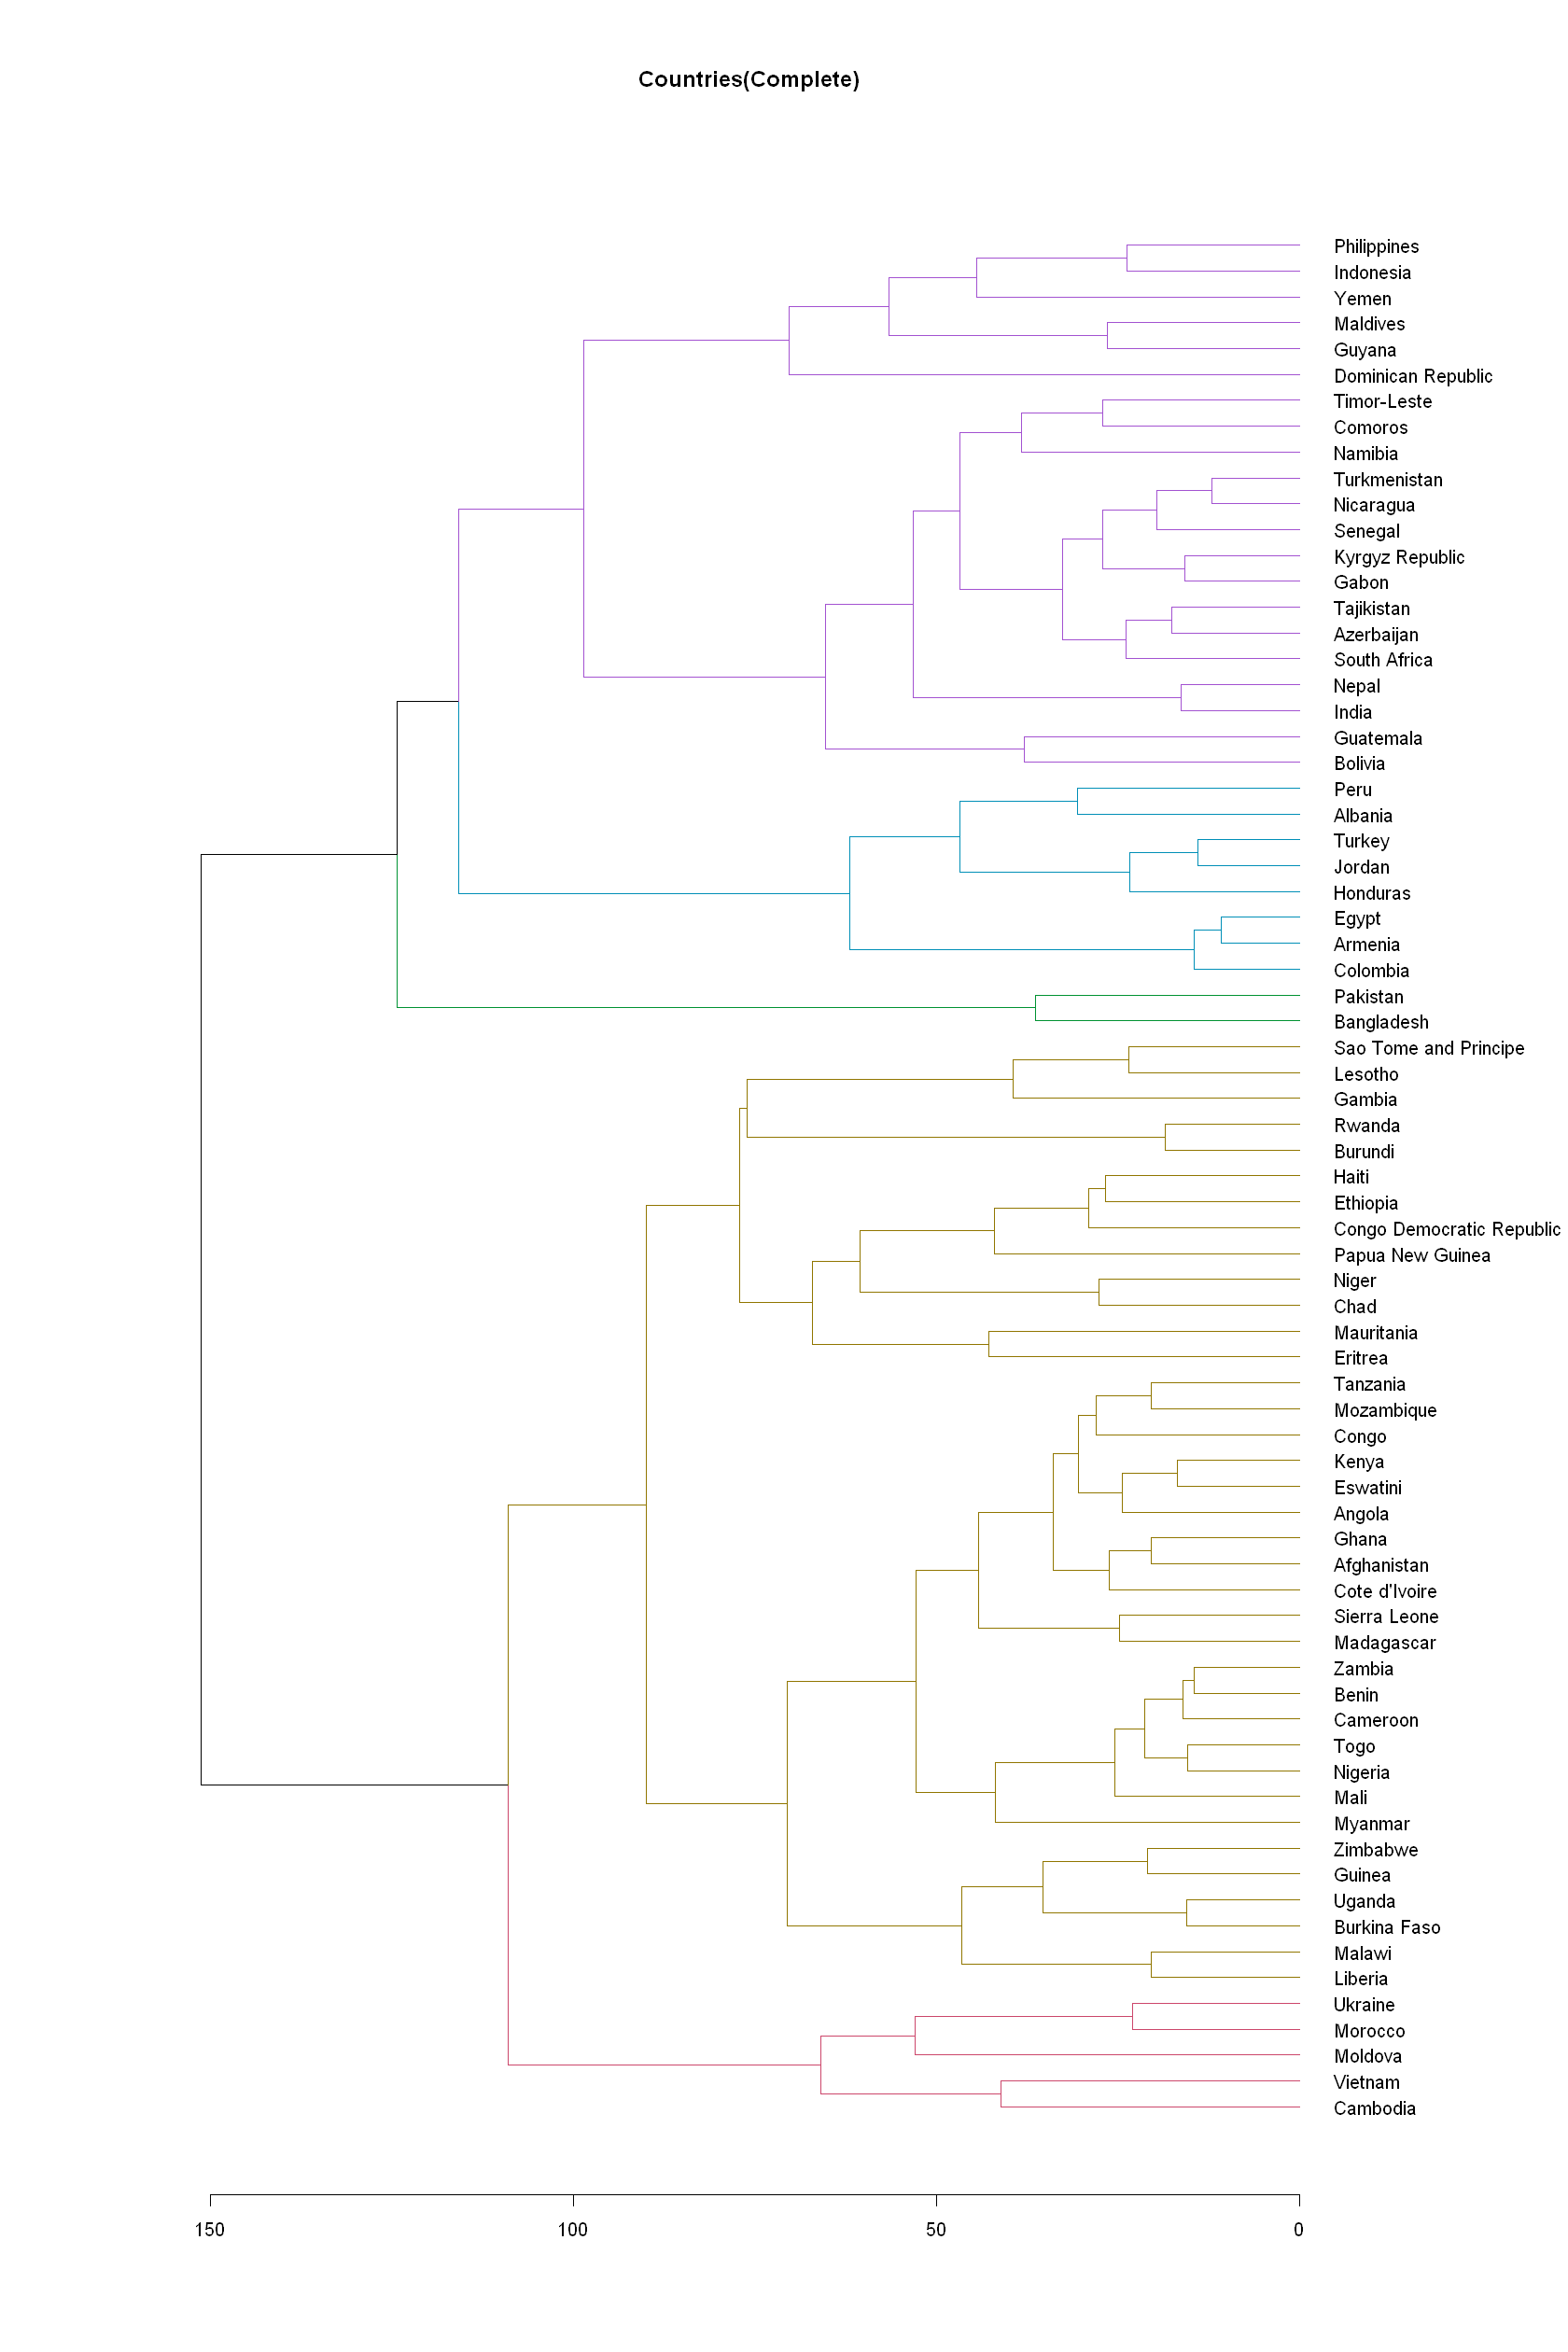

In [176]:
dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=4, col = c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A" ))
labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=14, repr.plot.height=21)
par(mar = c(7,7,7,10))
par(cex=1)
plot(dend, main="Cluster Dendrogram", xlab="", 
     ylab="Height", horiz=TRUE )


df.wa.d2.avg <- mutate(df.wa, cluster = clusters_wa)
count(df.wa.d2.avg, cluster)

sapply(unique(clusters_wa),function(g)dfsimple$Country[clusters_wa == g])

options(repr.plot.width=14, repr.plot.height=21)
par(mar = c(7,7,7,10))
par(cex=1)
dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=4)
labels(dend) <- dfsimple$Country[hc.ward$order]

options(repr.plot.width=14, repr.plot.height=21)
par(mar = c(7,7,7,10))
par(cex=1)
plot(dend, main="Countries(Ward.D)", xlab="", 
     ylab="", cex=.5, horiz=TRUE  )

dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=5)
labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=14, repr.plot.height=21)
par(mar = c(7,7,7,10))
par(cex=1)
plot(dend, main="Countries(Complete)", xlab="", 
     ylab="", cex=.5,horiz=TRUE  )
   


Four cuts

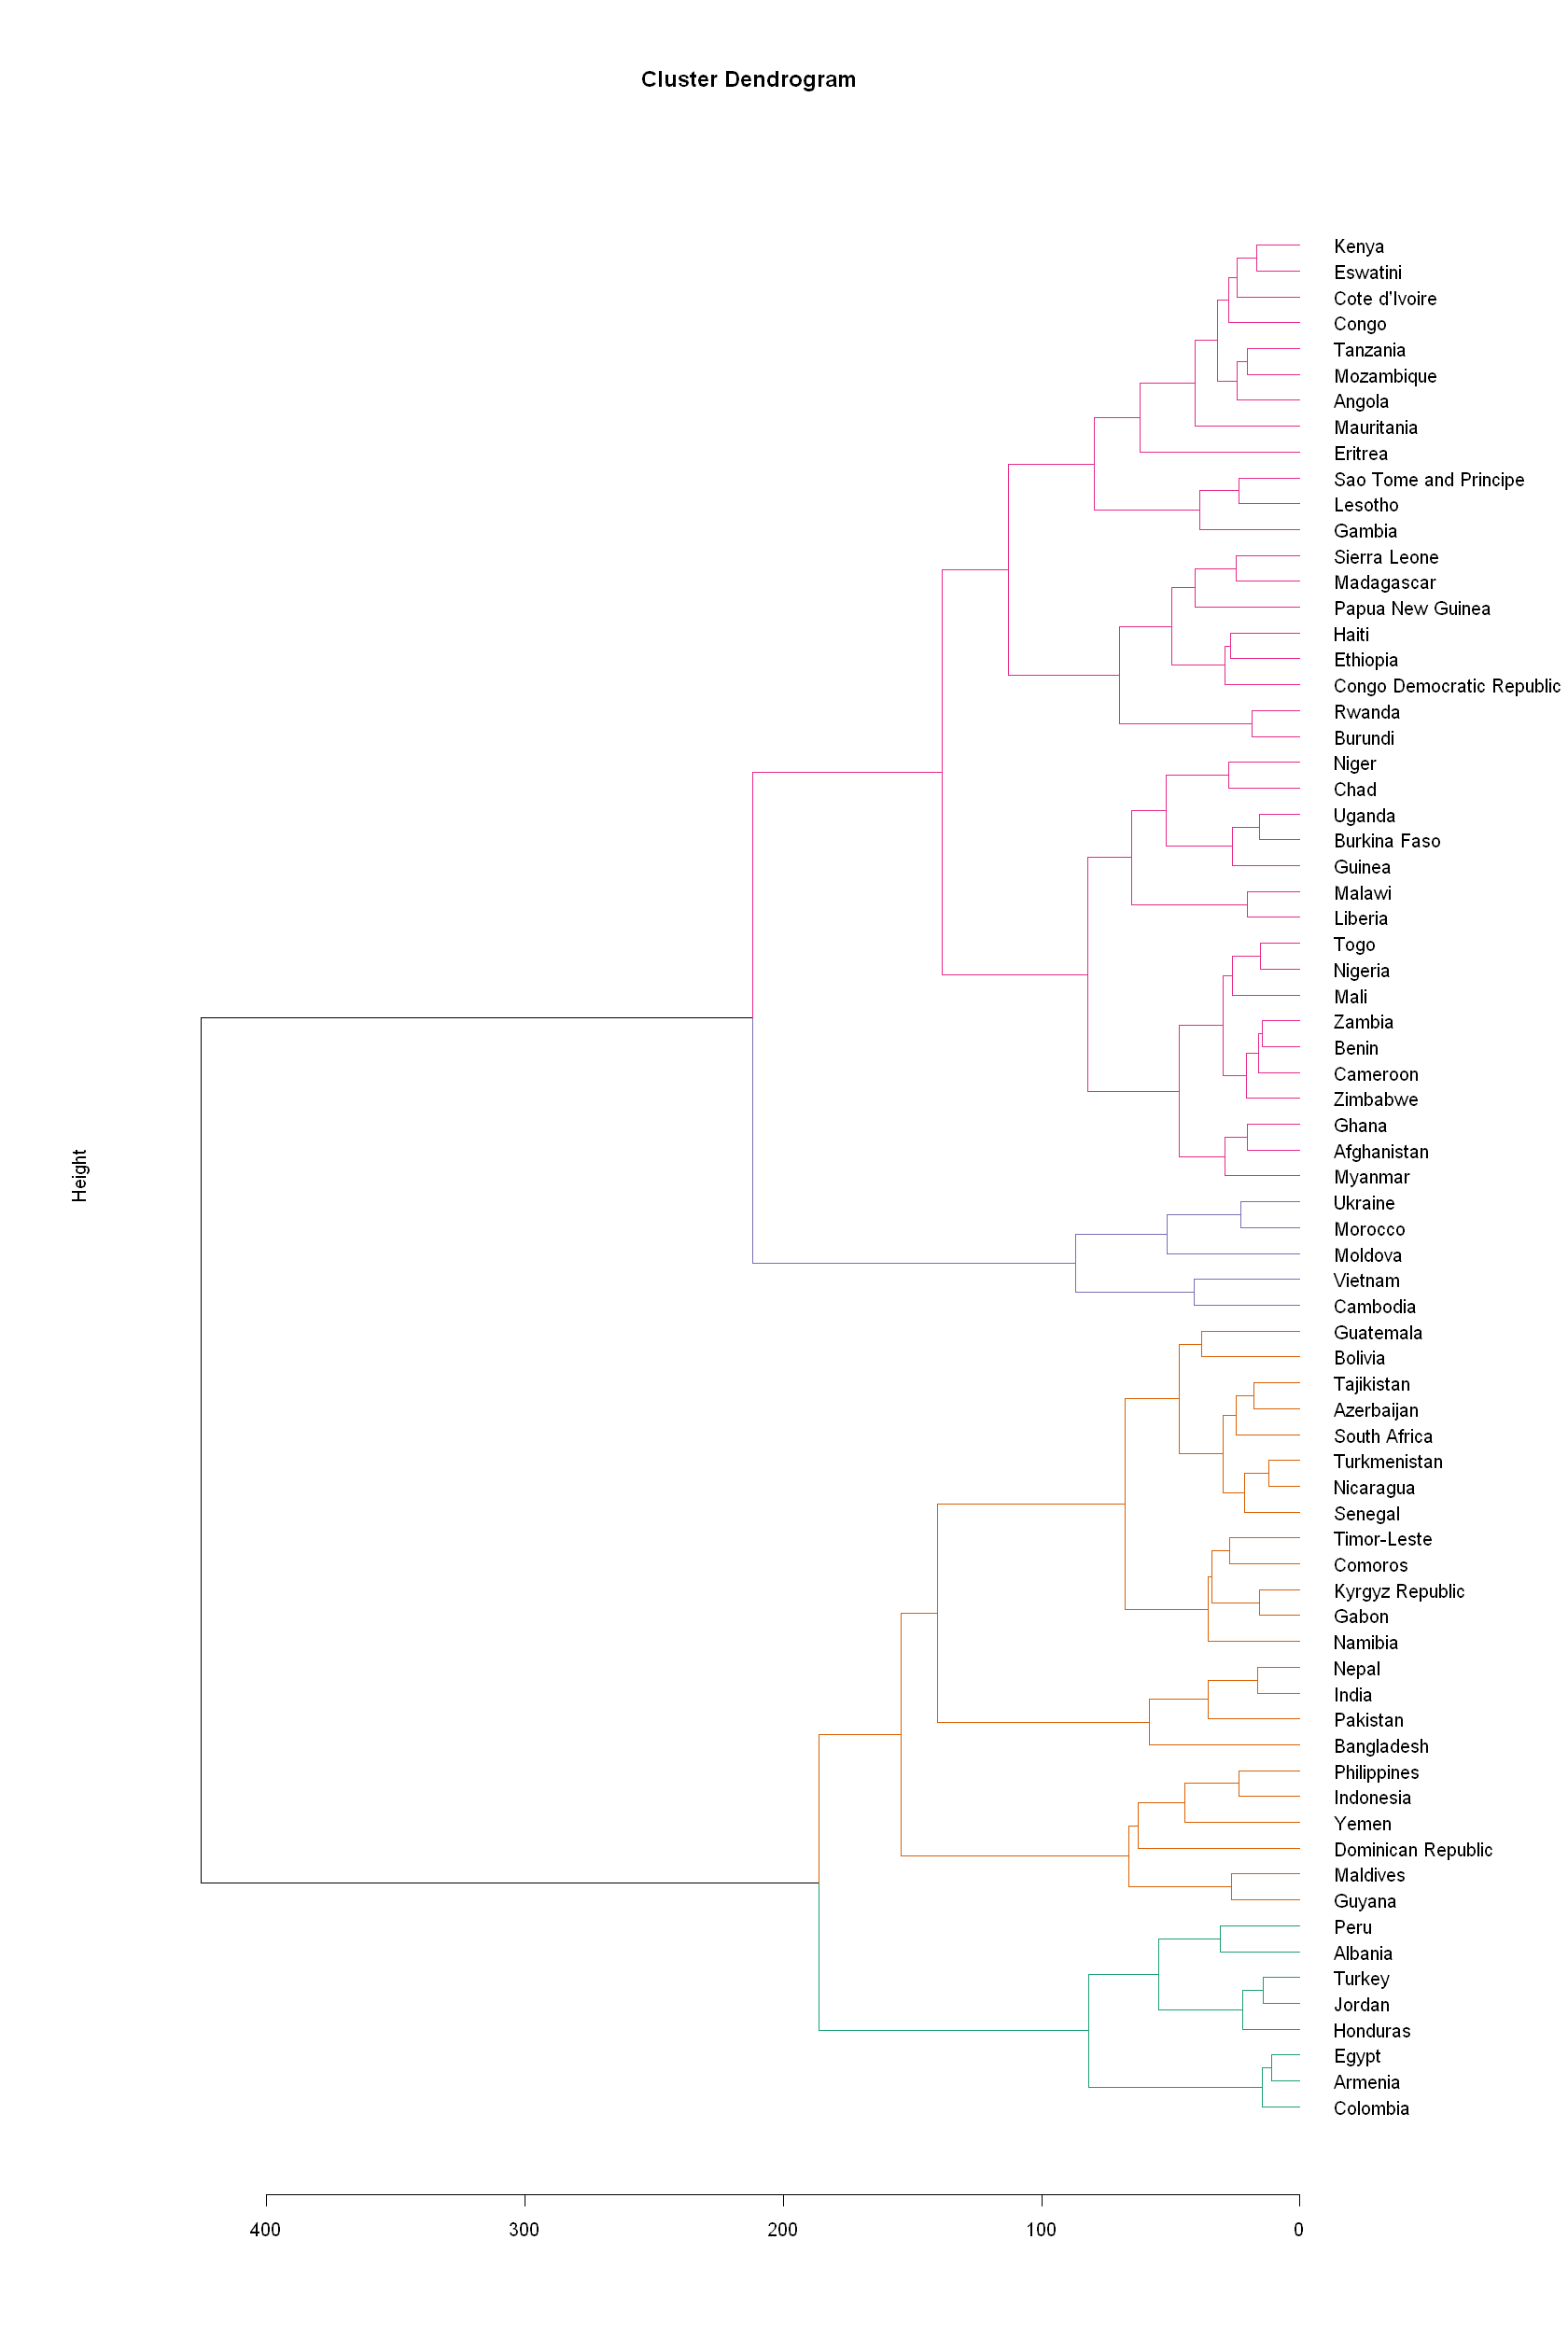

In [177]:
dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=4, col = c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A"))
labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=14, repr.plot.height=21)
par(mar = c(7,7,7,10))
par(cex=1)
plot(dend, main="Cluster Dendrogram", xlab="", 
     ylab="Height",horiz=TRUE )

# K-Mean Clustering in R

List of 9
 $ cluster     : int [1:73] 1 2 1 2 2 2 1 2 1 1 ...
 $ centers     : num [1:2, 1:17] 8.14 32.1 8.97 15.15 15.39 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:17] "phom" "pipy" "ptap" "bore" ...
 $ totss       : num 220780
 $ withinss    : num [1:2] 70077 60214
 $ tot.withinss: num 130291
 $ betweenss   : num 90489
 $ size        : int [1:2] 42 31
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 2 clusters of sizes 42, 31

Cluster means:
       phom      pipy      ptap      bore      pwel     pspr     rain      uwel
1  8.140476  8.969048 15.385714 16.080952 10.107143 4.471429 2.185714 10.759524
2 32.096774 15.145161  7.435484  9.841935  2.193548 1.812903 3.496774  1.651613
      uspr      truc      ctan      bott      othw     surw     tles      tmor
1 6.009524 0.9642857 0.5523810  1.304762 0.3071429 7.192857 45.78095 14.766667
2 1.016129 2.1064516 0.5387097 14.048387 0.6354839 2.693548 15.83548  2.780645
      watp
1 26.29286
2 80.65806

Clustering vector:
 [1] 1 2 1 2 2 2 1 2 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2 1 2 1 1
[39] 1 1 2 1 1 1 1 1 1 2 2 2 1 1 2 1 2 2 1 1 2 1 2 2 1 2 1 2 2 1 1 1 2 1 1

Within cluster sum of squares by cluster:
[1] 70077.09 60214.07
 (between_SS / total_SS =  41.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"    

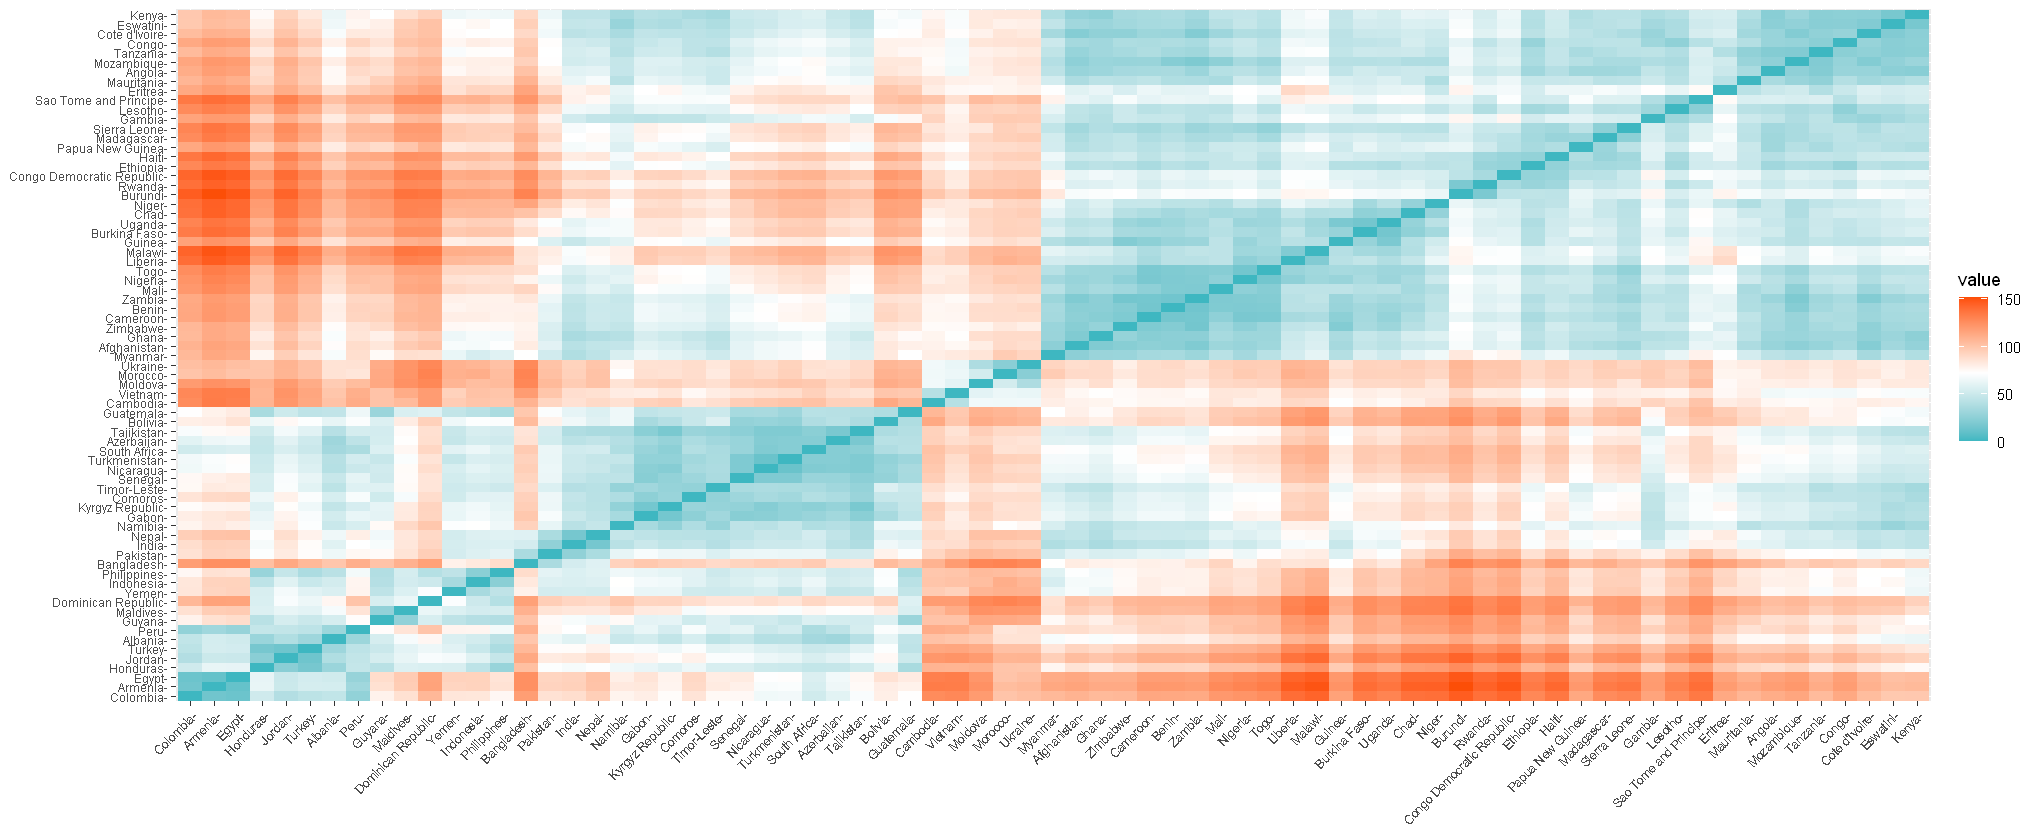

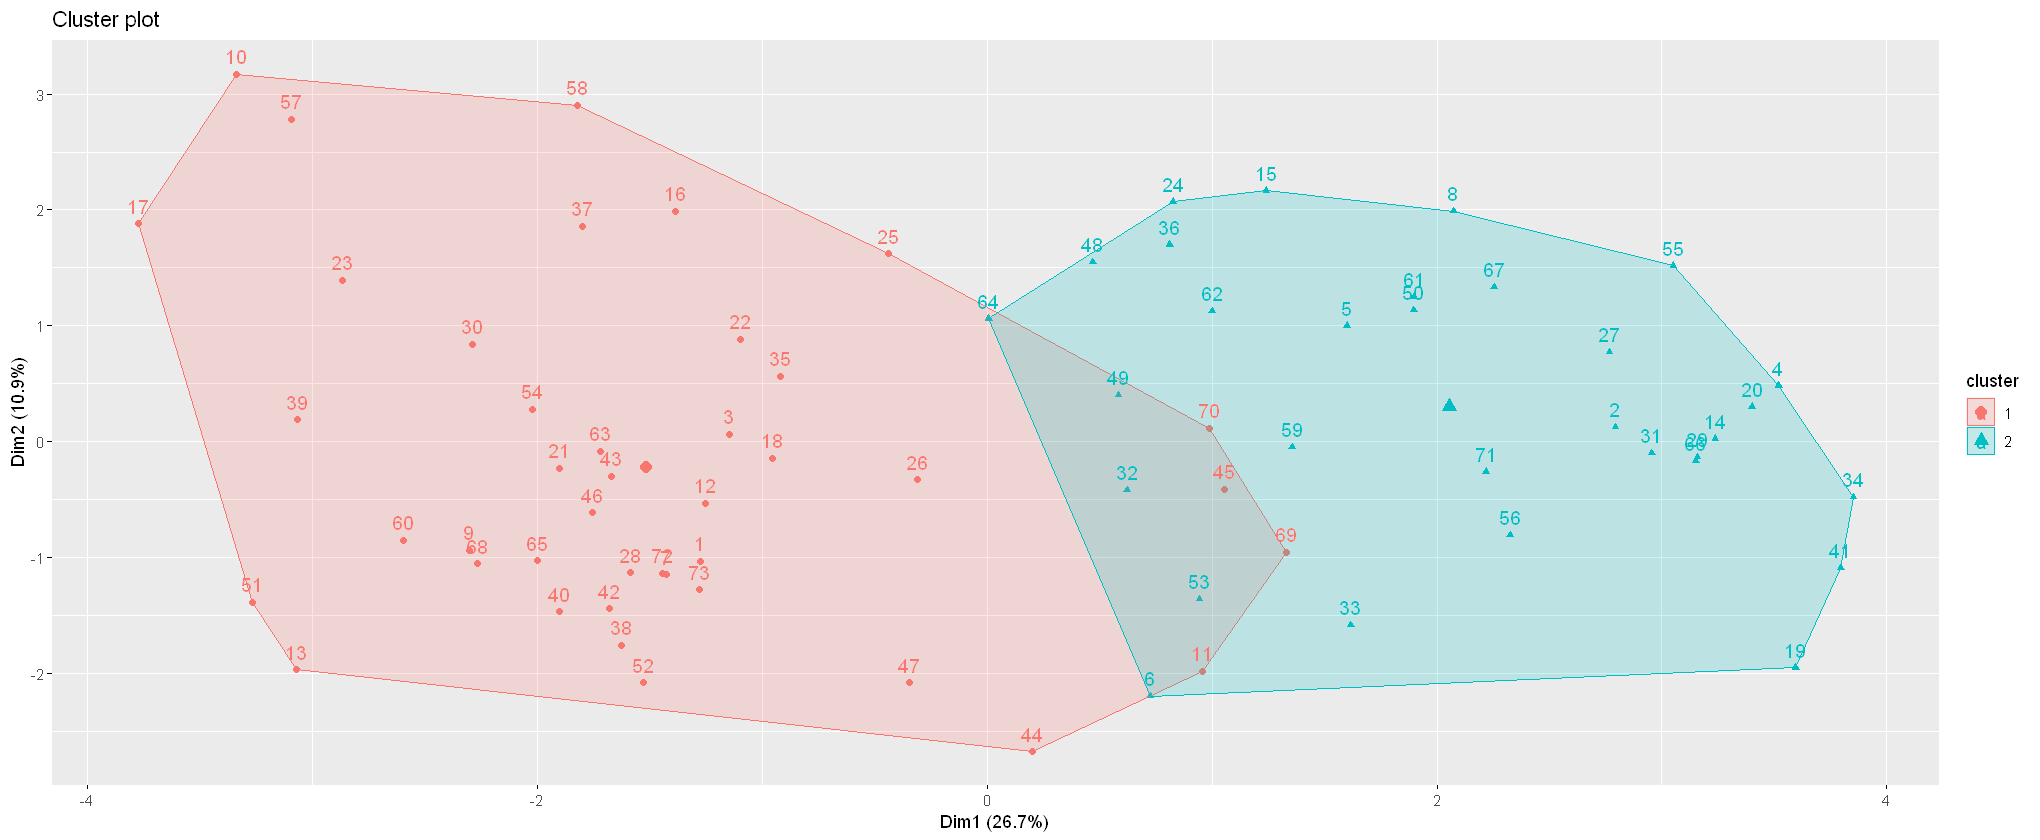

List of 9
 $ cluster     : int [1:73] 1 2 1 2 4 4 1 4 1 1 ...
 $ centers     : num [1:4, 1:17] 5.11 66.21 30.56 20.23 9.09 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:17] "phom" "pipy" "ptap" "bore" ...
 $ totss       : num 220780
 $ withinss    : num [1:4] 41435 5828 6200 37038
 $ tot.withinss: num 90502
 $ betweenss   : num 130278
 $ size        : int [1:4] 37 8 5 23
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 4 clusters of sizes 37, 8, 5, 23

Cluster means:
       phom      pipy      ptap     bore      pwel     pspr     rain      uwel
1  5.110811  9.089189 17.021622 17.48919  9.356757 4.975676 1.159459 11.545946
2 66.212500  3.262500  1.350000  0.95000  0.762500 1.400000 0.637500  0.287500
3 30.560000  8.080000  3.280000  5.66000 15.660000 0.740000 9.780000  4.940000
4 20.230435 19.278261  9.552174 12.93478  2.691304 1.956522 4.491304  2.126087
      uspr     truc      ctan      bott      othw     surw     tles      tmor
1 6.786486 1.018919 0.5486486  1.027027 0.3378378 7.740541 51.96757 16.762162
2 0.187500 2.600000 0.1000000 18.362500 0.8500000 2.012500  8.45000  0.787500
3 0.260000 0.560000 0.5800000  3.360000 0.0800000 3.140000  0.00000  0.000000
4 1.304348 1.934783 0.6913043 12.547826 0.5608696 2.930435 18.40435  3.473913
      watp
1 29.84595
2 90.48750
3  0.00000
4 77.23913

Clustering vector:
 [1] 1 2 1 2 4 4 1 4 1 1 3 1 1 2 4 1 1 1 4 2 1 1 1 4 1 1 4 1 4 1 2 

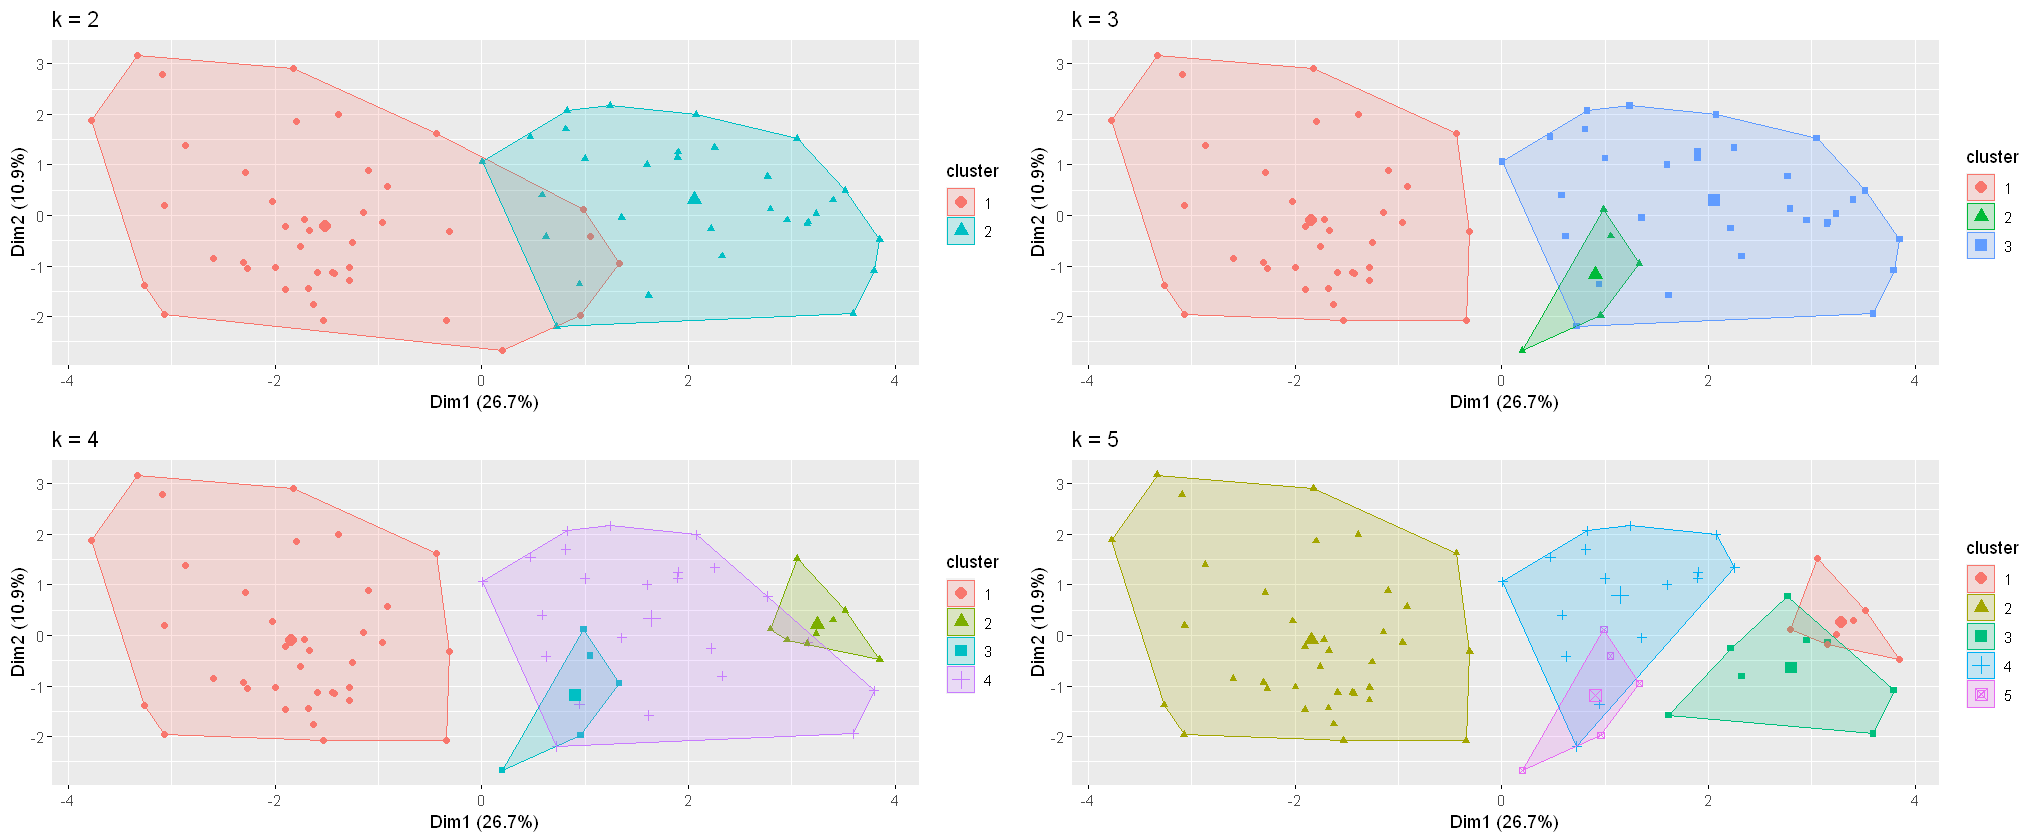

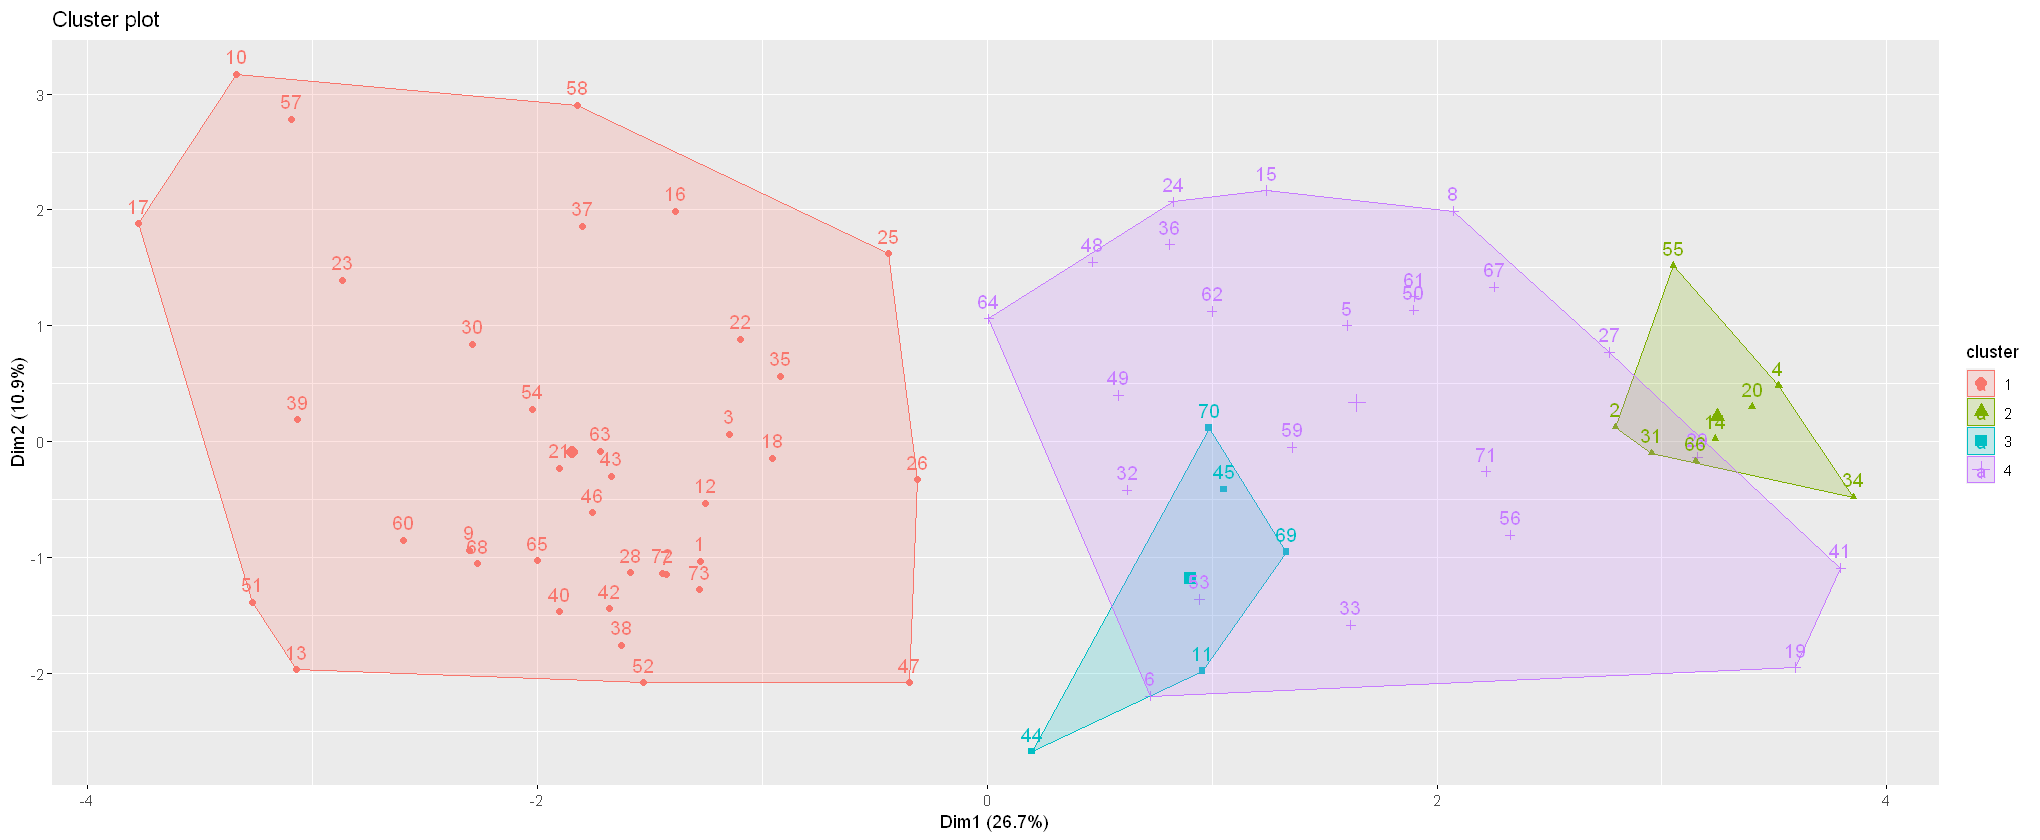

In [172]:
distance <- get_dist(df.wa)
labels(distance) <- dfsimple$Country
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high="#FC4E07"), lab_size = 7 )
k2 <- kmeans(df.wa, centers = 2, nstart = 25)
str(k2)
k2
fviz_cluster(k2, data = df.wa ,  )
# it is often advantageous to use several different values of k and examine the differences in the results.
# We can execute the same process for 3, 4, and 5 clusters, and the results are shown in the figure:
k3 <- kmeans(df.wa, centers = 3, nstart = 25)
k4 <- kmeans(df.wa, centers = 4, nstart = 25)
k5 <- kmeans(df.wa, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df.wa) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df.wa) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df.wa) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df.wa) + ggtitle("k = 5")
grid.arrange(p1, p2, p3, p4, nrow = 2)
str(k4)
k4
fviz_cluster(k4, data = df.wa )

# Gap Stat Method

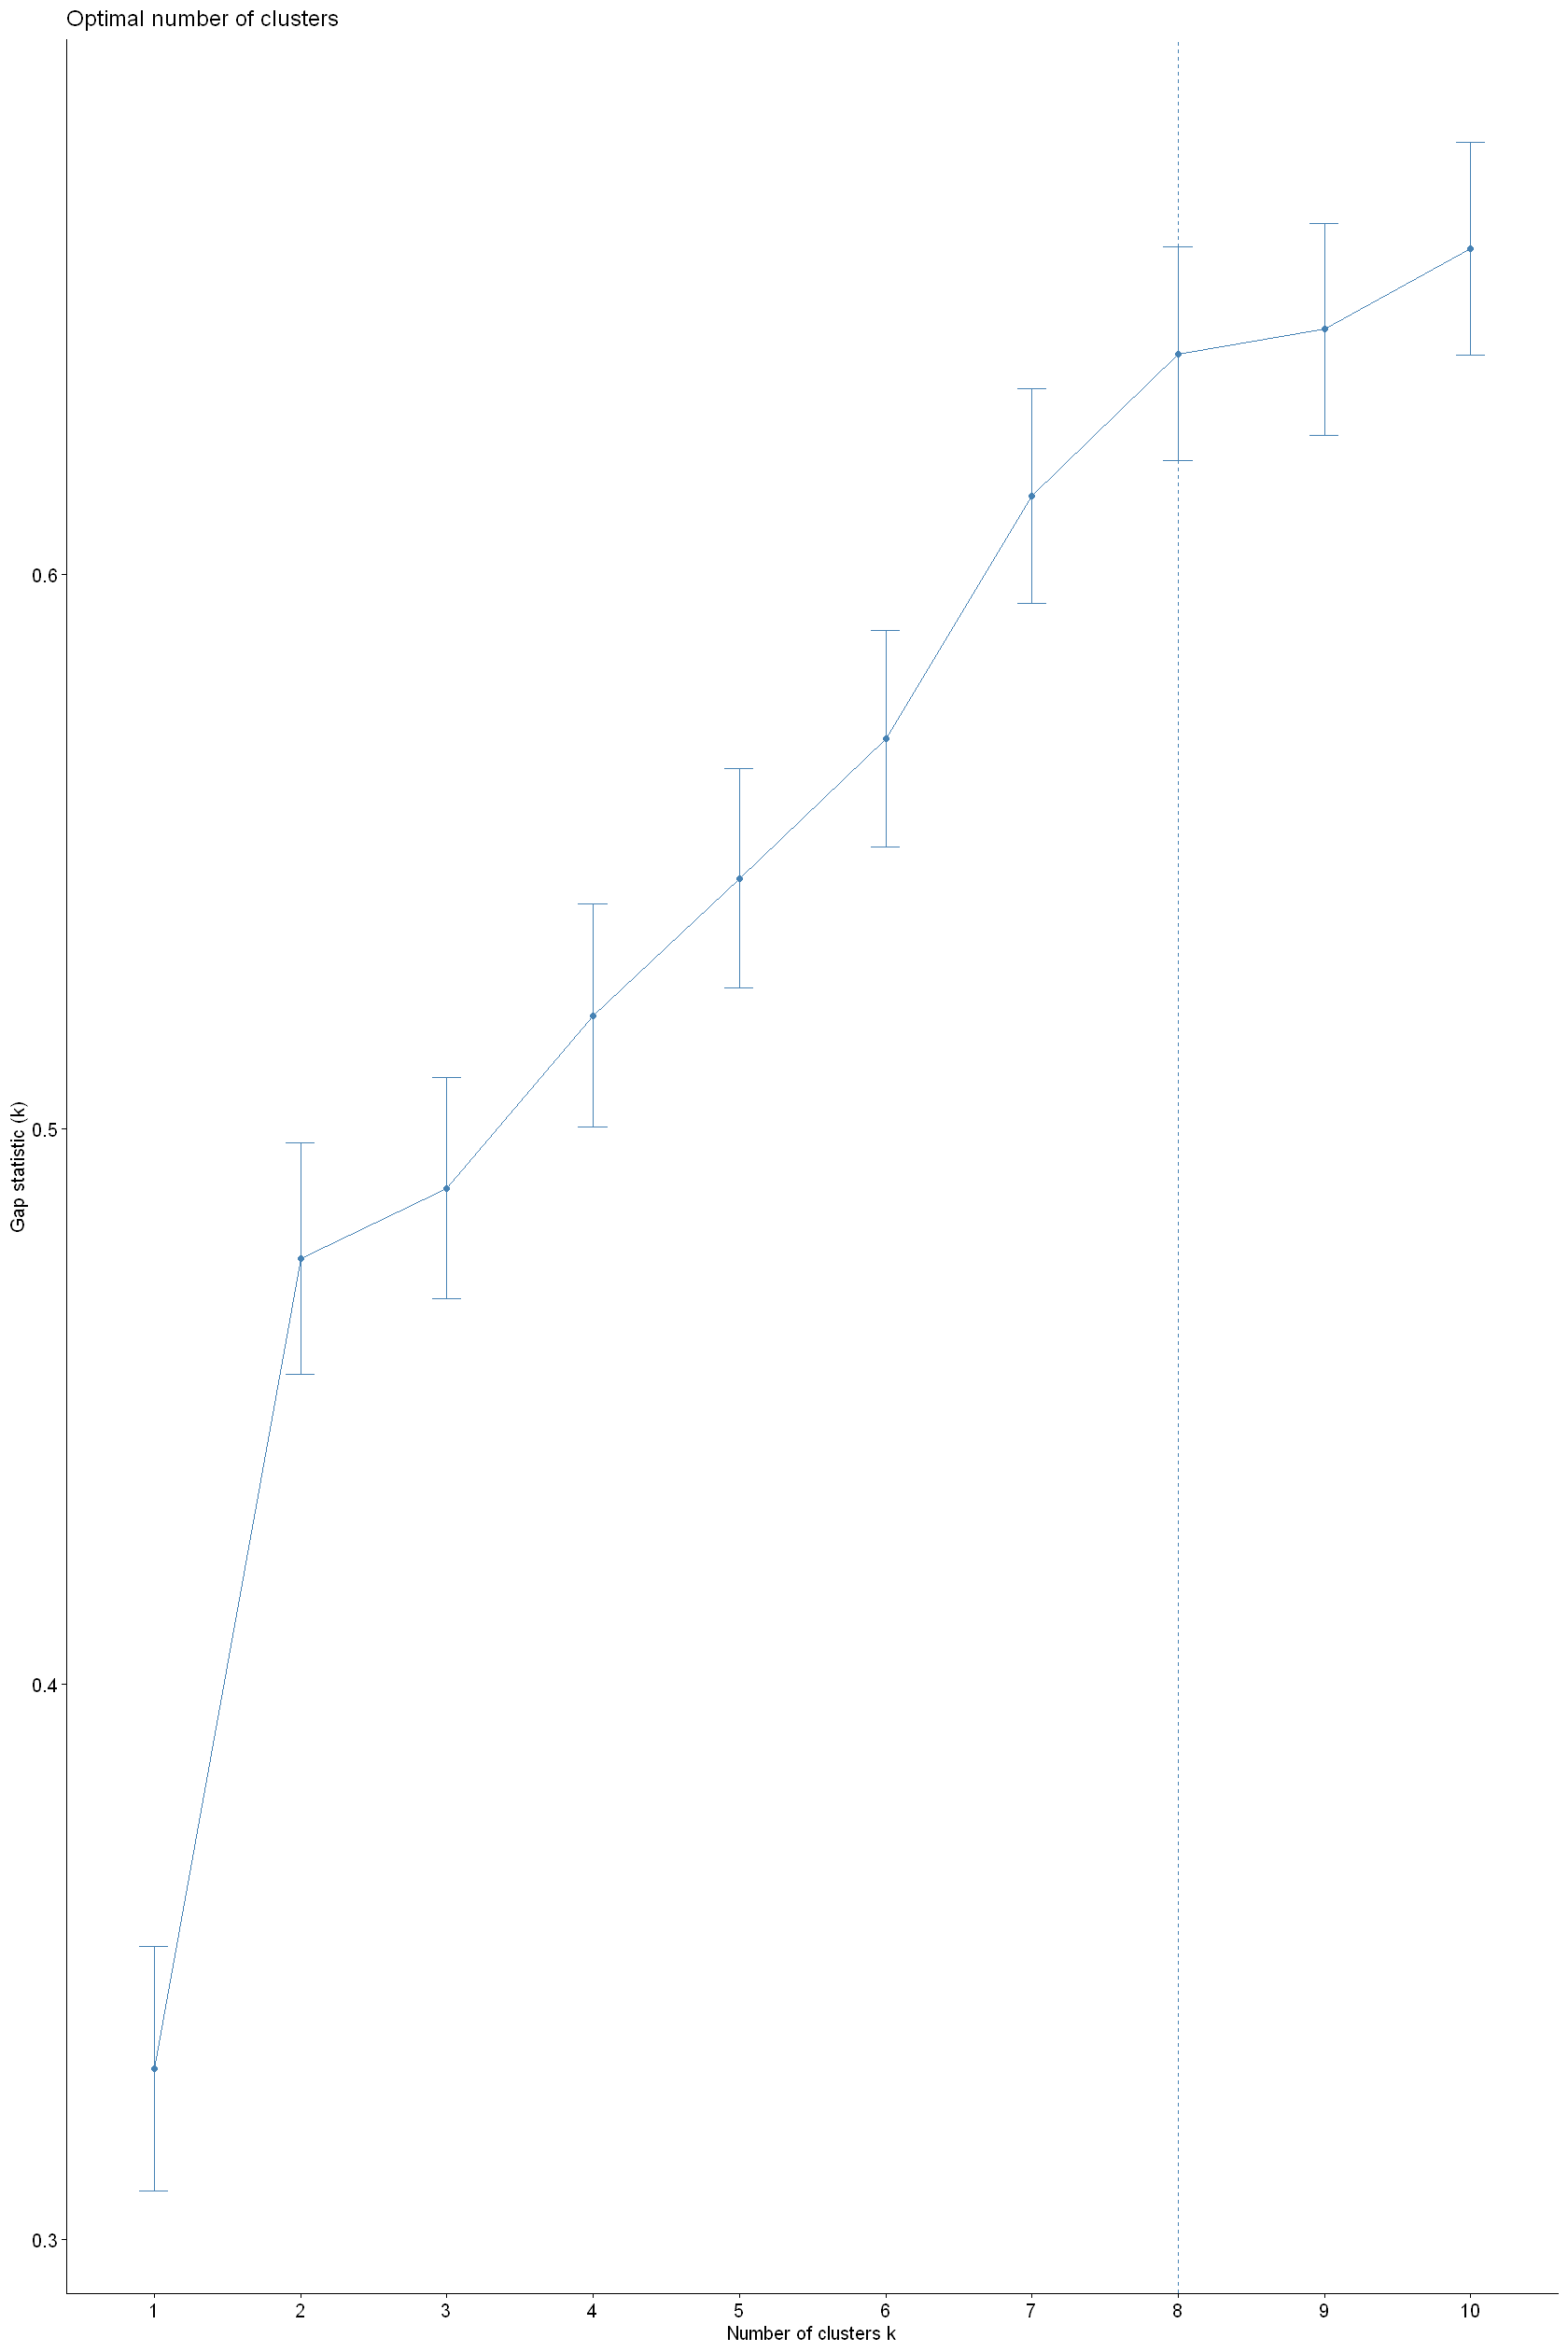

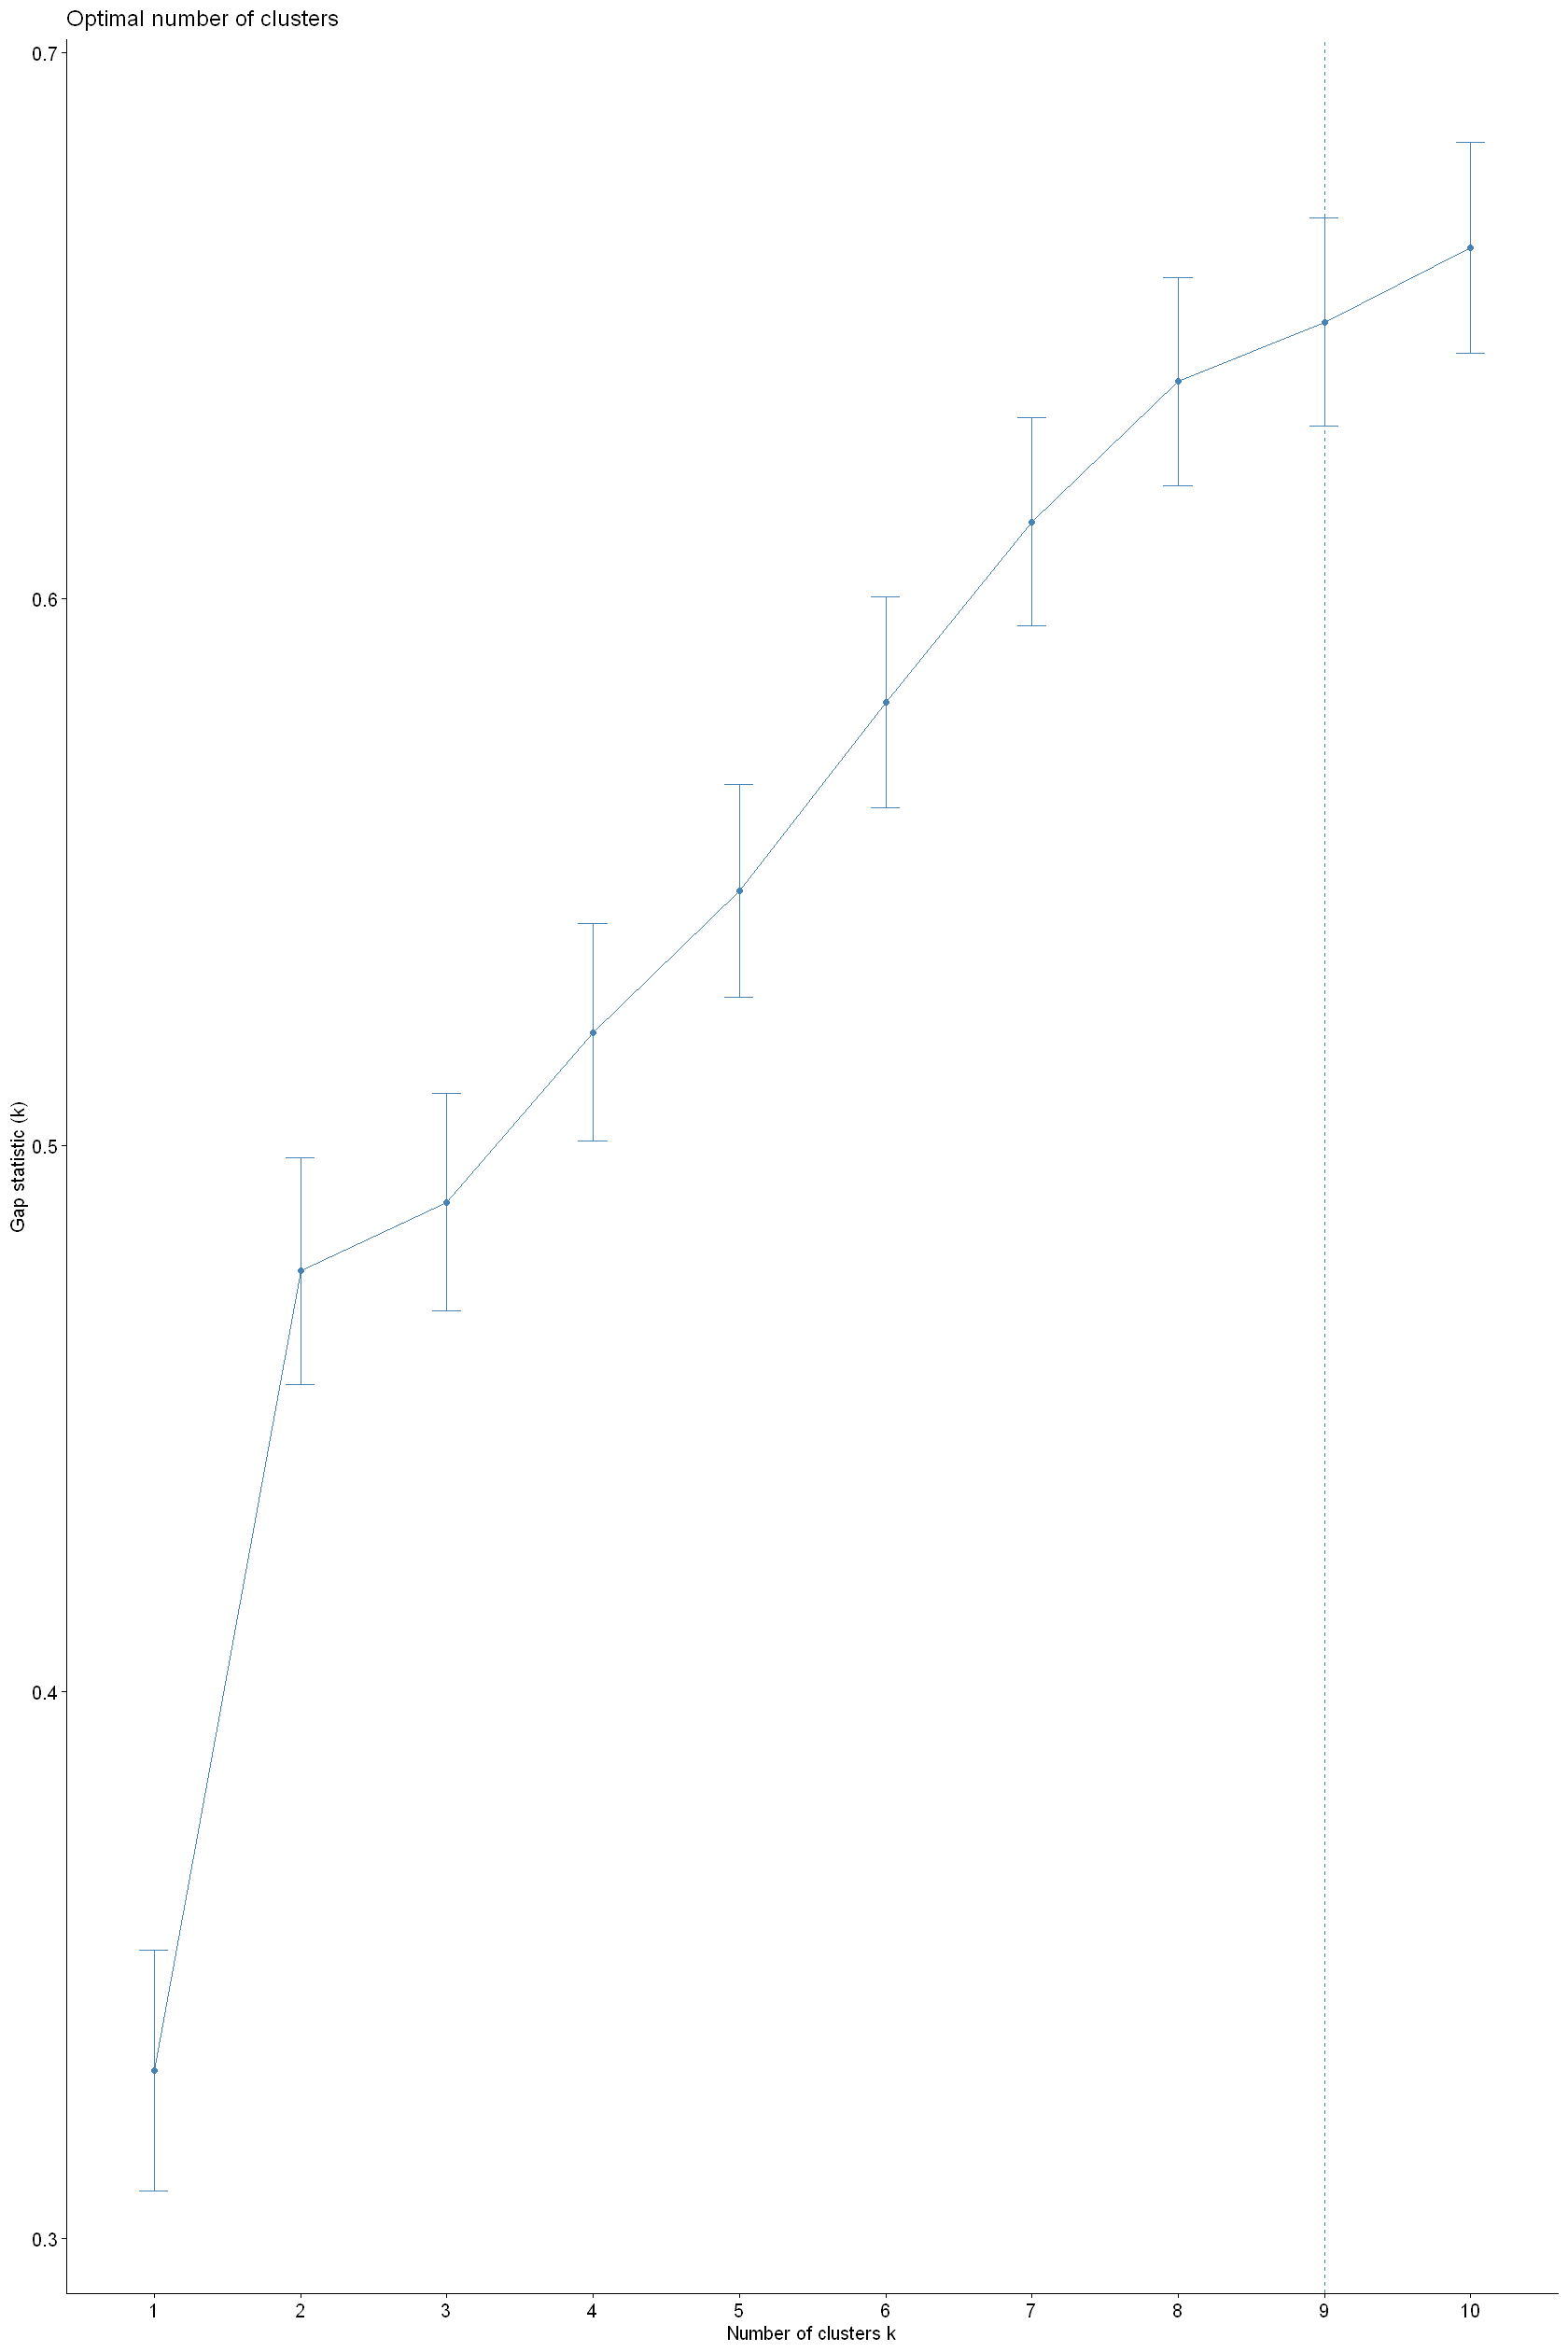

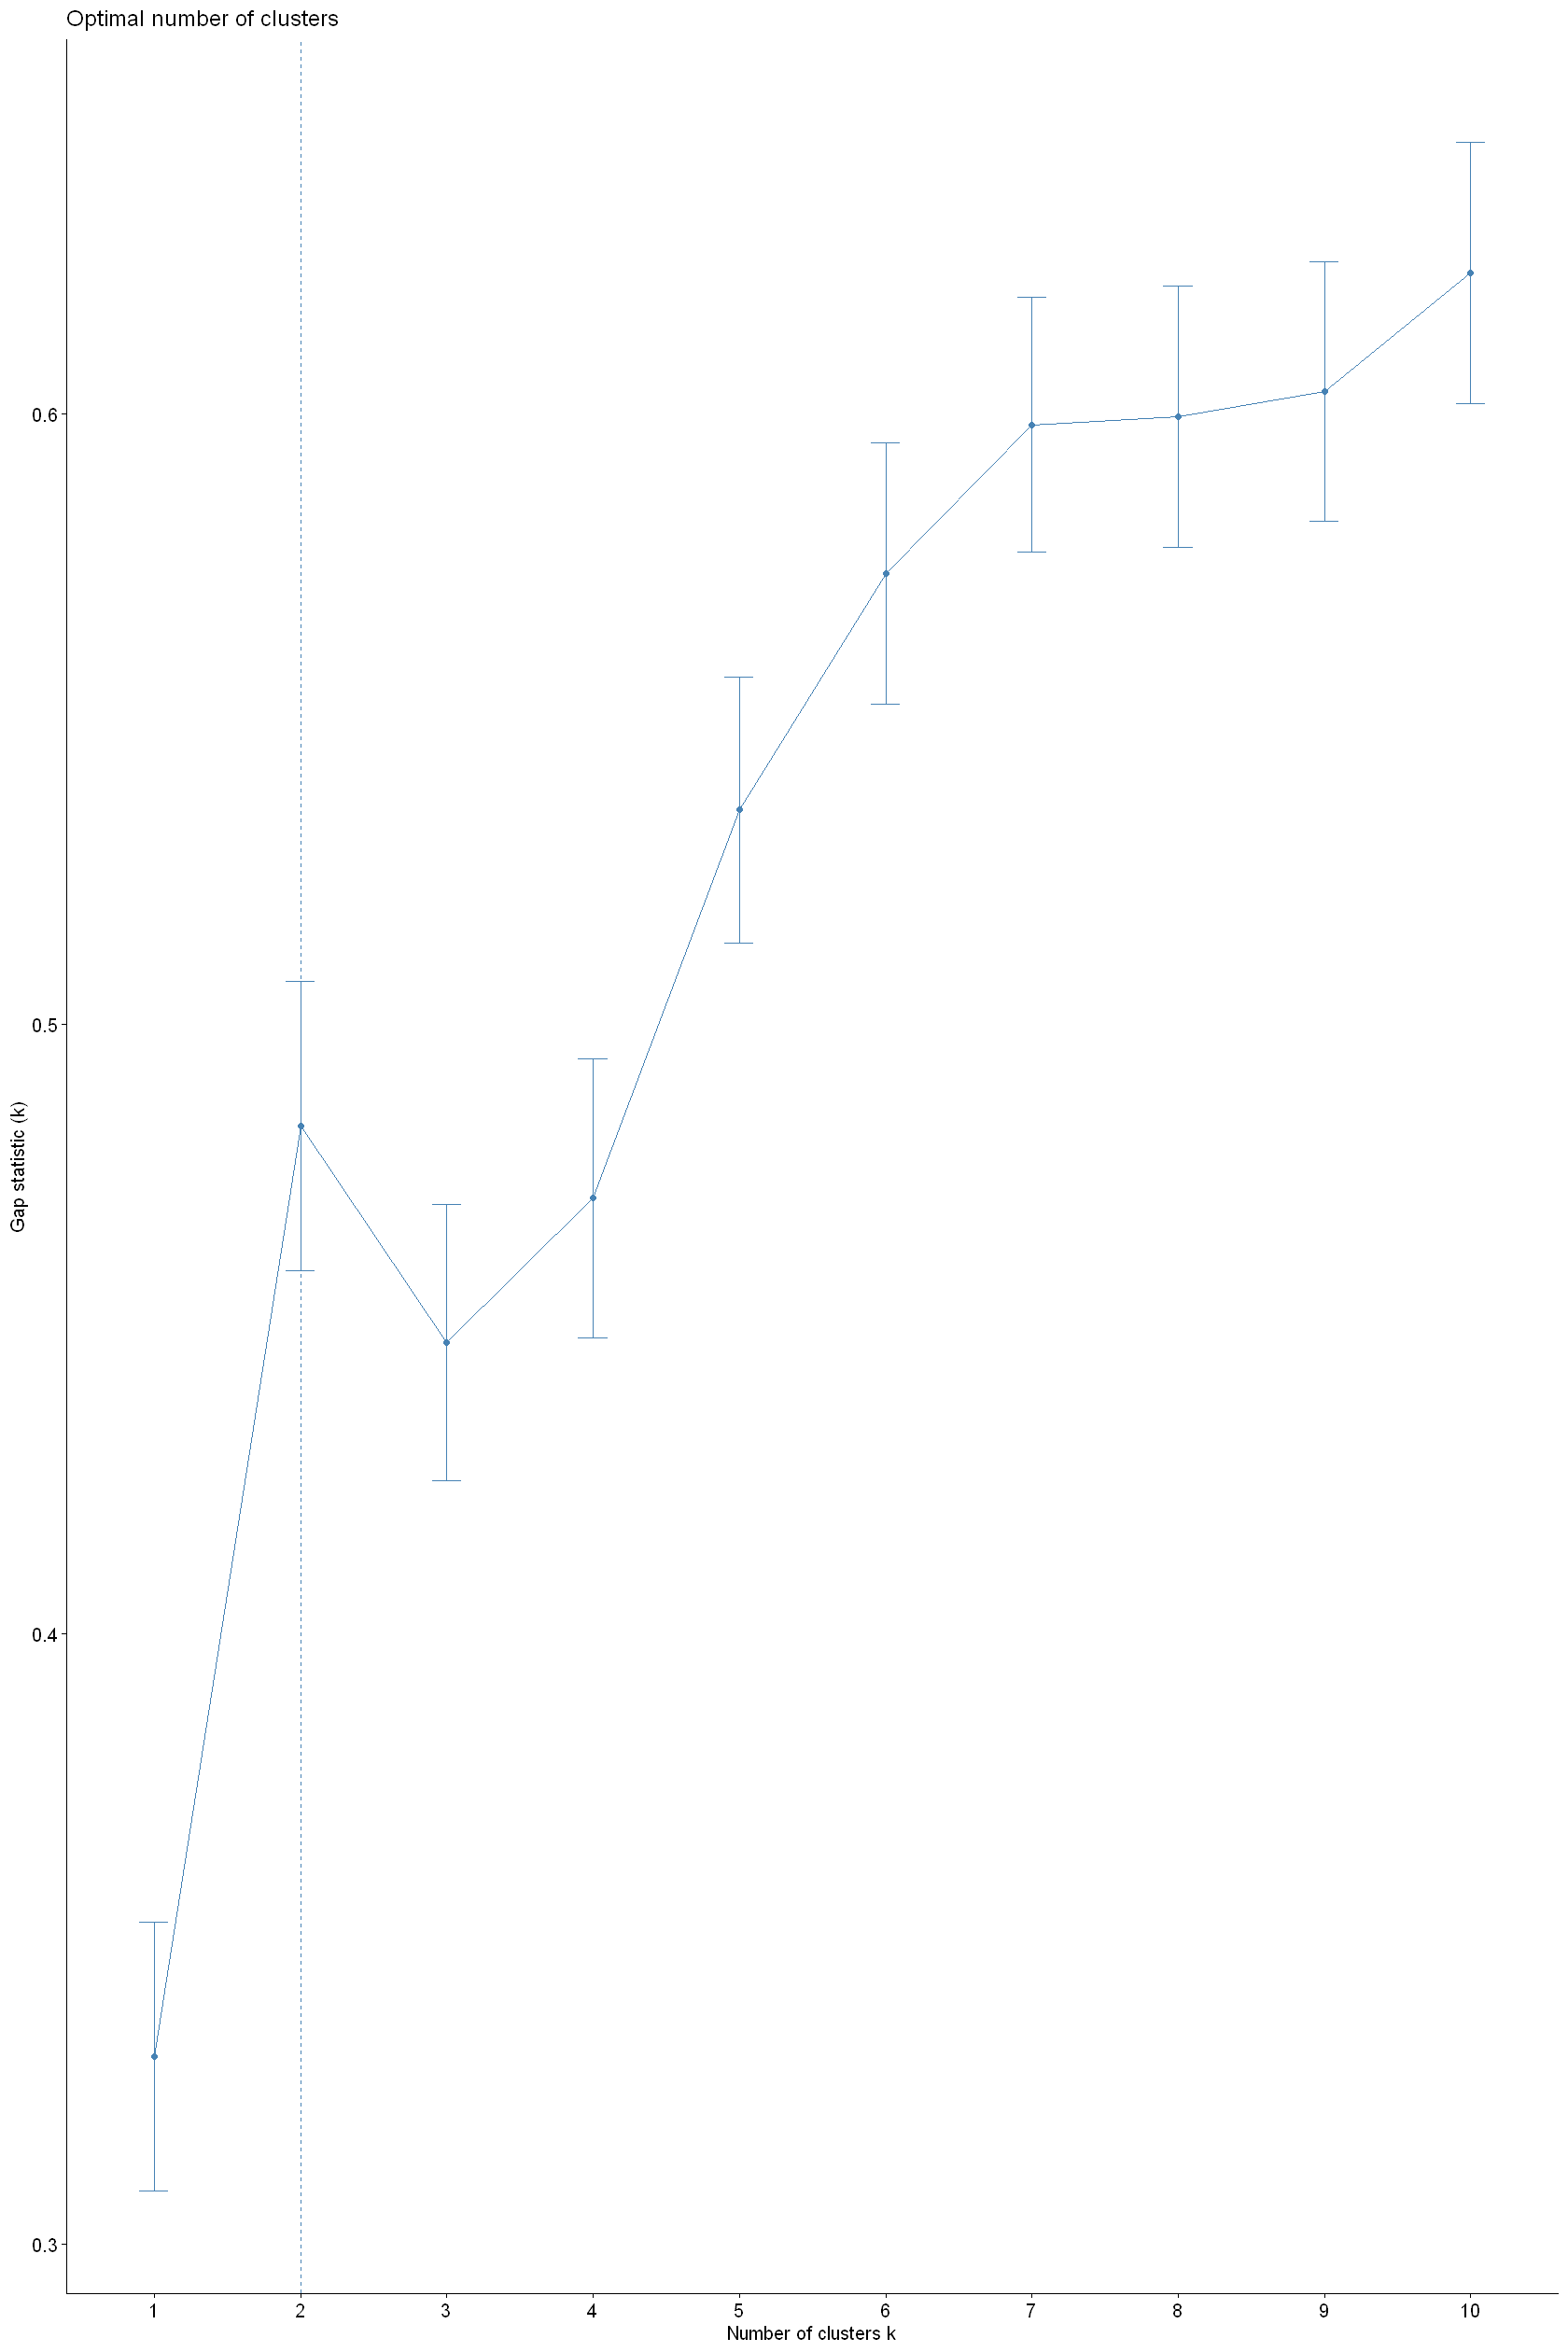

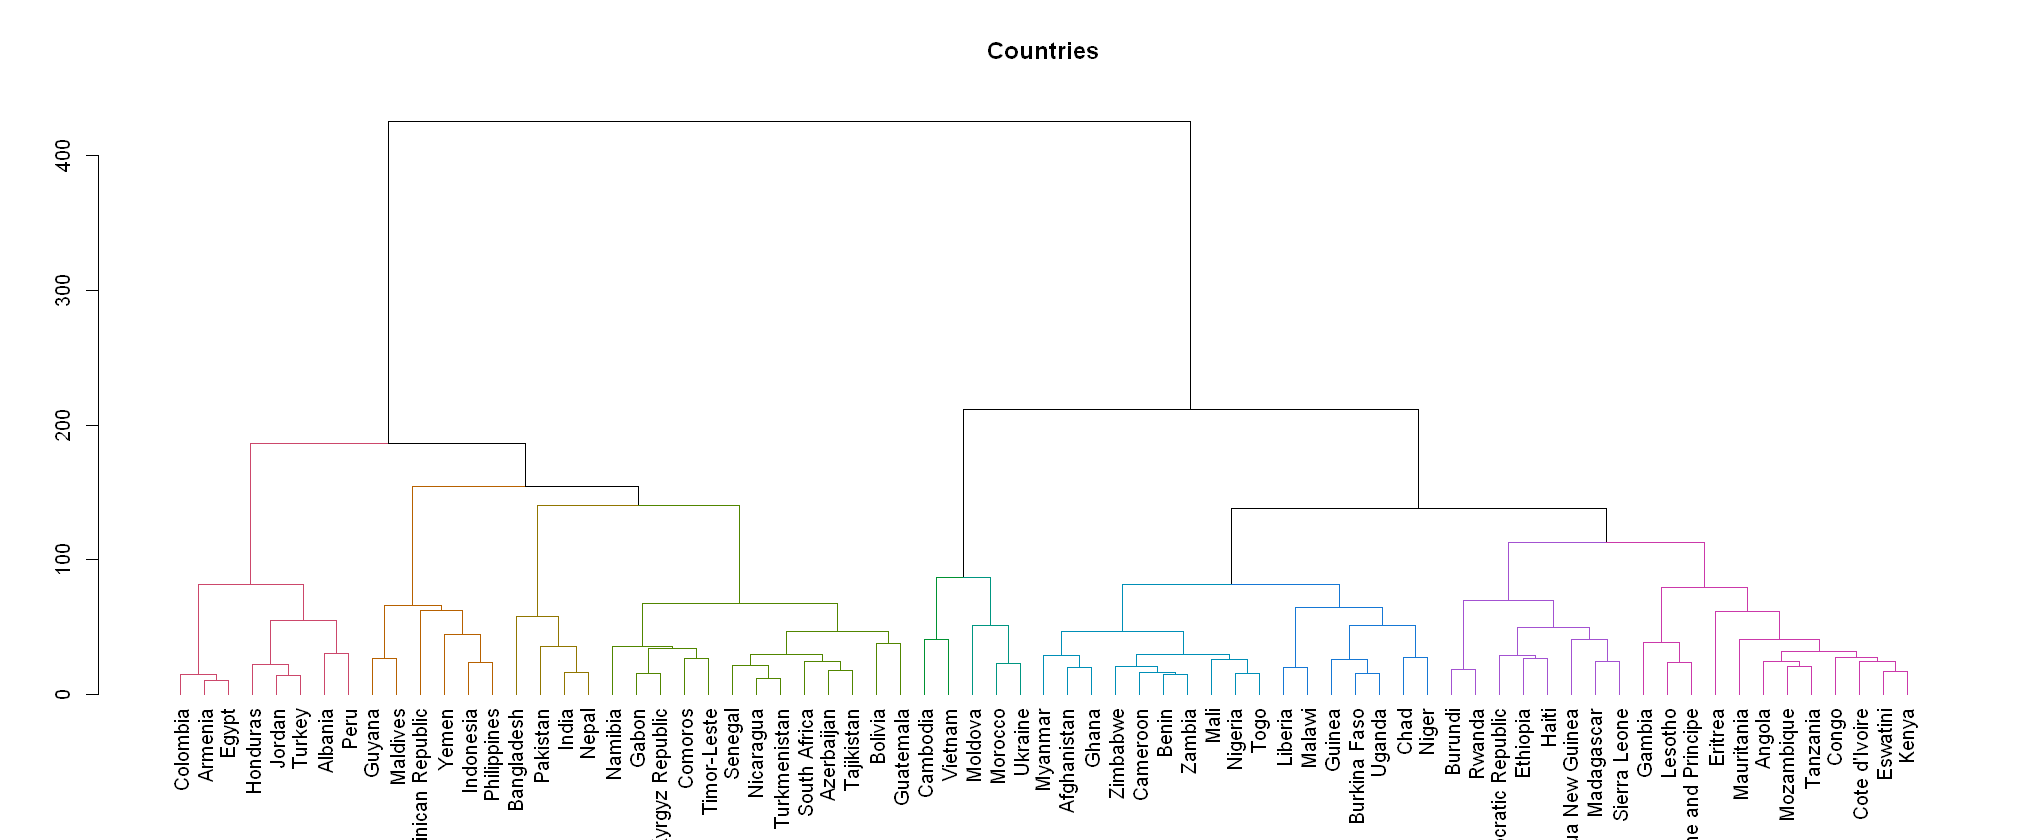

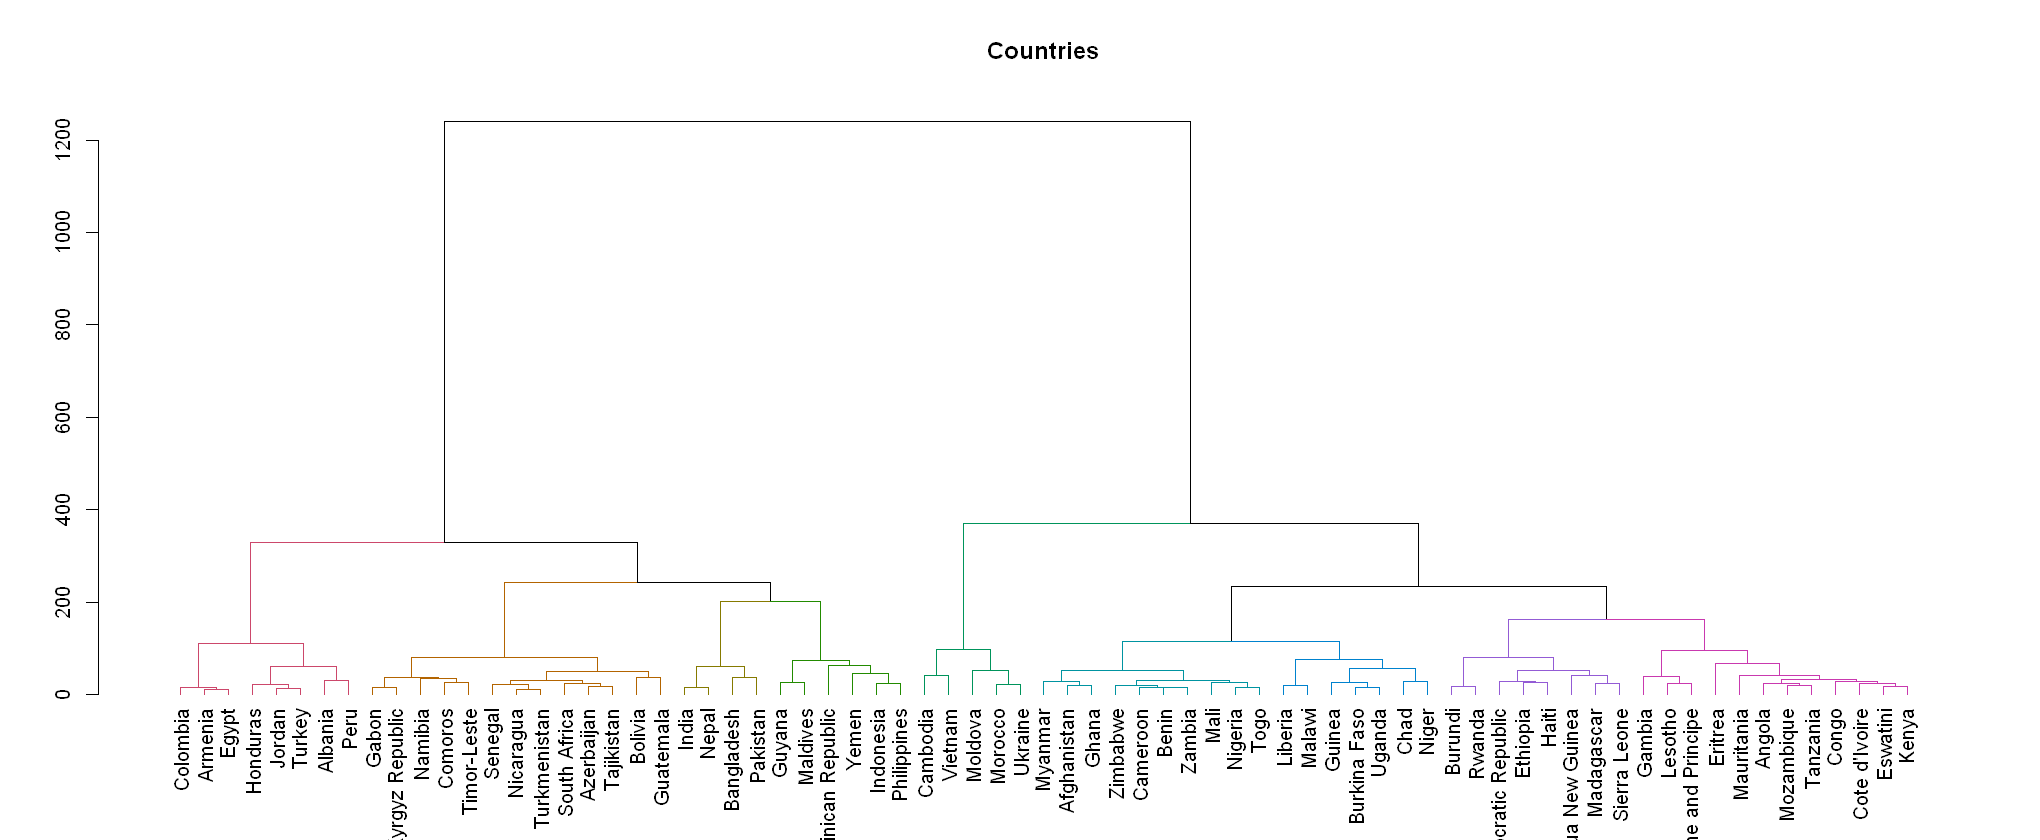

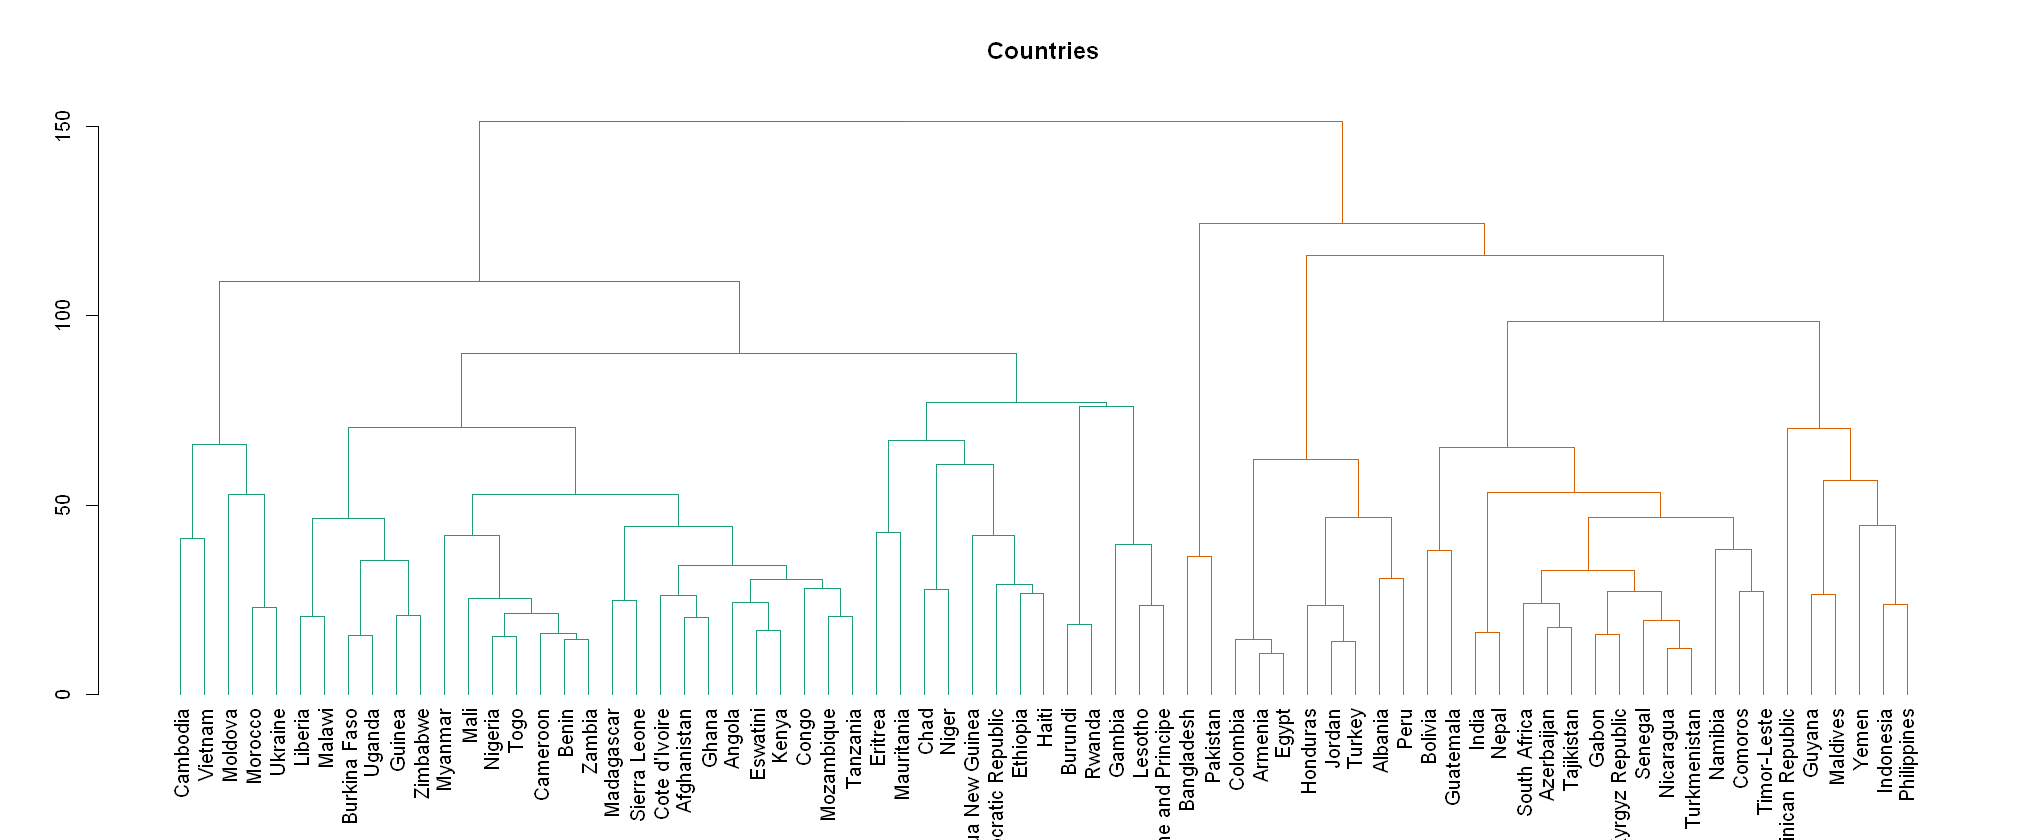

In [171]:
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D2" ,
                    K.max = 10, B = 1000,  method = c('Tibs2001SEmax'))
fviz_gap_stat(gap_stat)


set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D" ,
                    K.max = 10, B = 1000, method ='Tibs2001SEmax', SE.factor = 1)

fviz_gap_stat(gap_stat)
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="complete" ,
                    K.max = 10, B = 1000)
fviz_gap_stat(gap_stat)


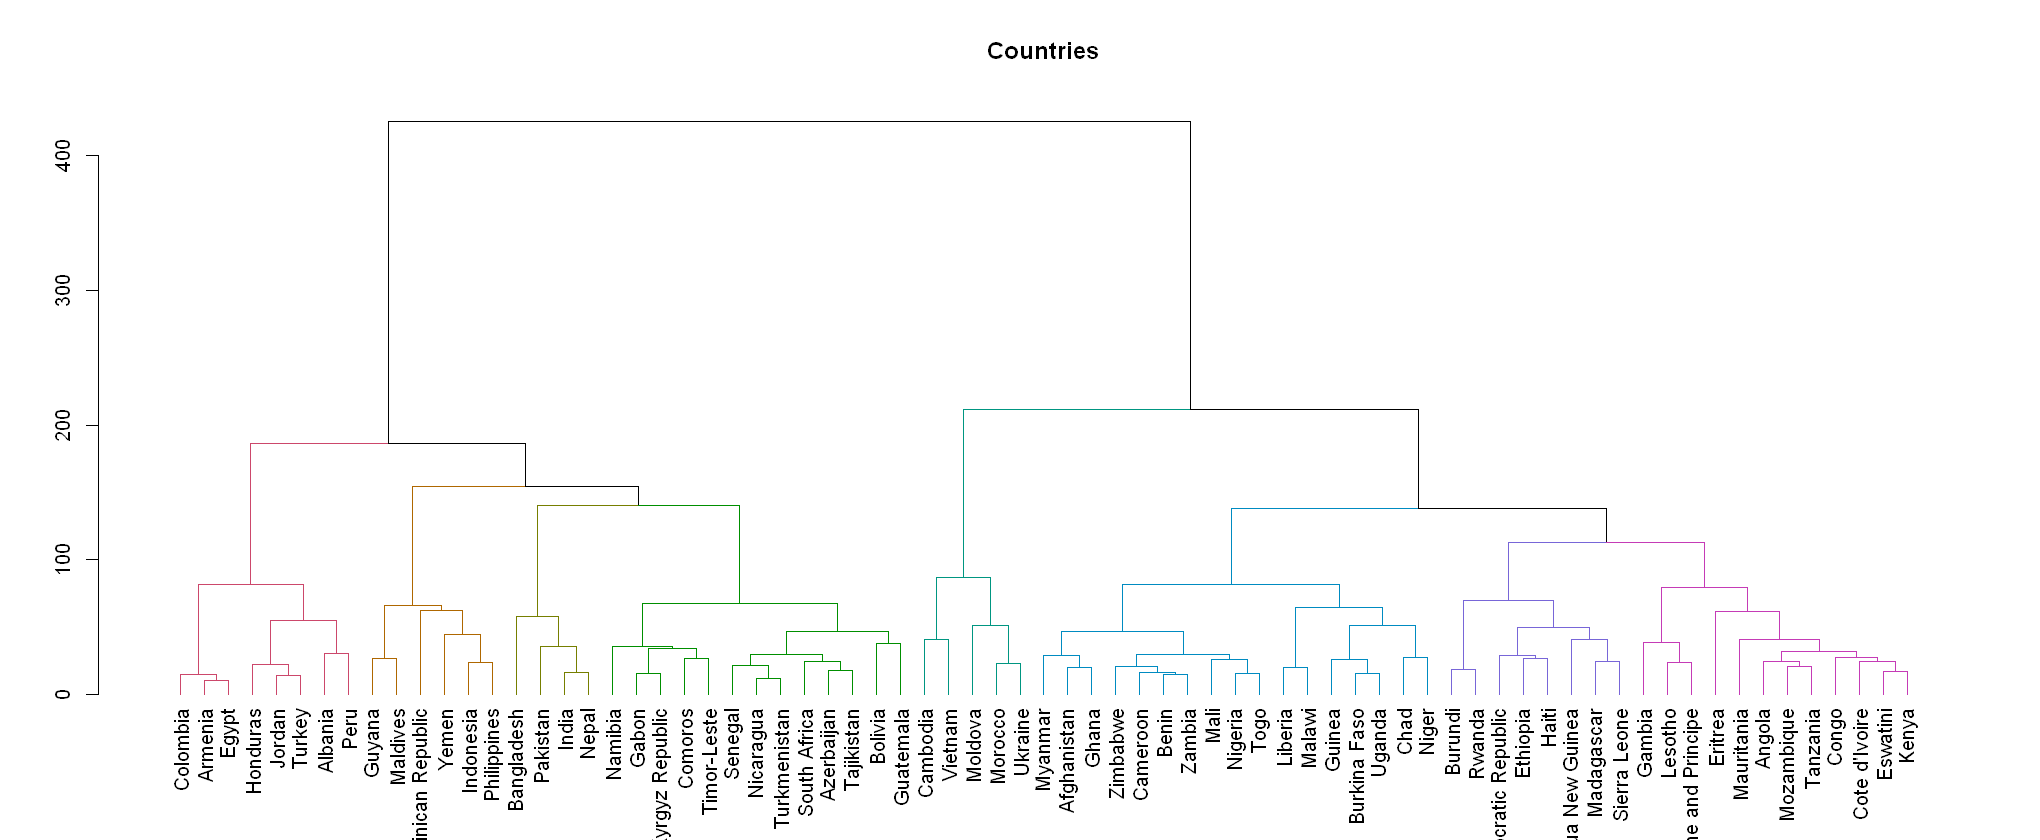

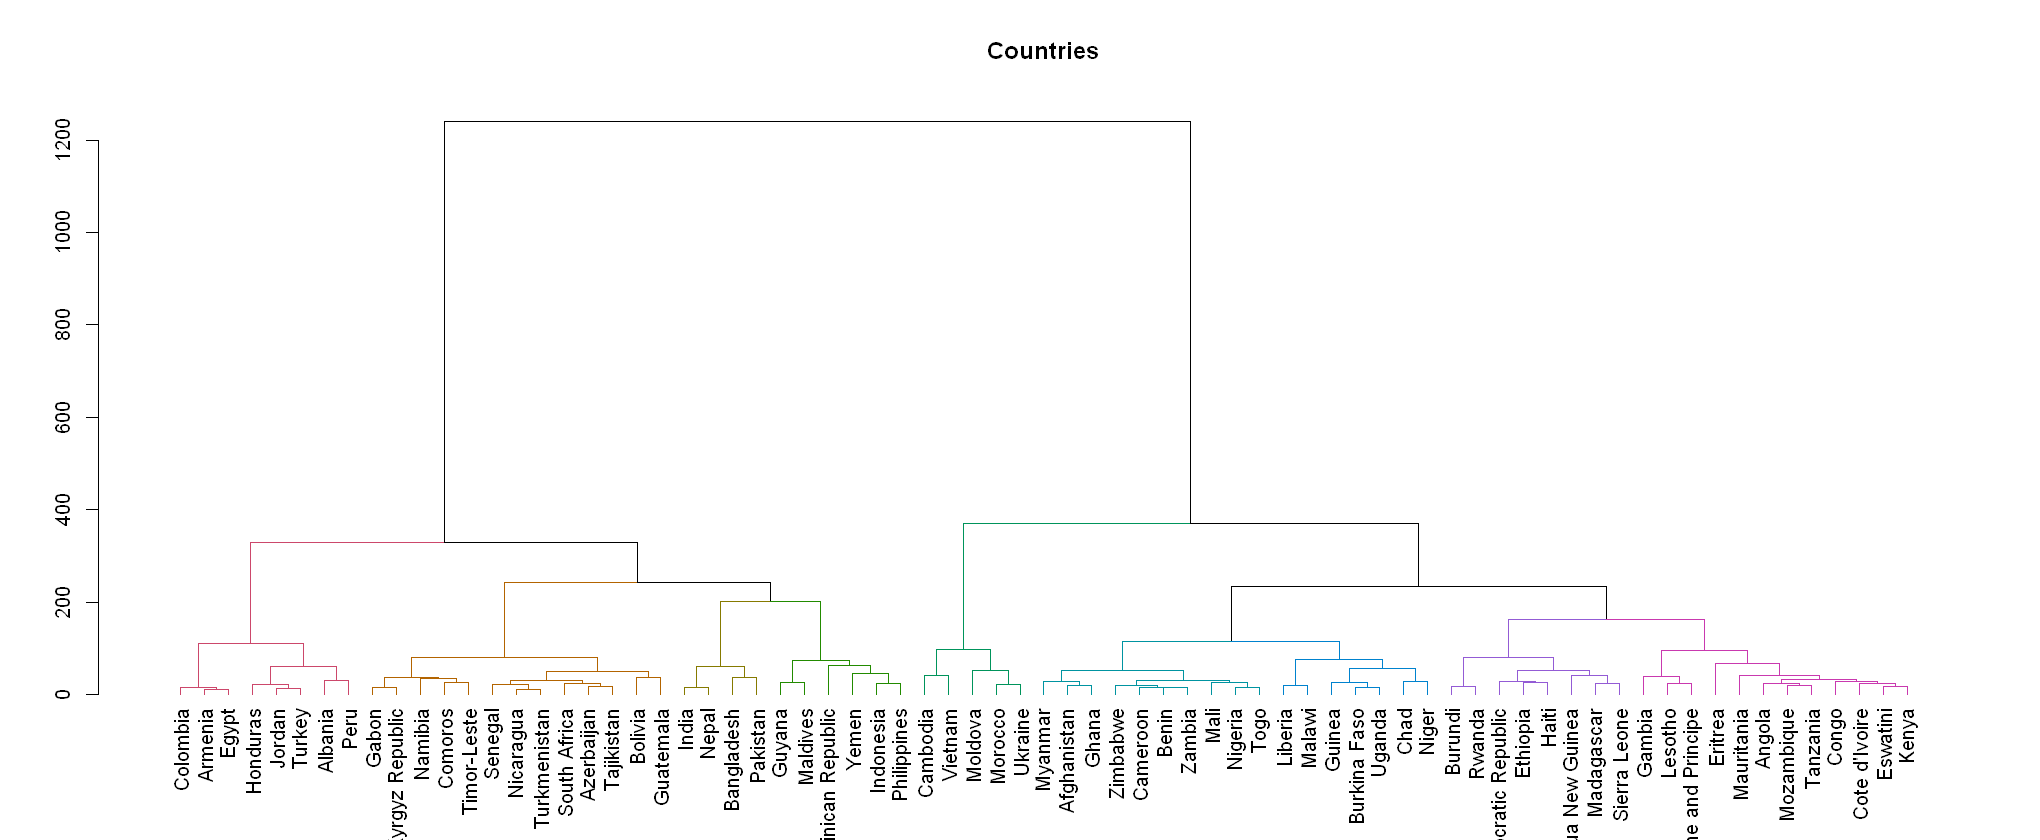

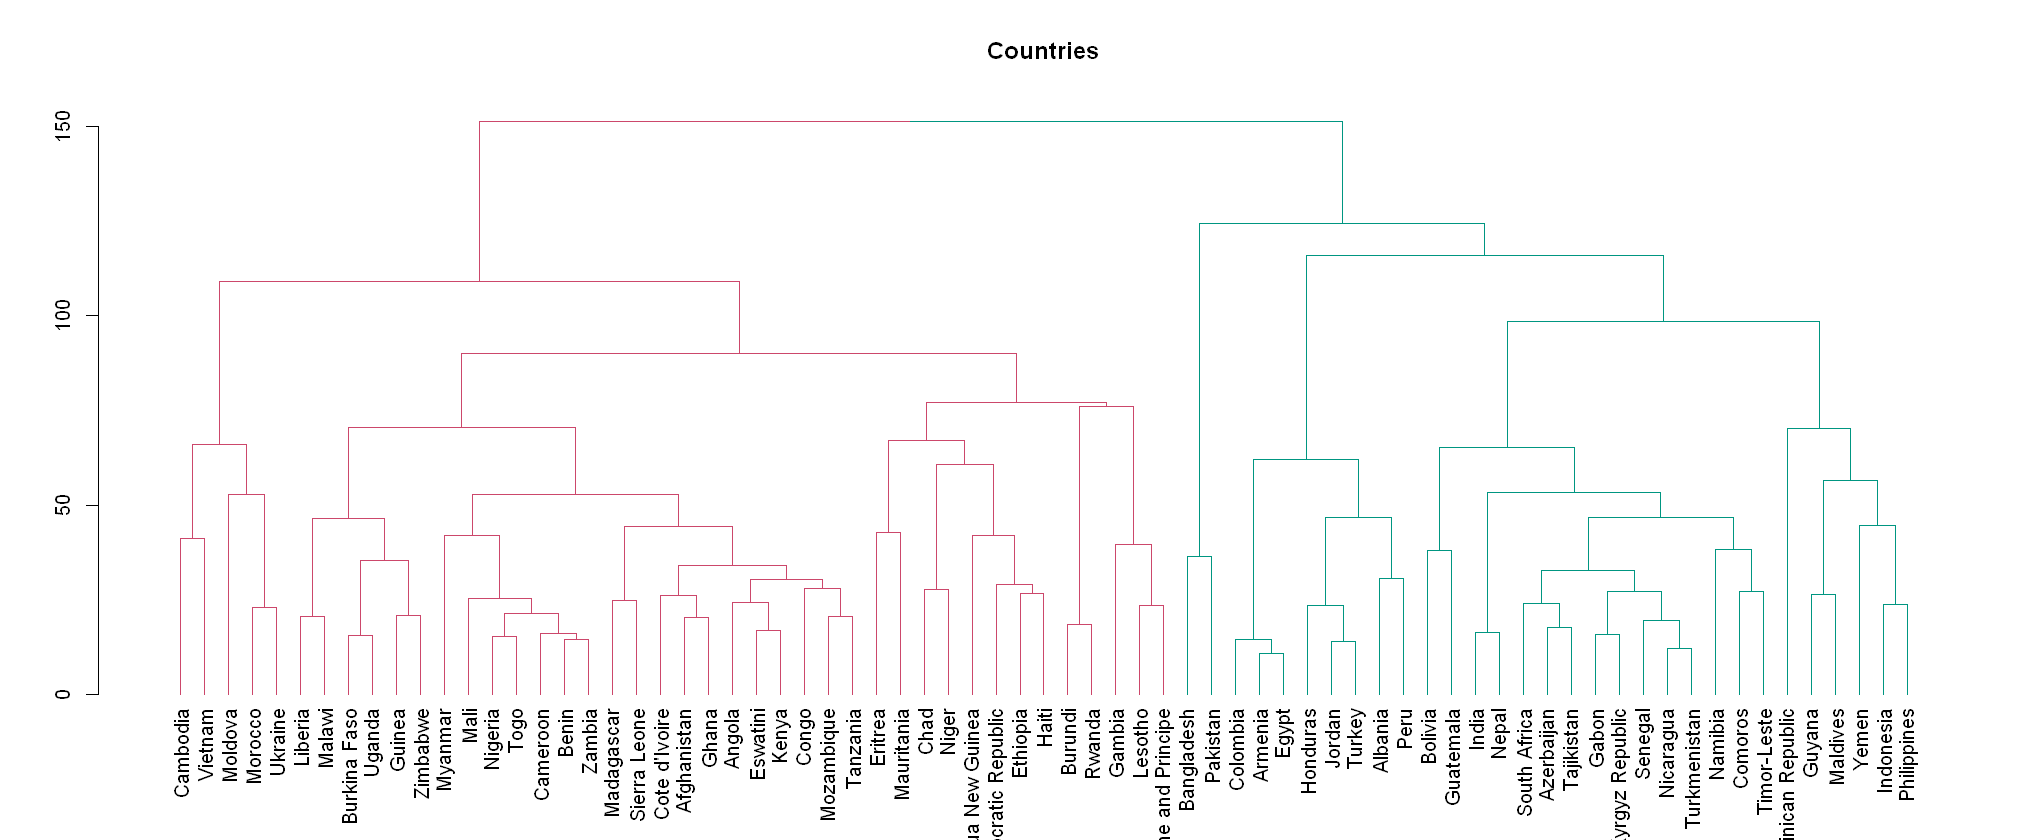

In [180]:
### Fancy Clustering Graph for WARD D2 Gap ### 
dend <- as.dendrogram(hc.ward2)
dend <- color_branches(dend, k=8, palette='Dark2')

labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Ward Gap ###
dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=9,palette='Dark2')

labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Complete Gap ###
dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=2,palette='Dark2')

labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )